# tips 데이터 데이터 시각화

In [2]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [3]:
tips = sns.load_dataset("tips")

In [4]:
# Description
print(tips.__doc__)


    Two-dimensional, size-mutable, potentially heterogeneous tabular data.

    Data structure also contains labeled axes (rows and columns).
    Arithmetic operations align on both row and column labels. Can be
    thought of as a dict-like container for Series objects. The primary
    pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, dataclass or list-like objects. If
        data is a dict, column order follows insertion-order. If a dict contains Series
        which have an index defined, it is aligned by its index. This alignment also
        occurs if data is a Series or a DataFrame itself. Alignment is done on
        Series/DataFrame inputs.

        If data is a list of dicts, column order follows insertion-order.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing informat

In [5]:
tips

total_bill  tip     sex smoker   day    time  size
0         16.99 1.01  Female     No   Sun  Dinner     2
1         10.34 1.66    Male     No   Sun  Dinner     3
2         21.01 3.50    Male     No   Sun  Dinner     3
..          ...  ...     ...    ...   ...     ...   ...
241       22.67 2.00    Male    Yes   Sat  Dinner     2
242       17.82 1.75    Male     No   Sat  Dinner     2
243       18.78 3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [55]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


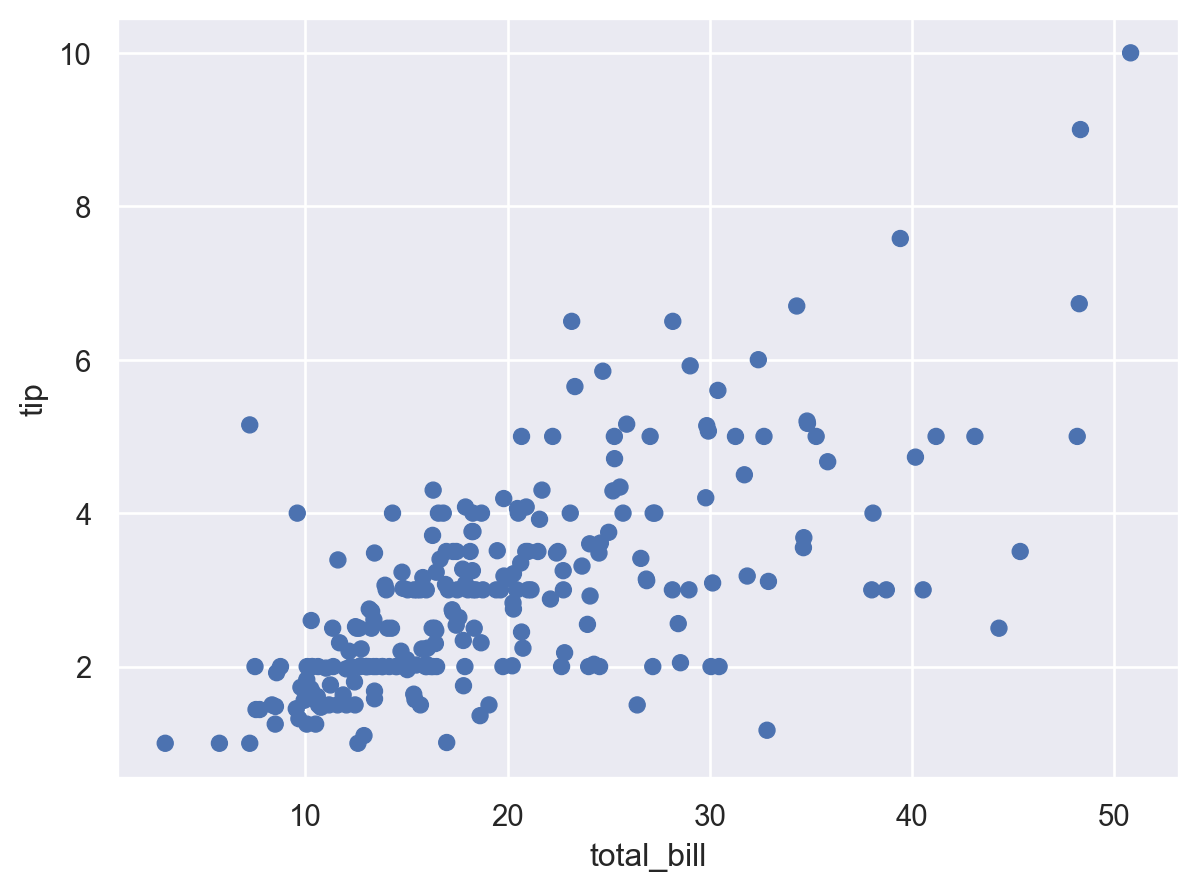

In [8]:
# total_bill과 tip은 어떤 관계에 있는가?

# Scatter plot: 산포도
(
    so.Plot(tips, x="total_bill", y="tip")   # empty plot을 생성하고, x, y축에 mapping할 tip 데이터의 변수를 지정
    .add(so.Dot())  # layer를 추가하여, points들을 Dot이라는 mark object를 써서 표현

)

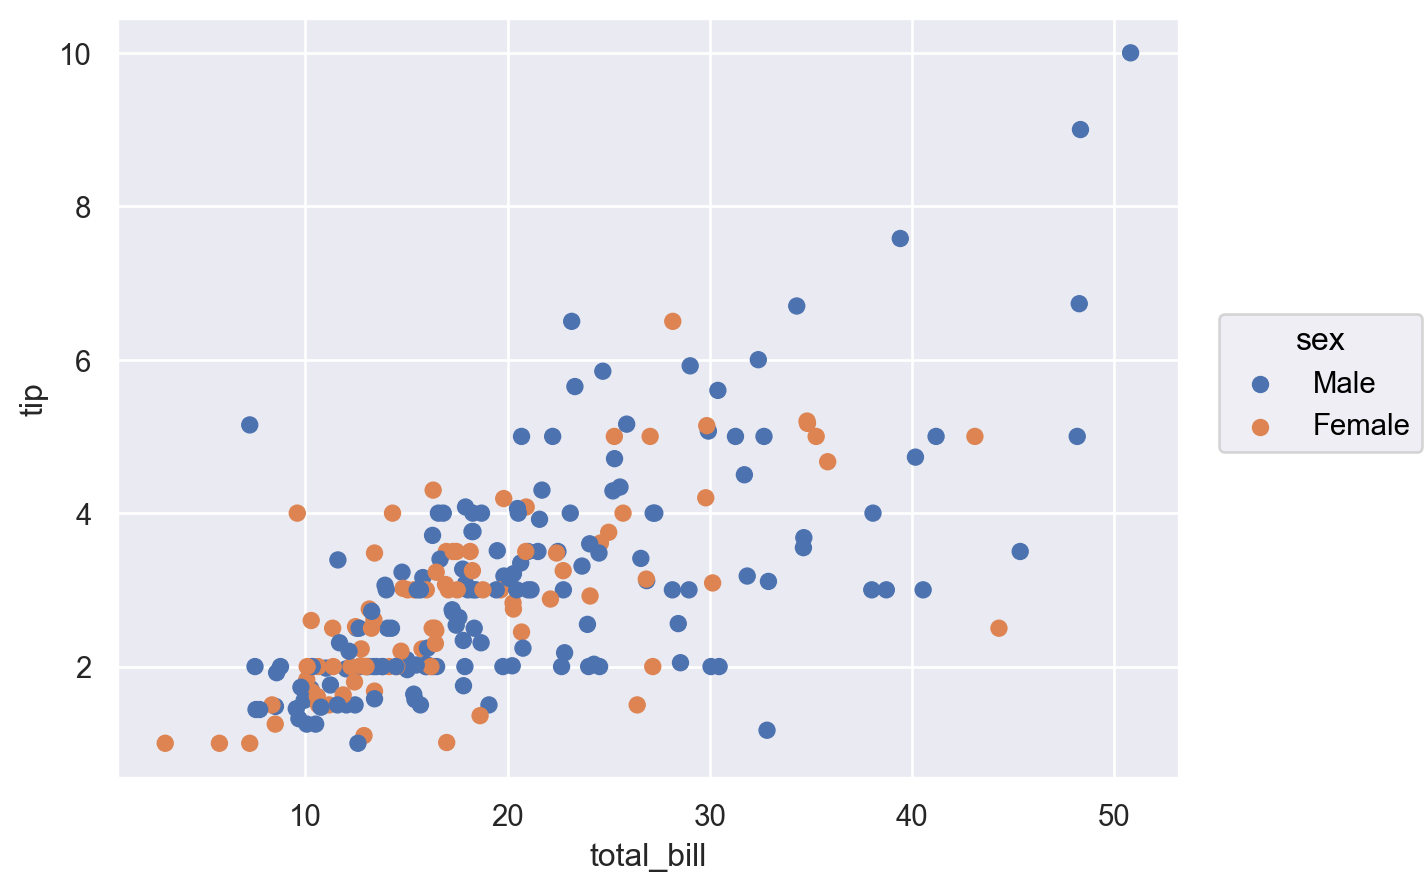

In [9]:
# 색(Color) 속성 mapping
(
    so.Plot(tips, x="total_bill", y="tip", color="sex")
    .add(so.Dot())
)

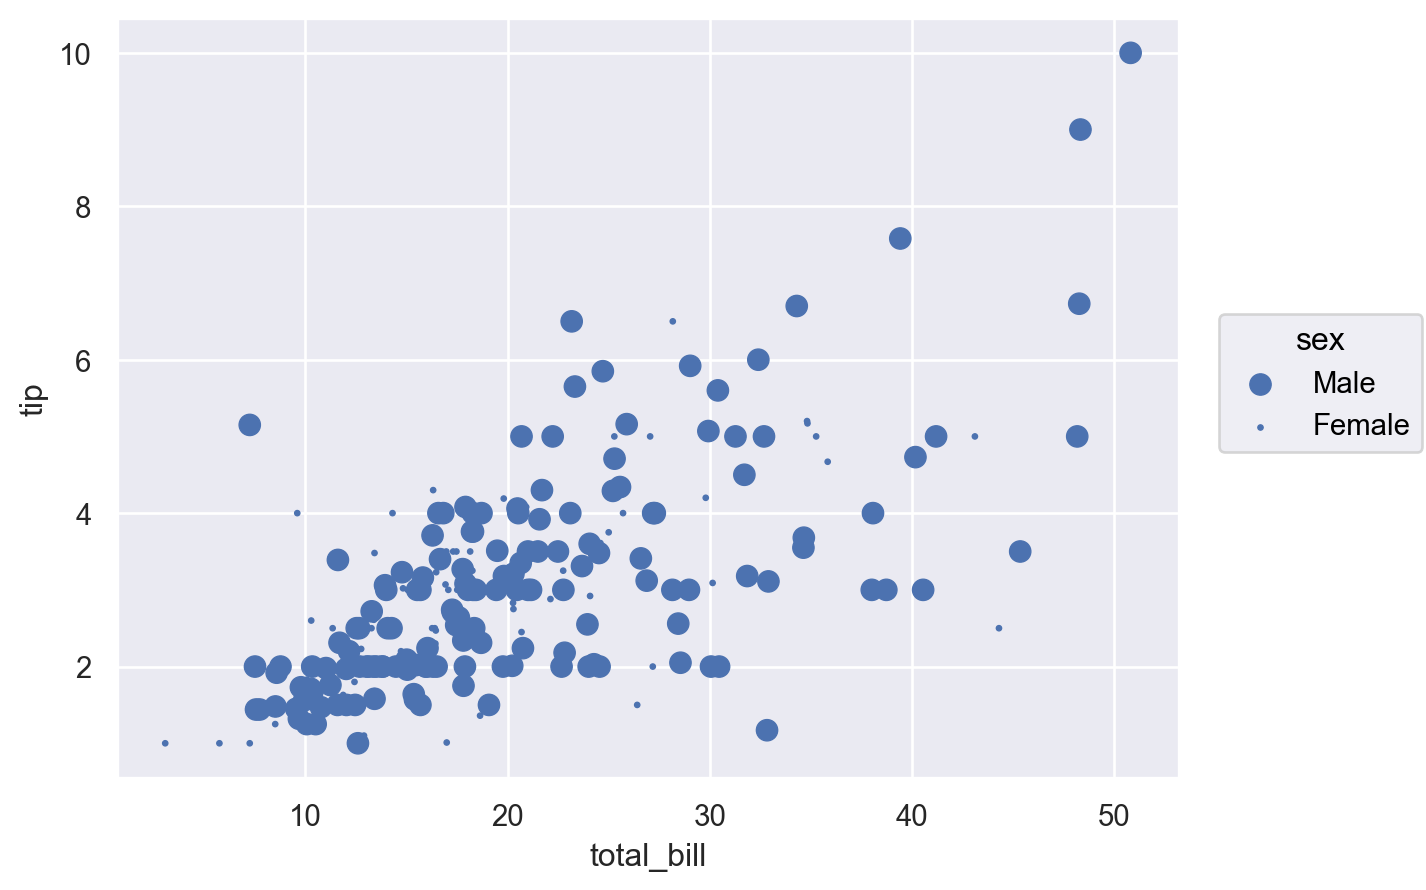

In [10]:
# 크기(Pointsize) 속성 mapping
(
    so.Plot(tips, x="total_bill", y="tip", pointsize="sex")
    .add(so.Dot())
)

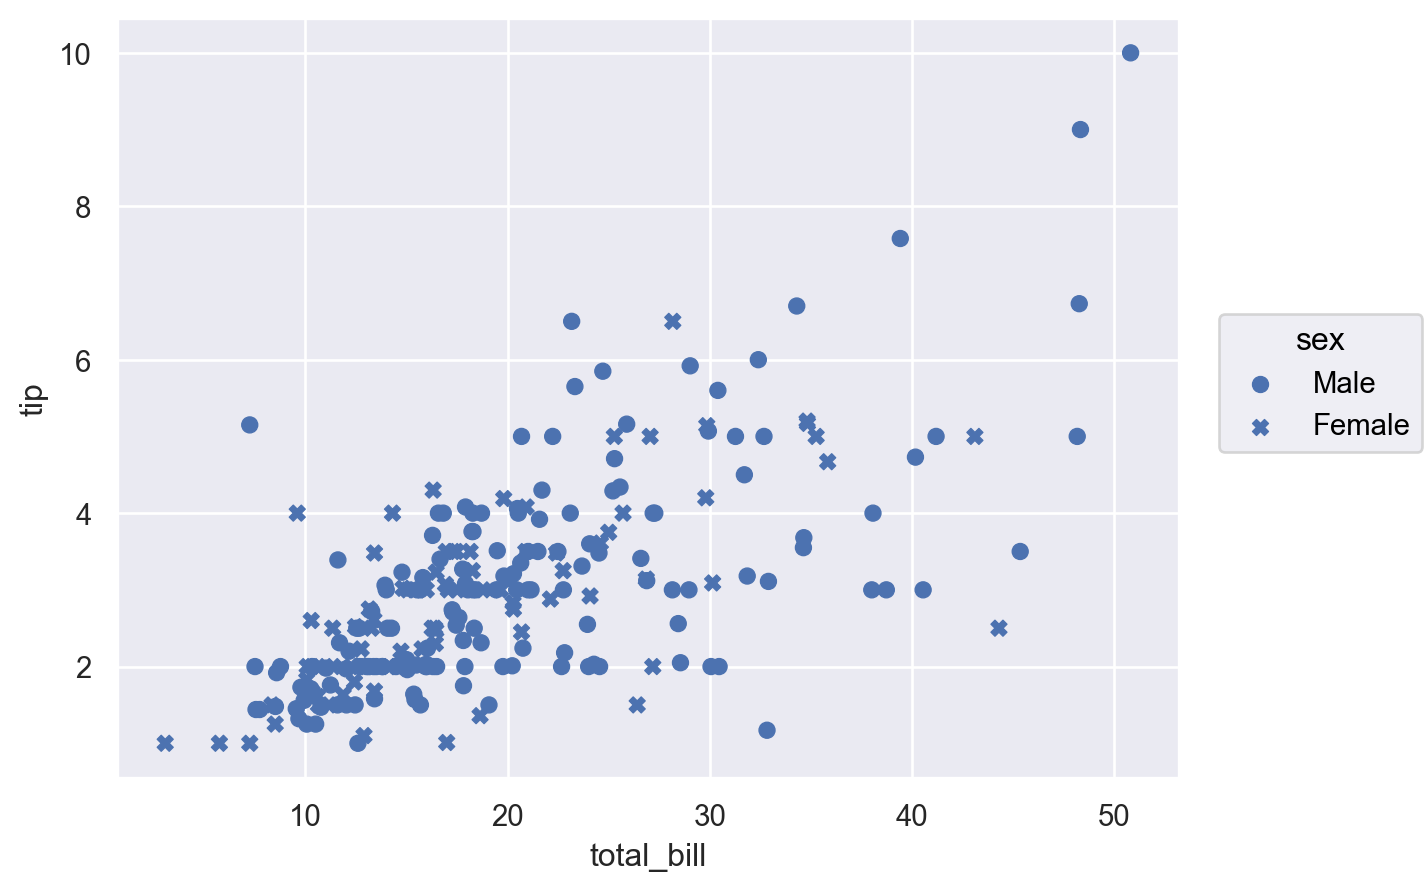

In [15]:
# 모양(marker) 속성 mapping
(
    so.Plot(tips, x="total_bill", y="tip", marker="sex")
    .add(so.Dot())
)

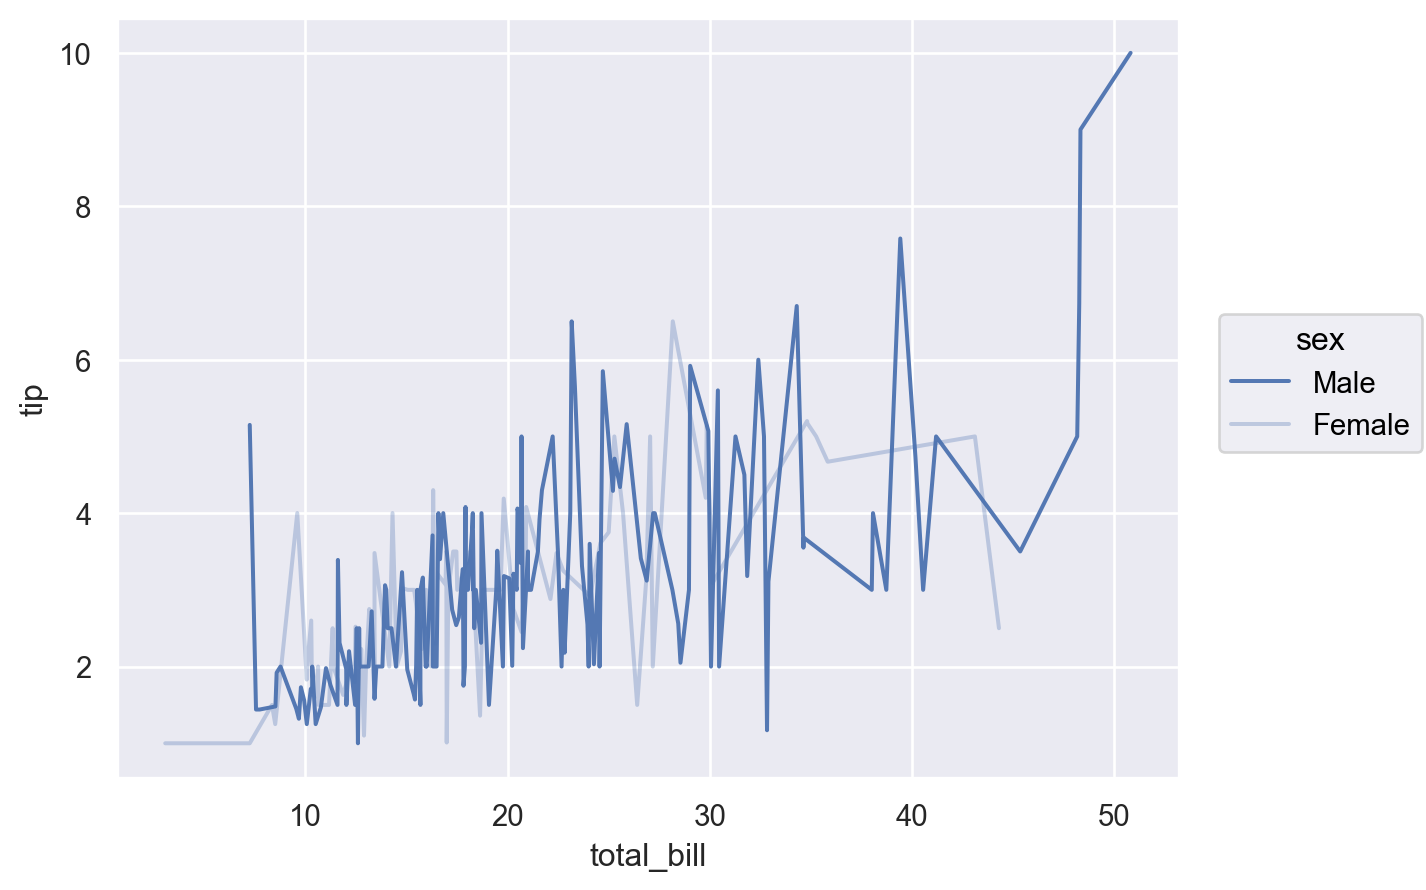

In [21]:
# 투명도(alpha) 속성 mapping
(
    so.Plot(tips, x="total_bill", y="tip", alpha="sex")
    .add(so.Line())
)

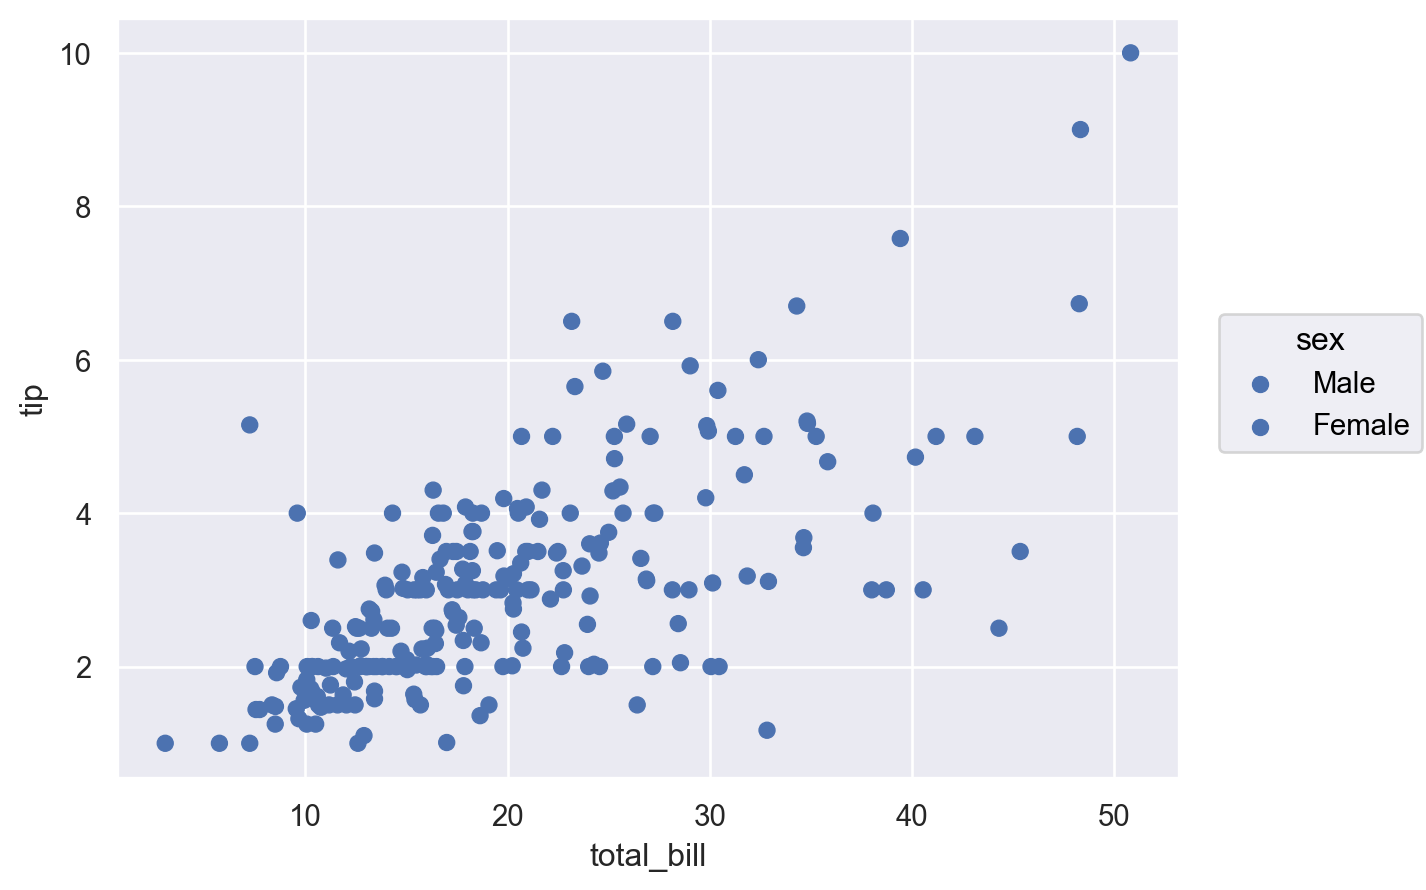

In [20]:
# 선 종류(linestyle) 속성 mapping
(
    so.Plot(tips, x="total_bill", y="tip", linestyle="sex")
    .add(so.Dot())
)

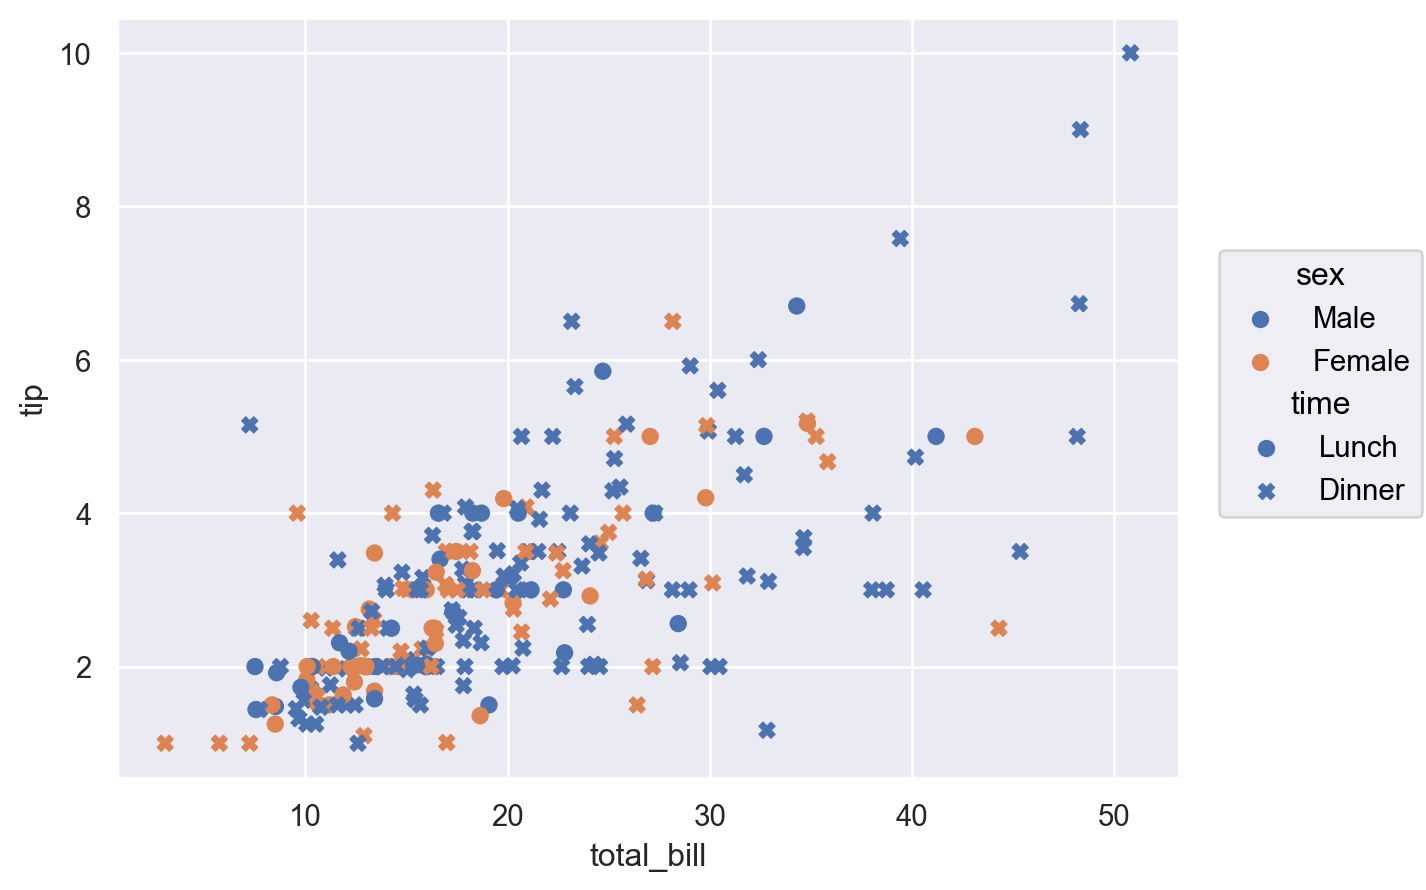

In [22]:
# 2가지 이상의 속성 mapping
# 색(Color), 모양(Marker)
(
    so.Plot(tips, x="total_bill", y="tip", color="sex", marker='time')
    .add(so.Dot())
)

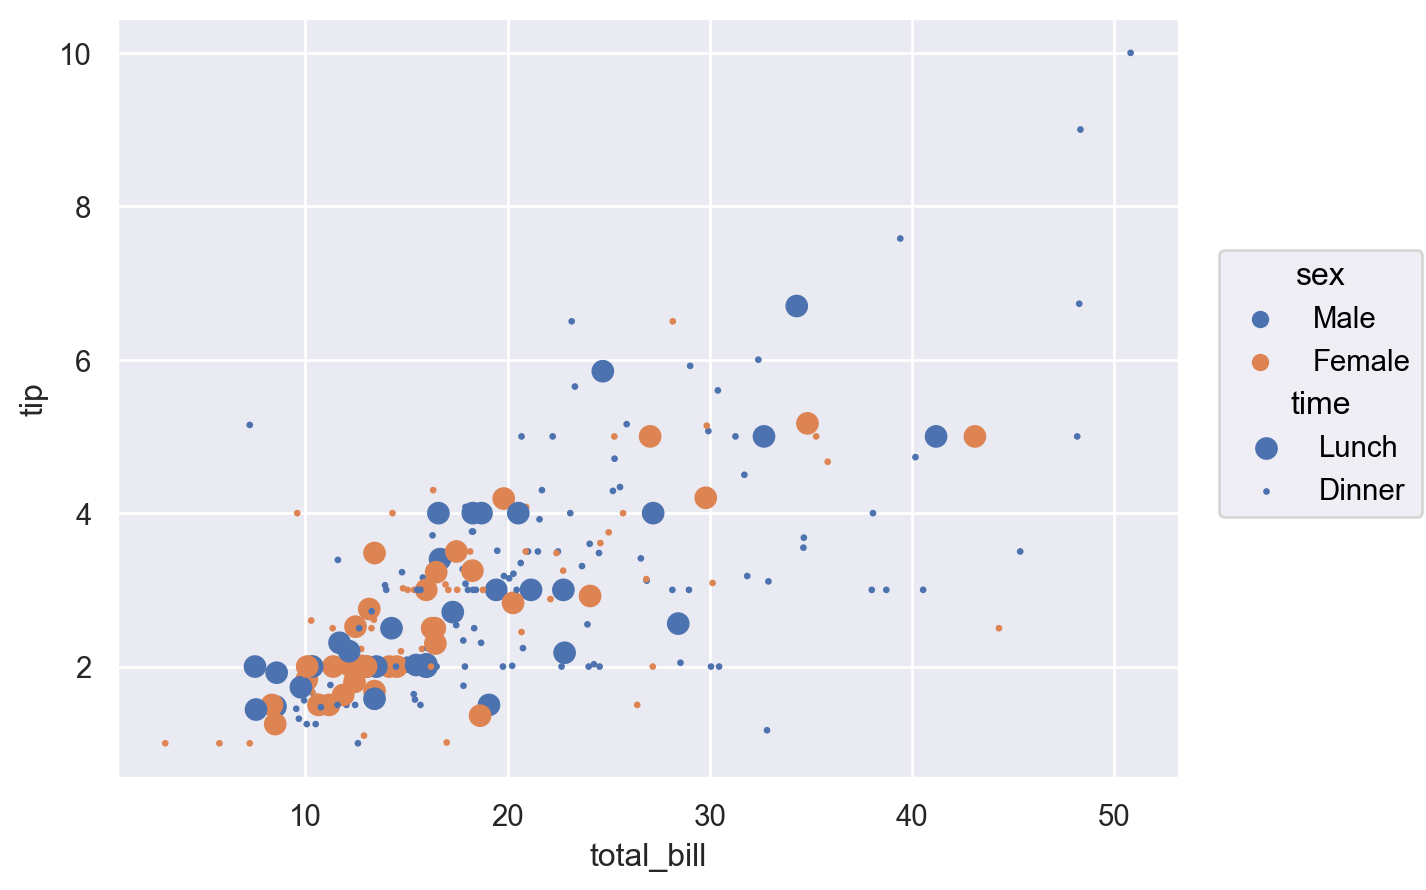

In [23]:
# 2가지 이상의 속성 mapping
# 색(Color), 크기(pointsize)
(
    so.Plot(tips, x="total_bill", y="tip", color="sex", pointsize='time')
    .add(so.Dot())
)

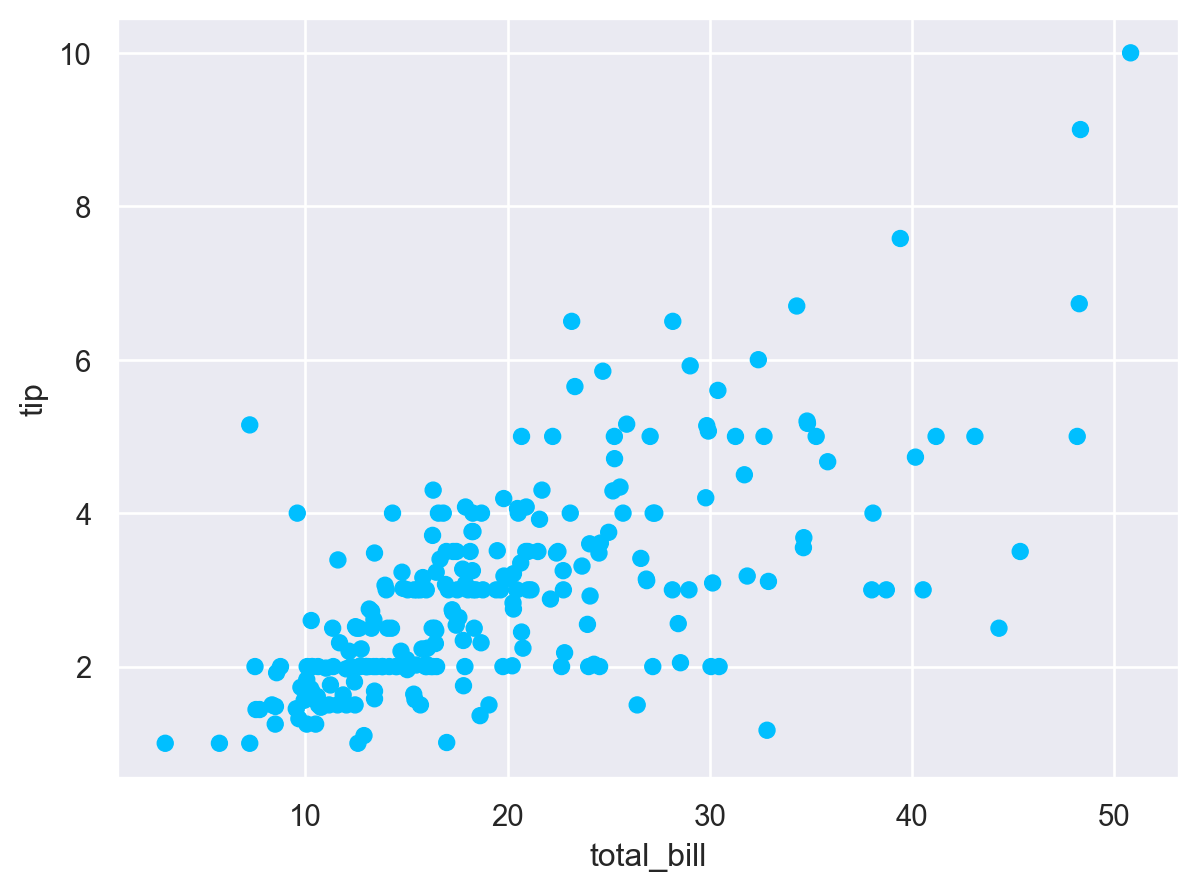

In [24]:
# Setting Properties
#  color: deepskyblue
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(color="deepskyblue")) 
)

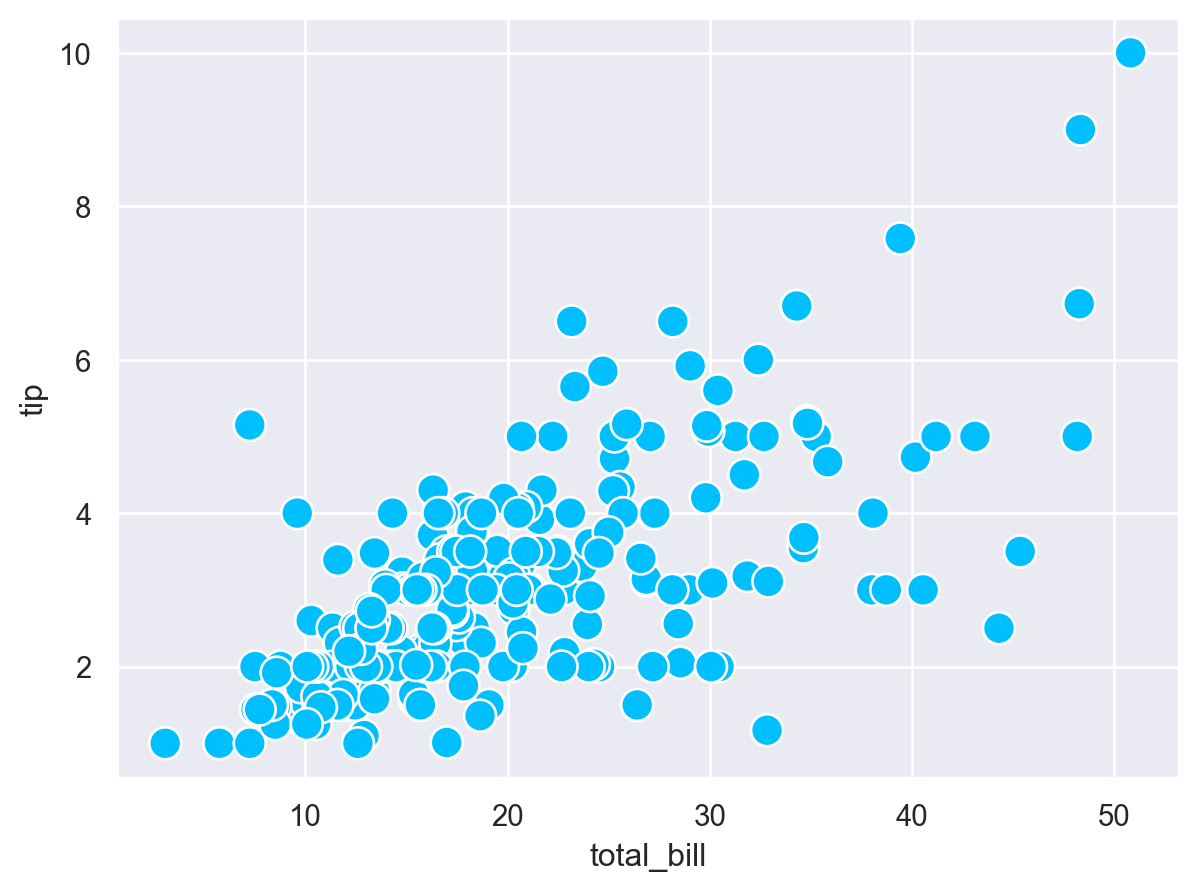

In [25]:
# Setting Properties
# color: deepskyblue / pointsize = 12 / edgecolor = white / edgewidth = 1
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(color="deepskyblue", pointsize=12, edgecolor="white", edgewidth=1)) # Mark object 안에 지정!
)

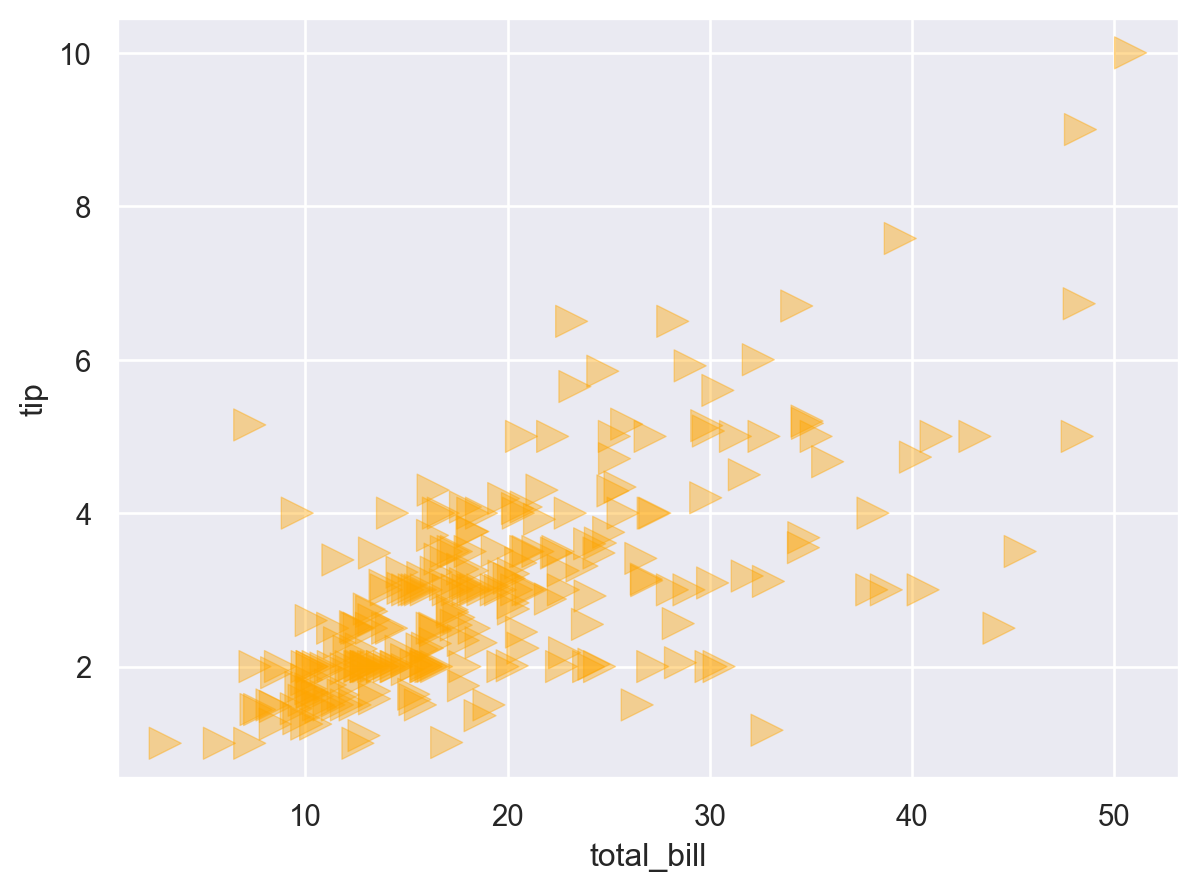

In [26]:
# Setting Properties
# color: orange / pointsize = 12 / marker = > / alpha = 0.4
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(color="orange", pointsize=12, marker=">", alpha=.4))  # Mark object 안에 지정!
)

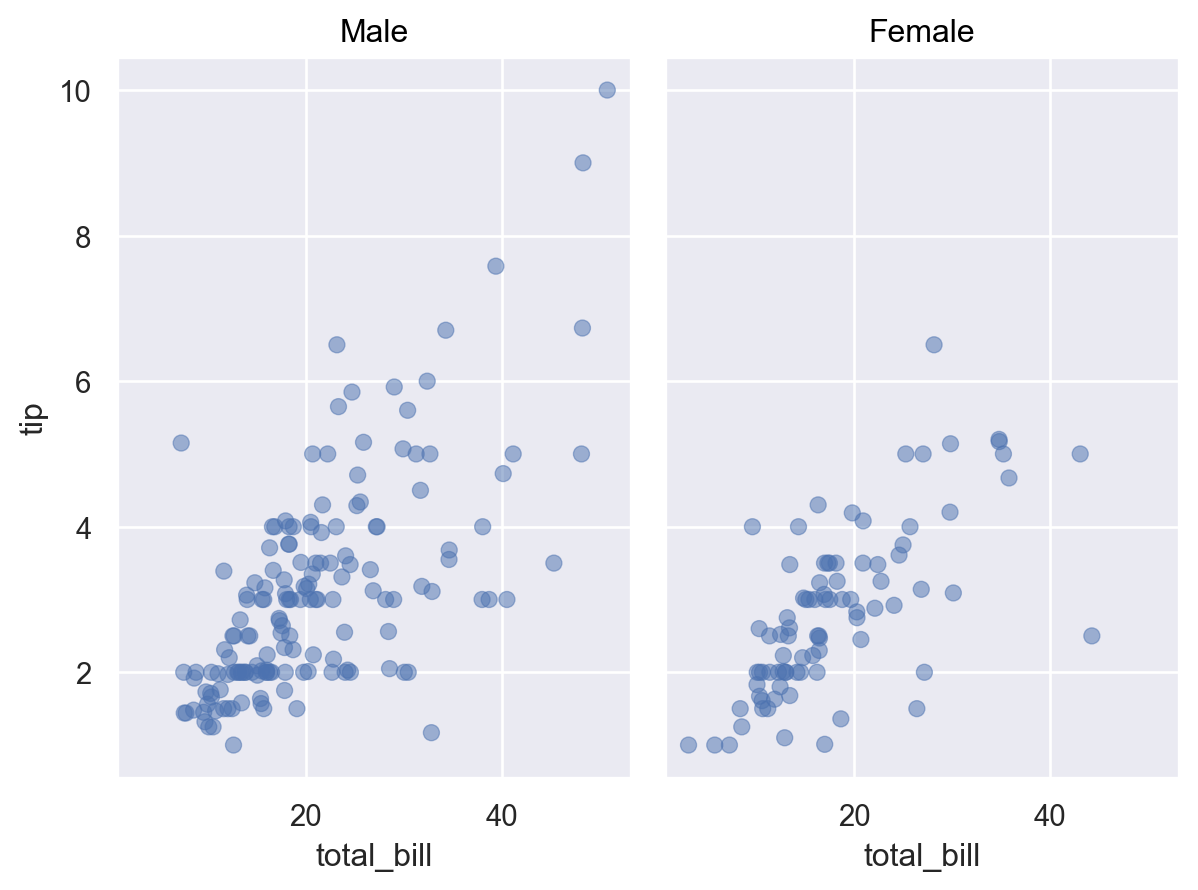

In [27]:
# Faceting

(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(alpha=.5))
    .facet("sex")  # 기본적으로 columns으로 나누어져 그림, wrap: column에 몇 개까지 그릴지
)

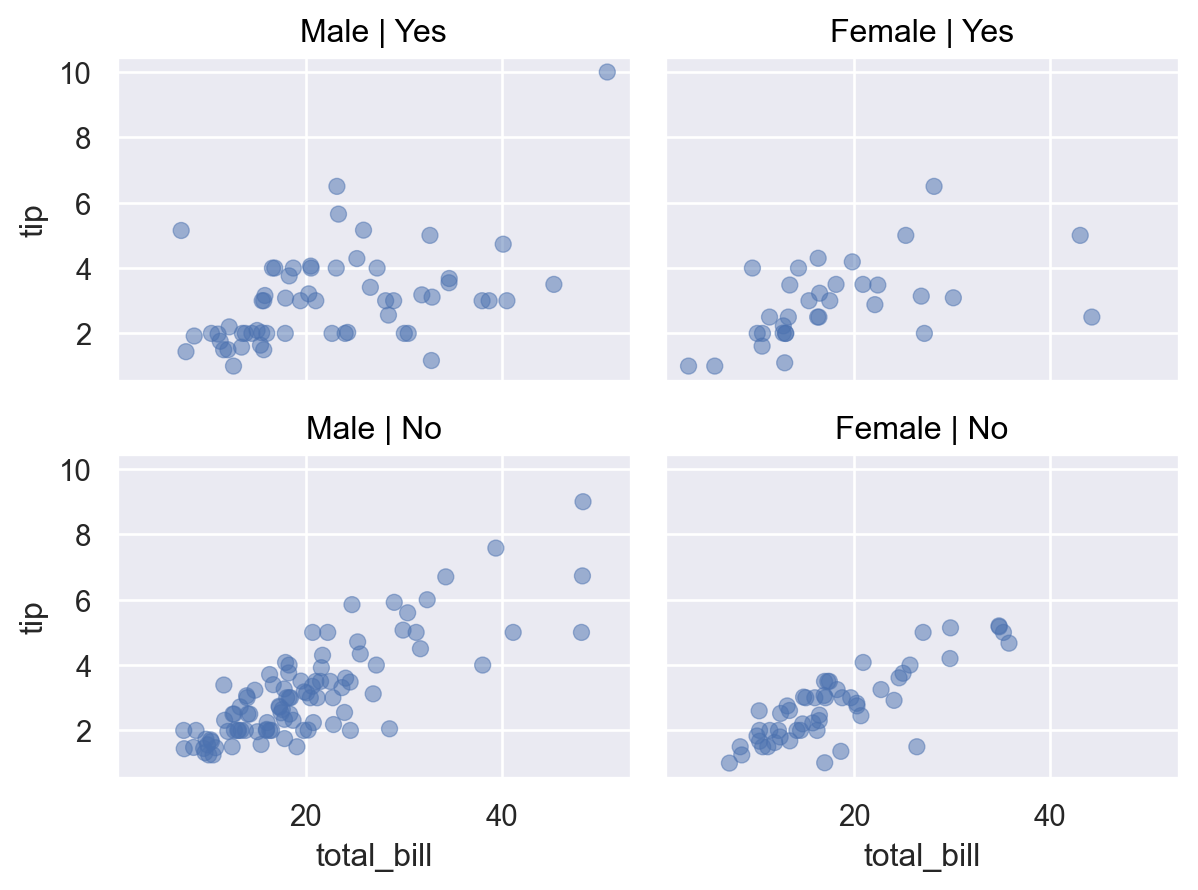

In [28]:
# Faceting

p = (
    so.Plot(tips, x="total_bill", y="tip")
    .facet(col = "sex", row = 'smoker')  # 기본적으로 columns으로 나누어져 그림, wrap: column에 몇 개까지 그릴지
    .add(so.Dot(alpha=.5))
)

p

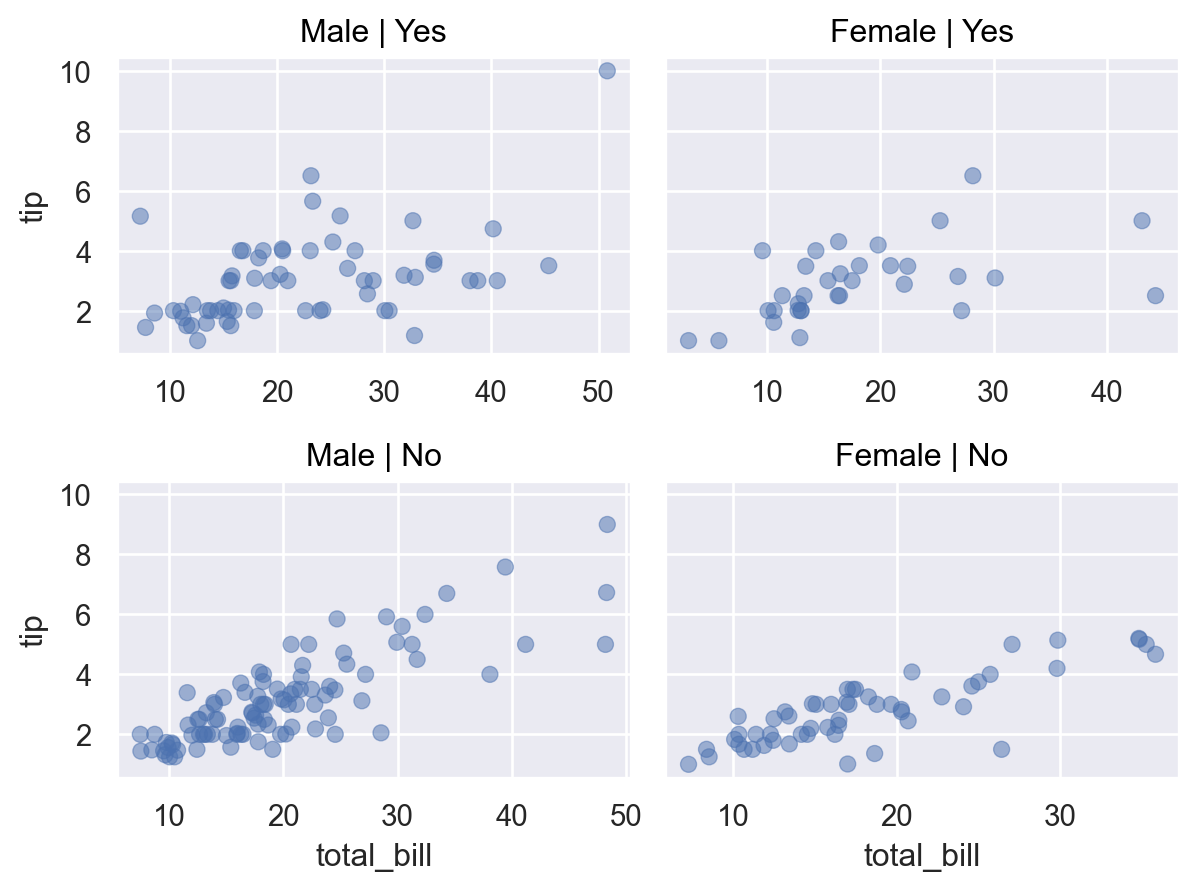

In [29]:
# x, y축의 눈금을 일치할지 여부
p.share(x=False, y=True)

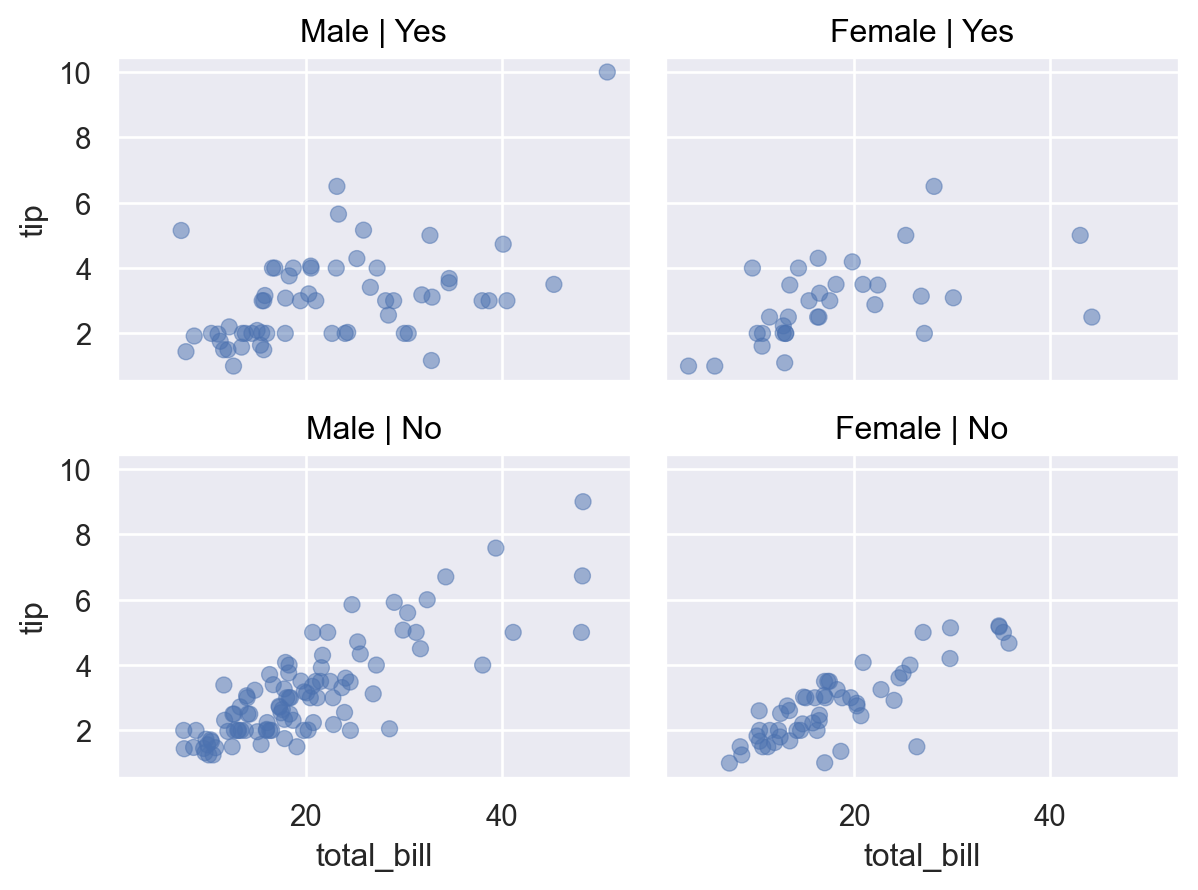

In [31]:
p

In [39]:
left = (
    so.Plot(tips, x="total_bill", y="tip")
    .facet(col="sex")
    .add(so.Dot(alpha=.5))
)
right = (
    so.Plot(tips, x="total_bill", y="tip", color="sex")
    .add(so.Dot(alpha=.5))
)

bottom = (
    so.Plot(tips, x="total_bill", y="tip")
    .facet(row="sex")
    .add(so.Dot(alpha=.5))
)

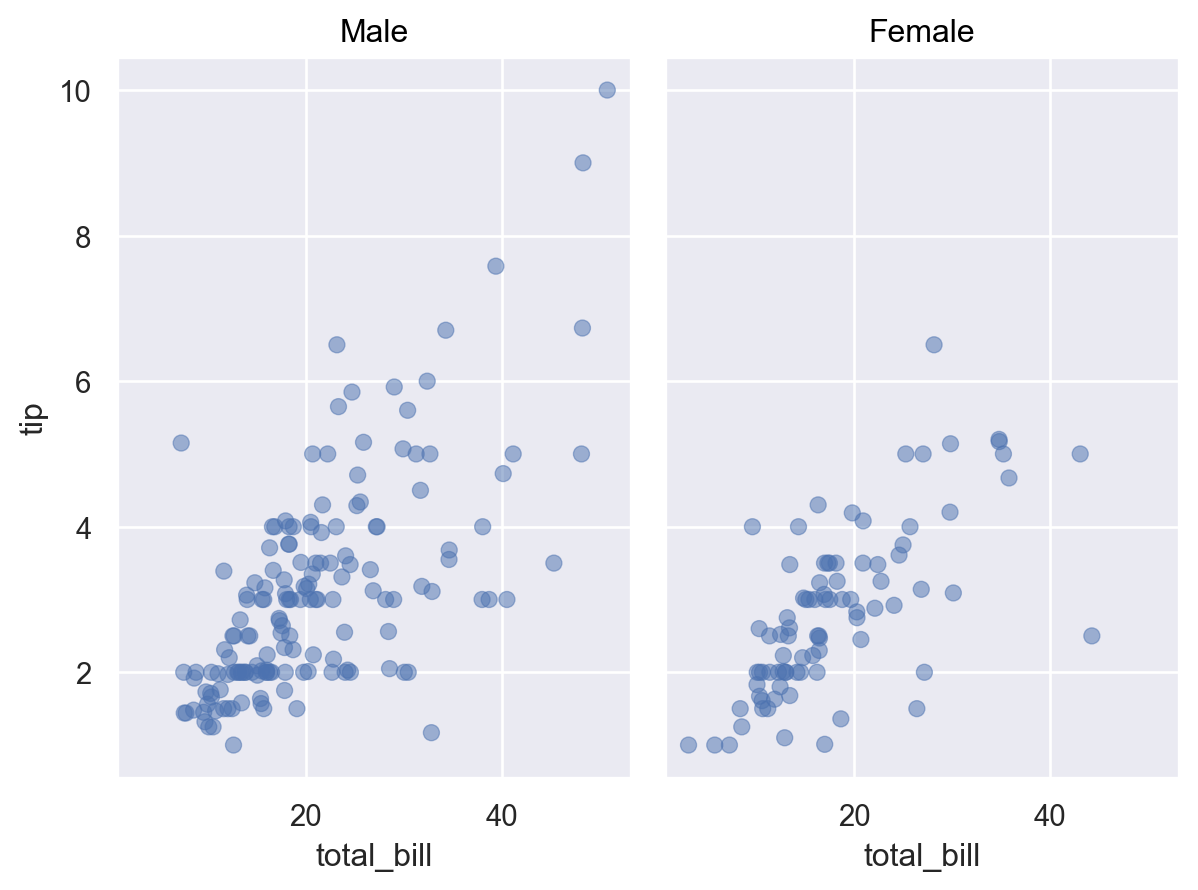

In [35]:
left

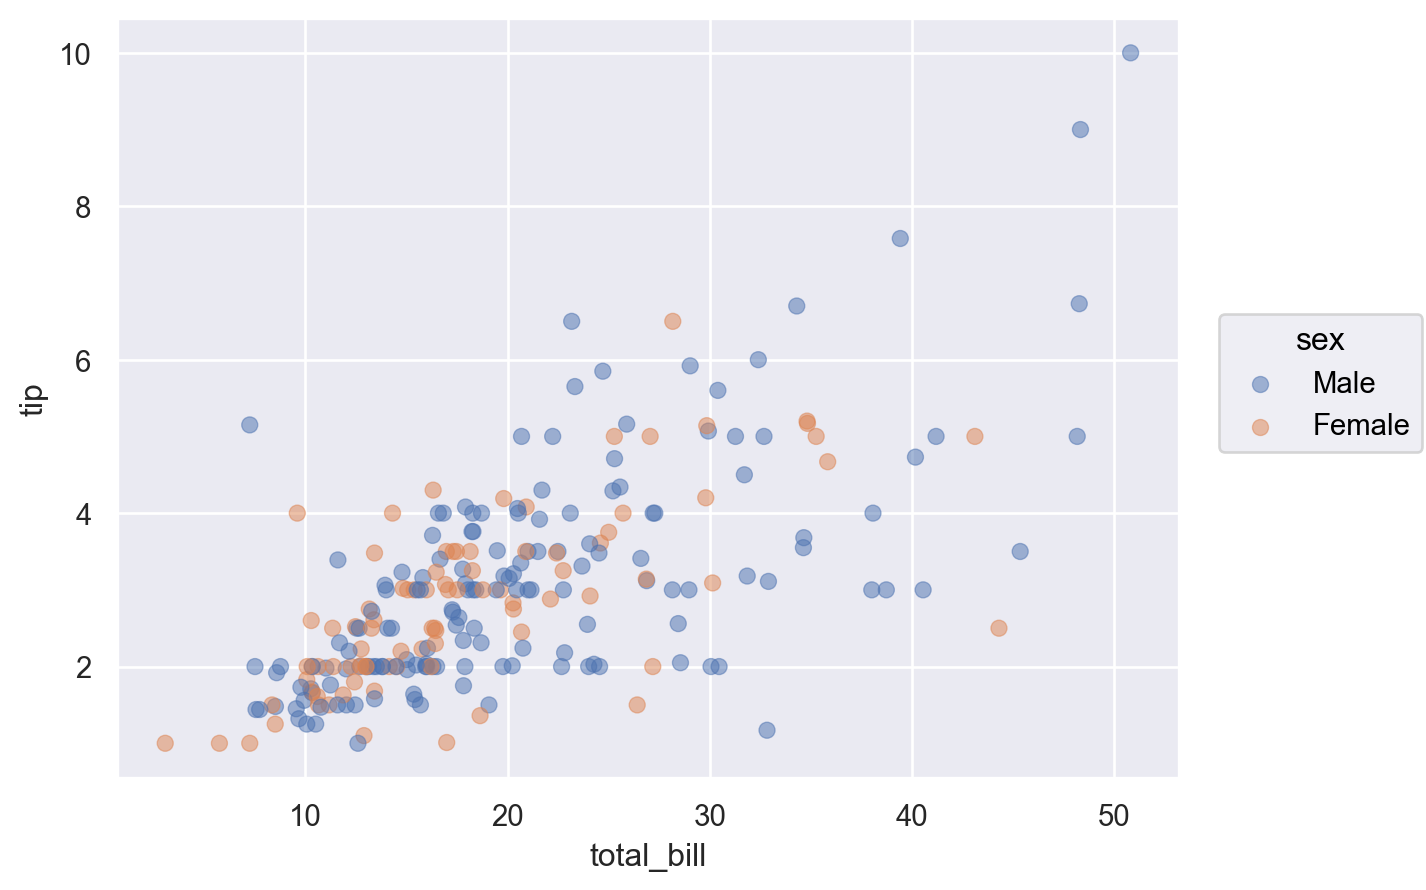

In [36]:
right

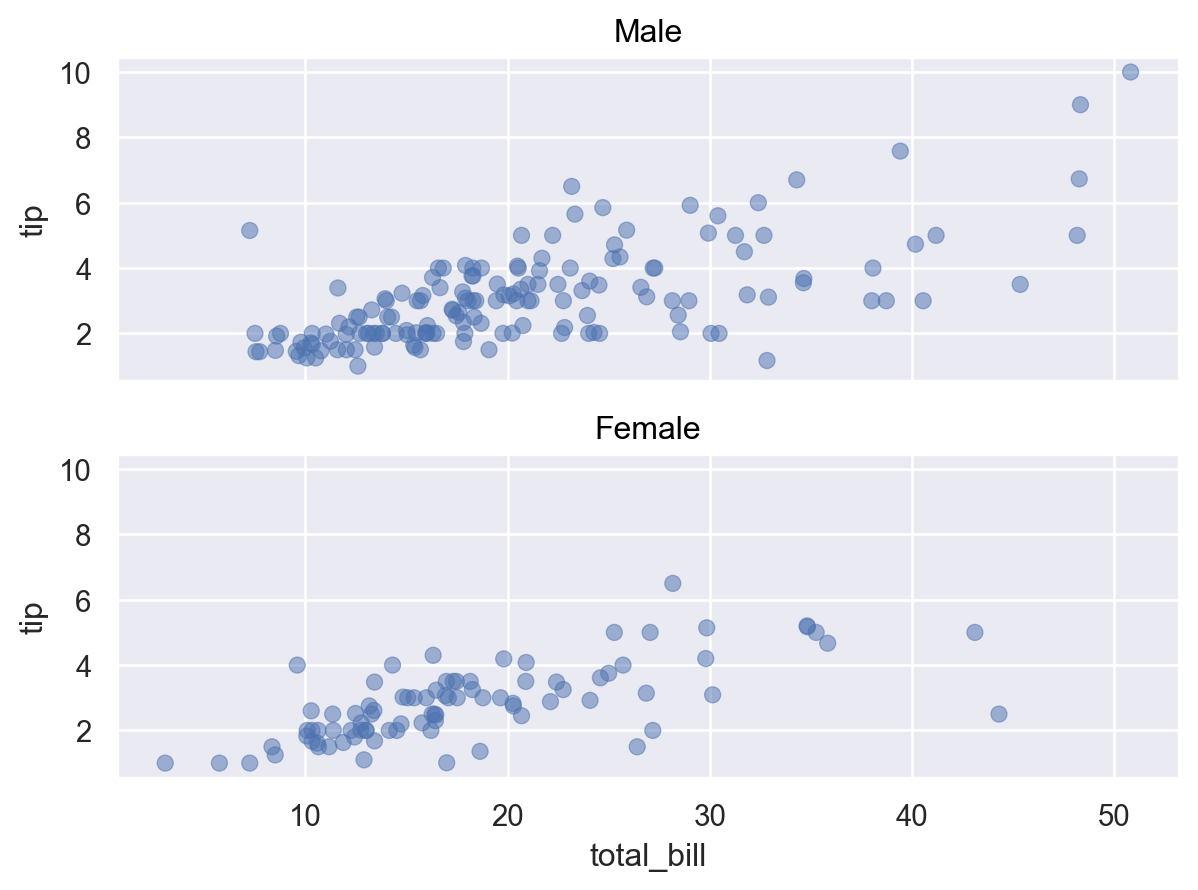

In [37]:
bottom

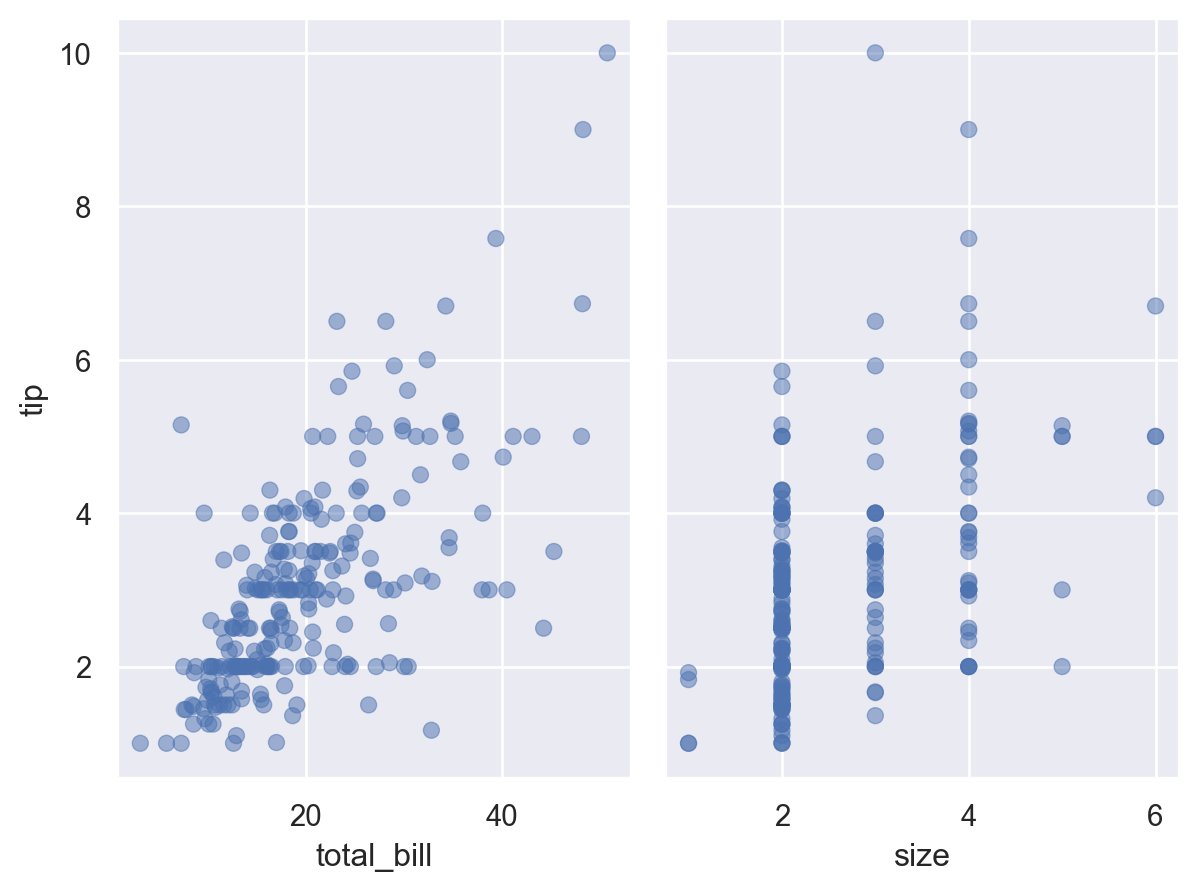

In [40]:
# Pairing
#Faceting이 변수 내에 다른 레벨에 따라 그려지는데 반해, paring은 x, y축에 다른 변수를 지정하여 그림

(
    so.Plot(tips, y="tip")
    .pair(x= ["total_bill", 'size'])
    .add(so.Dot(alpha=.5))
)

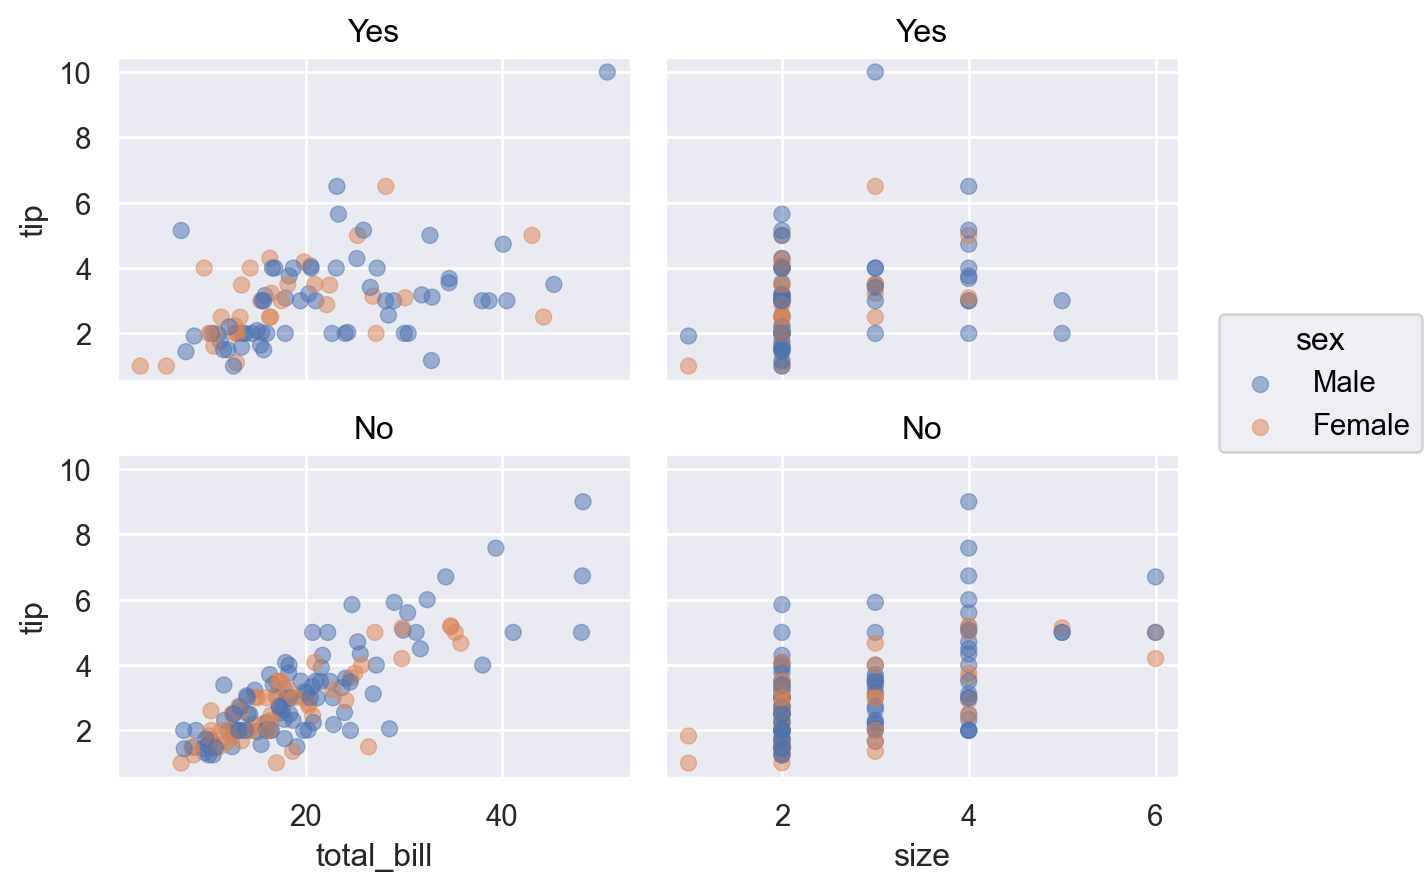

In [42]:
# Facet & pair 동시에

(
    so.Plot(tips, y="tip", color = 'sex')
    .pair(x= ["total_bill", 'size'])
    .facet(row='smoker')
    .add(so.Dot(alpha=.5))
)

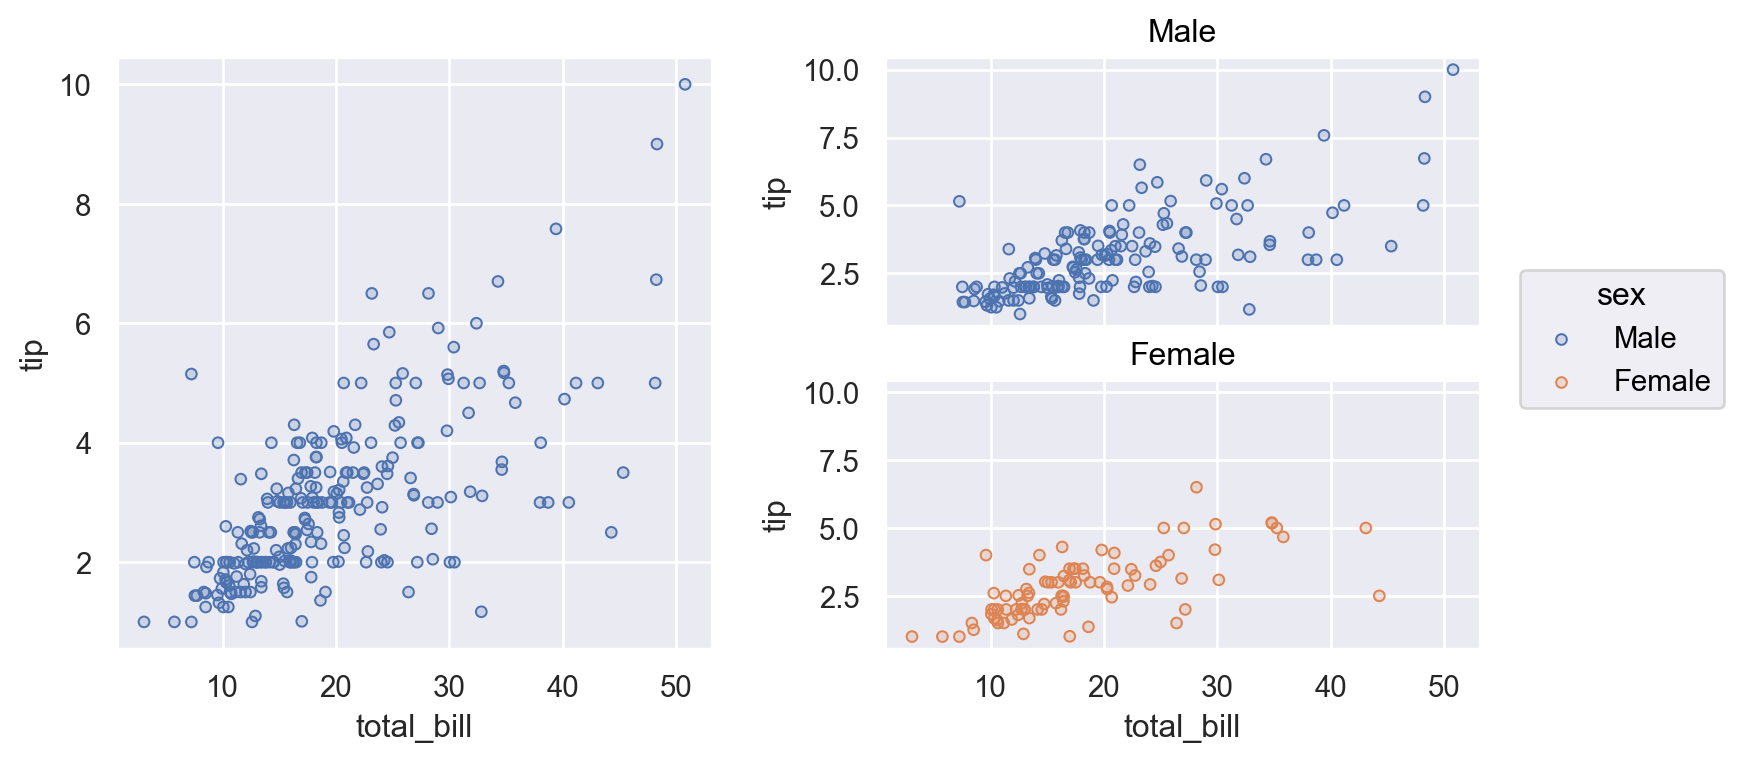

In [44]:
import matplotlib as mpl

f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(    
    so.Plot(tips, x="total_bill", y='tip')
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(tips, x="total_bill", y="tip", color="sex")
    .facet(row="sex")
    .add(so.Dots())
    .on(sf2)
    .plot()
)

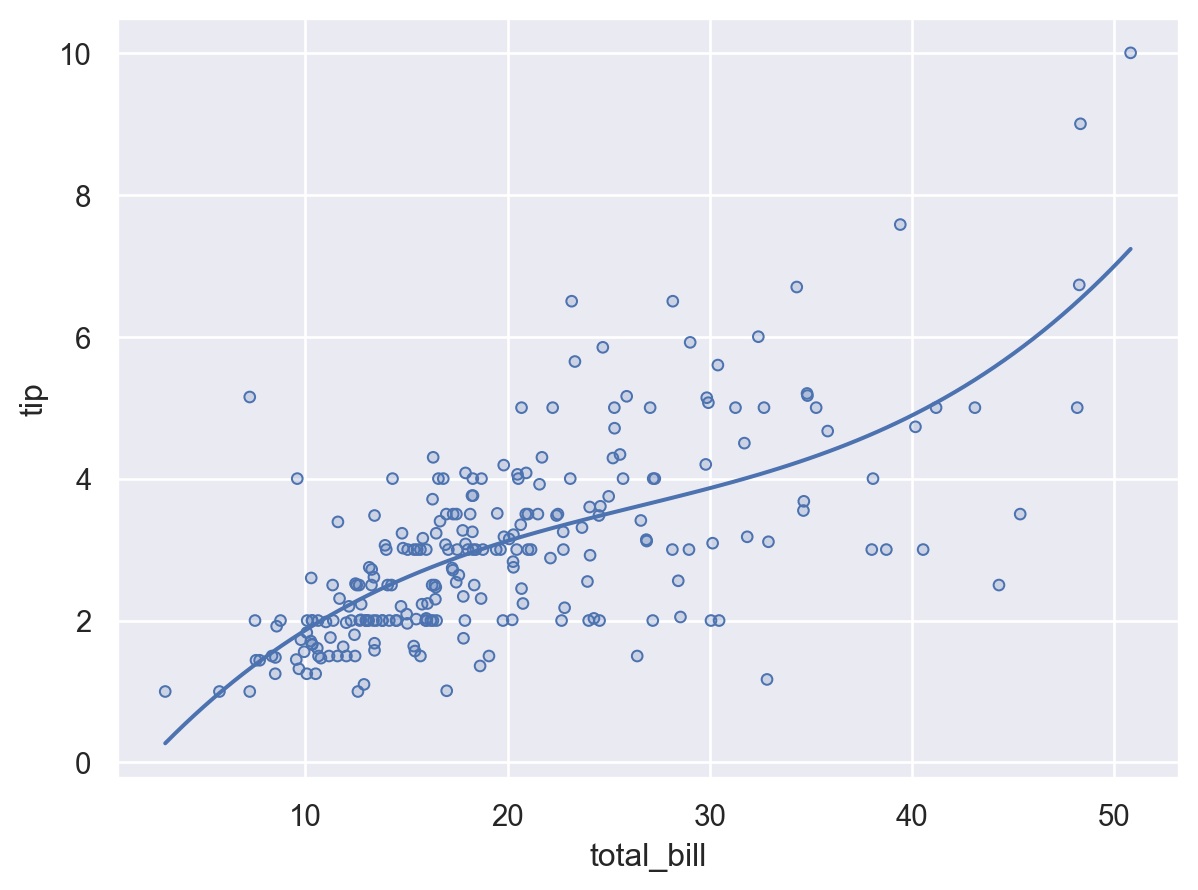

In [49]:
# fitted lines 
# 3차 다항식으로 fit
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit(3))
)

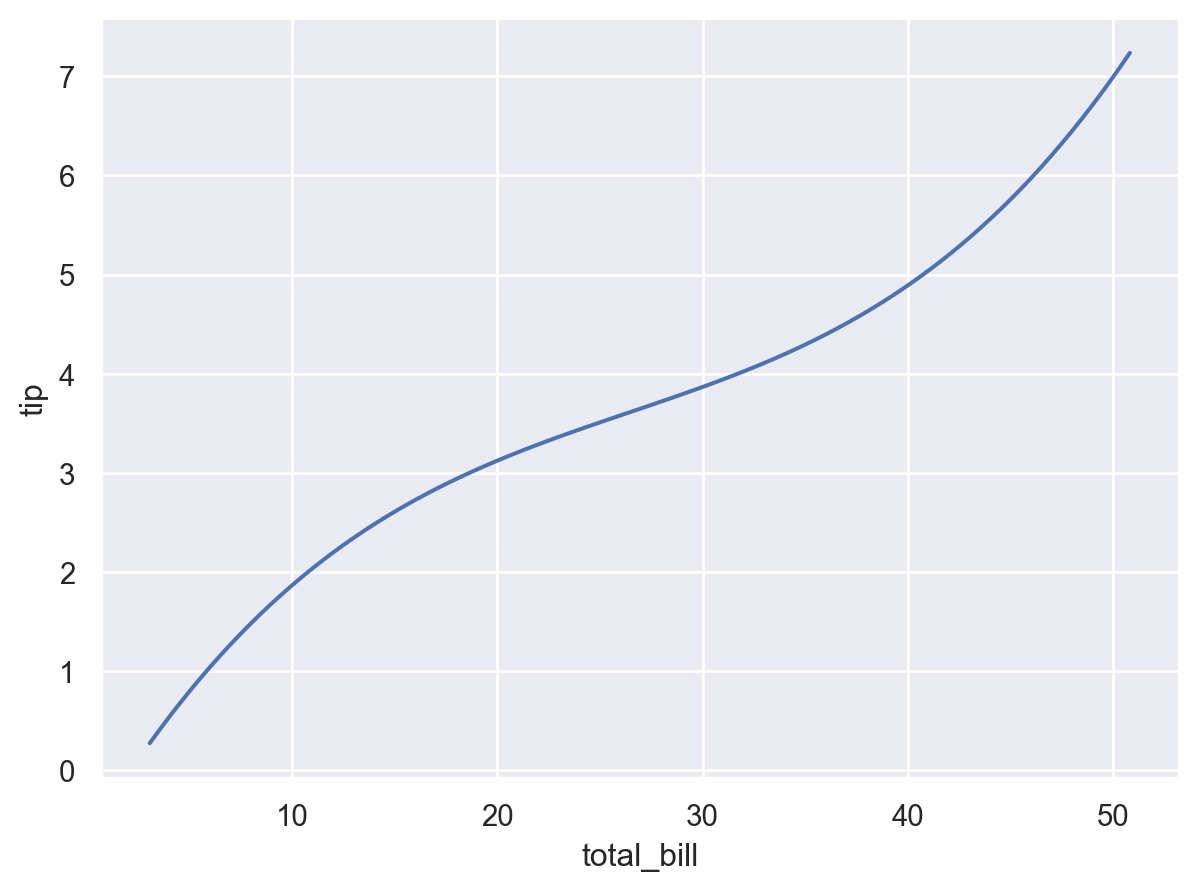

In [50]:
# fitted lines
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Line(), so.PolyFit(3))
)

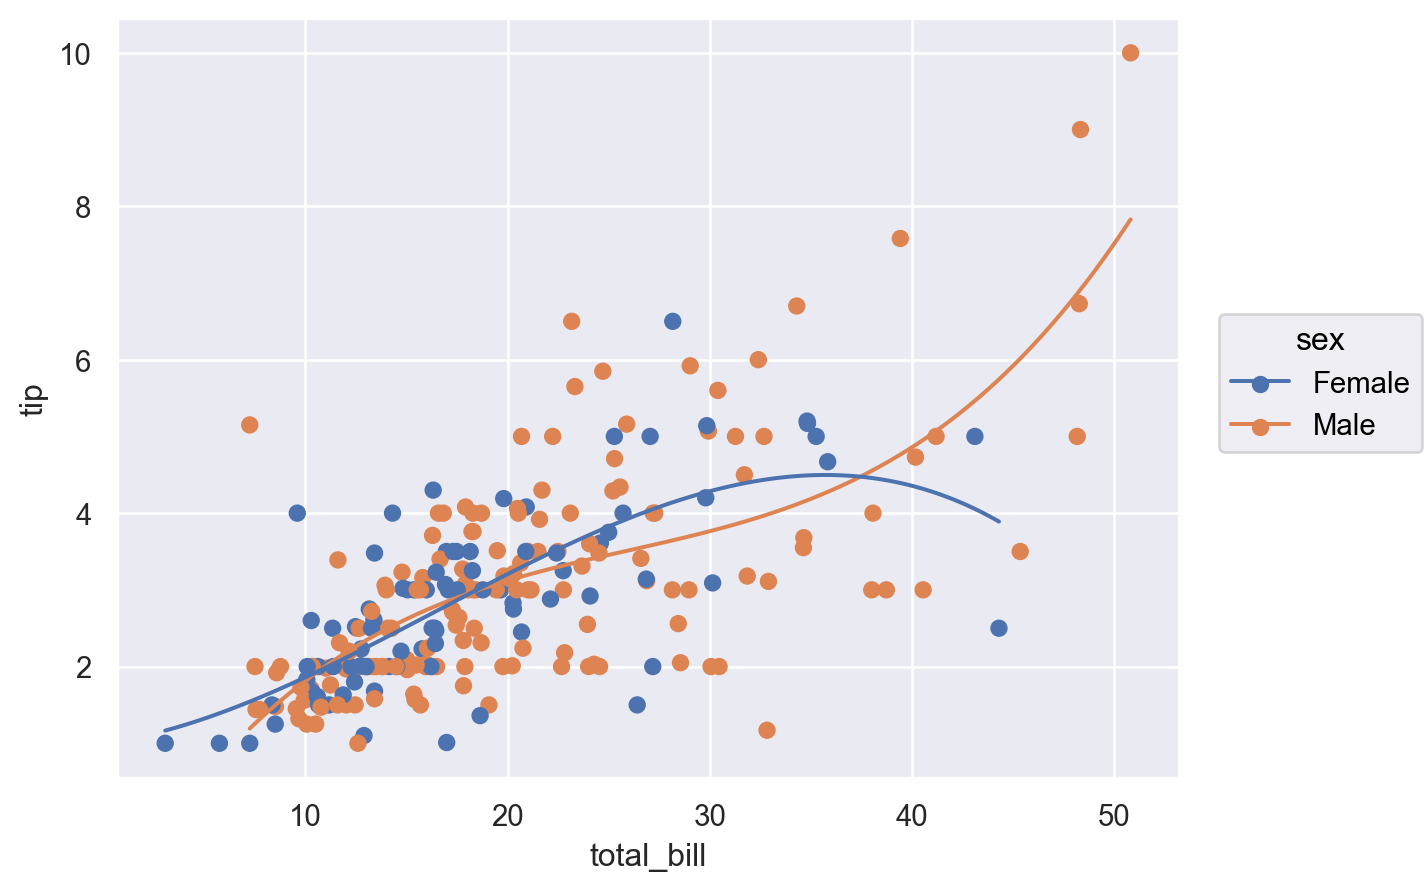

In [51]:
# fitted lines
# sex 별 추세
(
    so.Plot(tips, x="total_bill", y="tip", color = "sex")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(3))
)

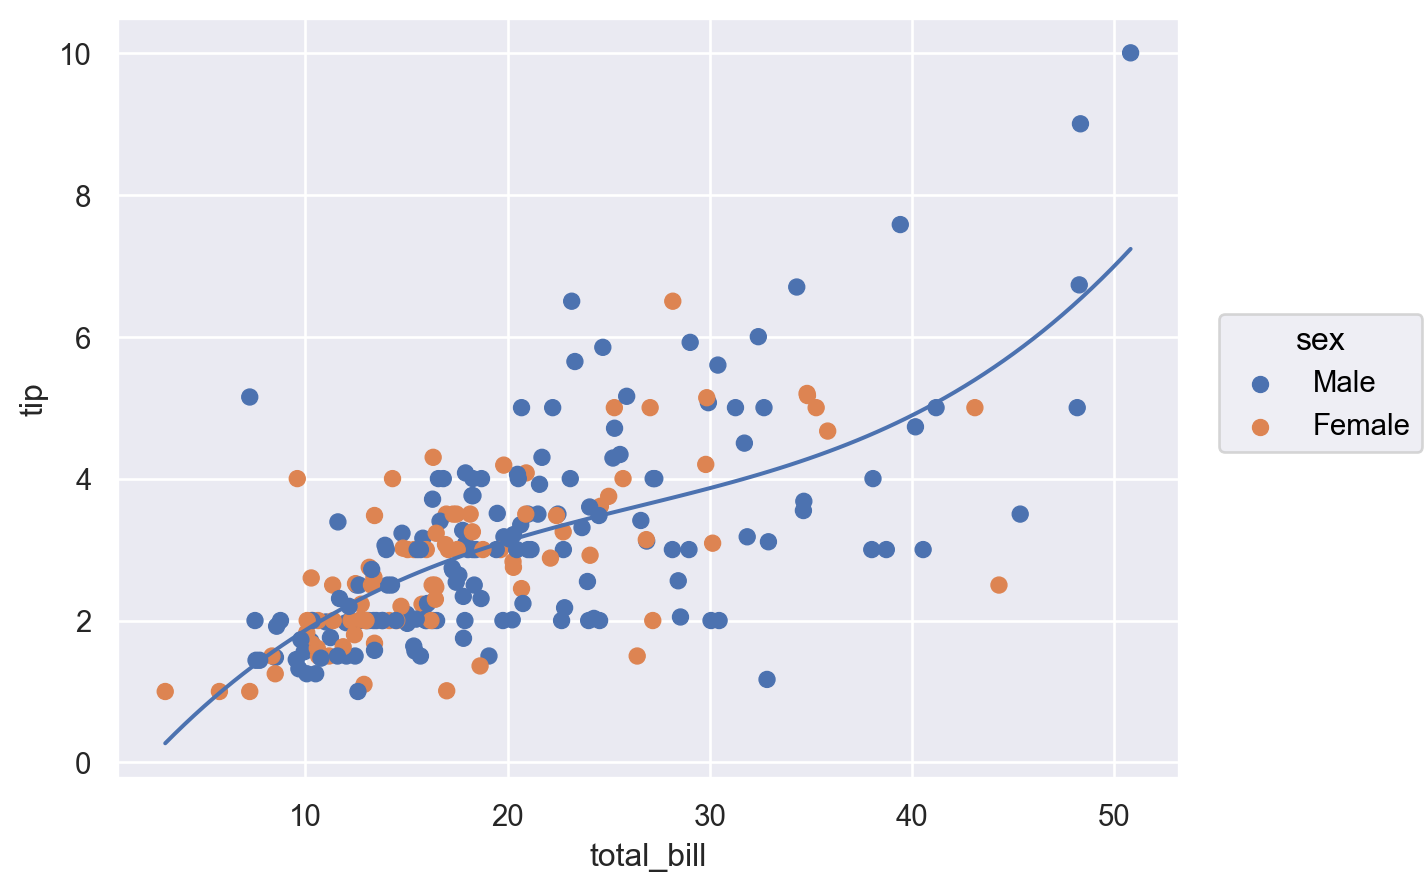

In [52]:
# fitted lines
# 전체 추세
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(), color = "sex")
    .add(so.Line(), so.PolyFit(3))
)

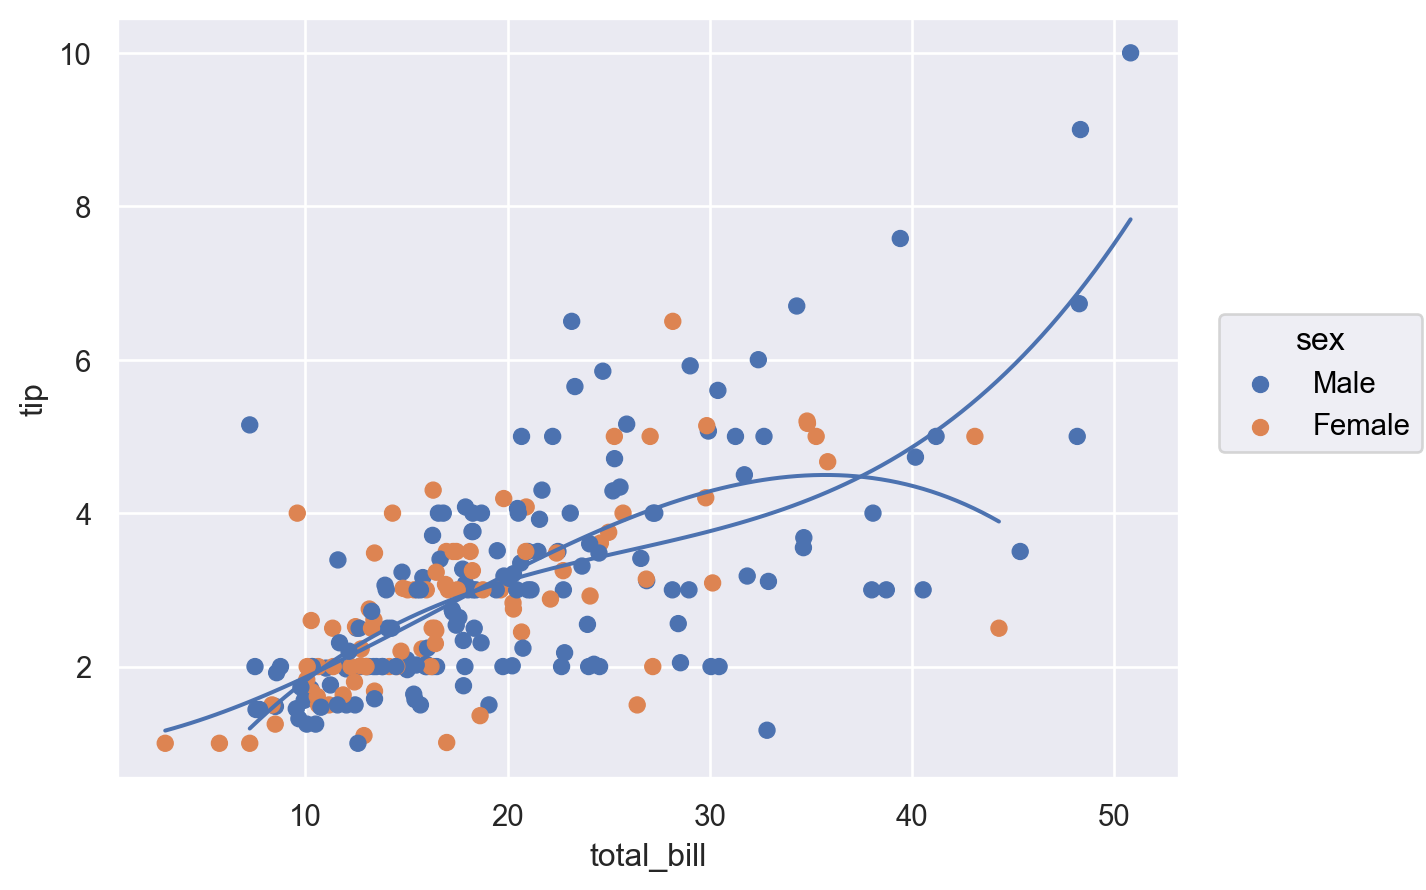

In [53]:
# fitted lines
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(), color = "sex")
    .add(so.Line(), so.PolyFit(3), group = "sex") # color가 아닌 group으로 grouping
)

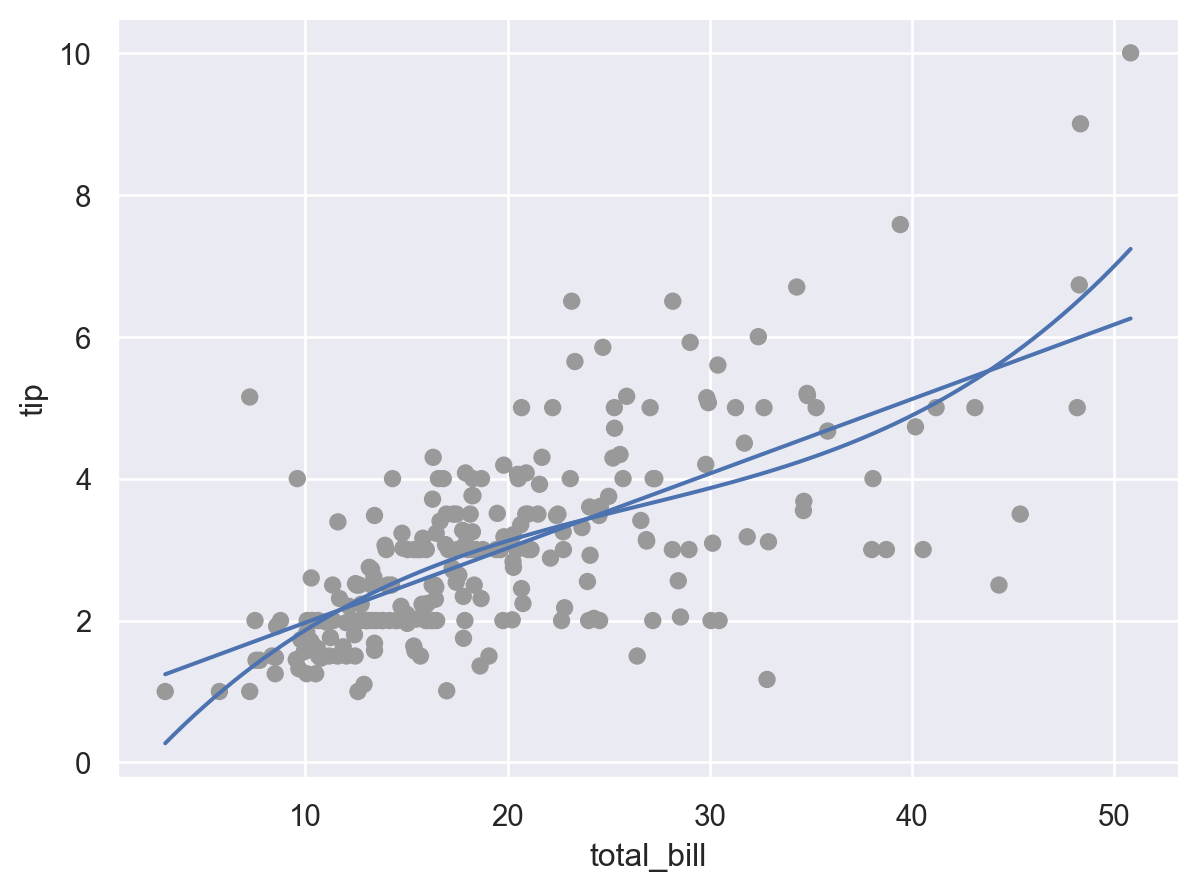

In [54]:
# Linear fit vs. smoothing fit
# 선형적인 트렌드에서 얼마나 벗어나는가?

(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(color=".6"))
    .add(so.Line(), so.PolyFit(3))
    .add(so.Line(), so.PolyFit(1))
)

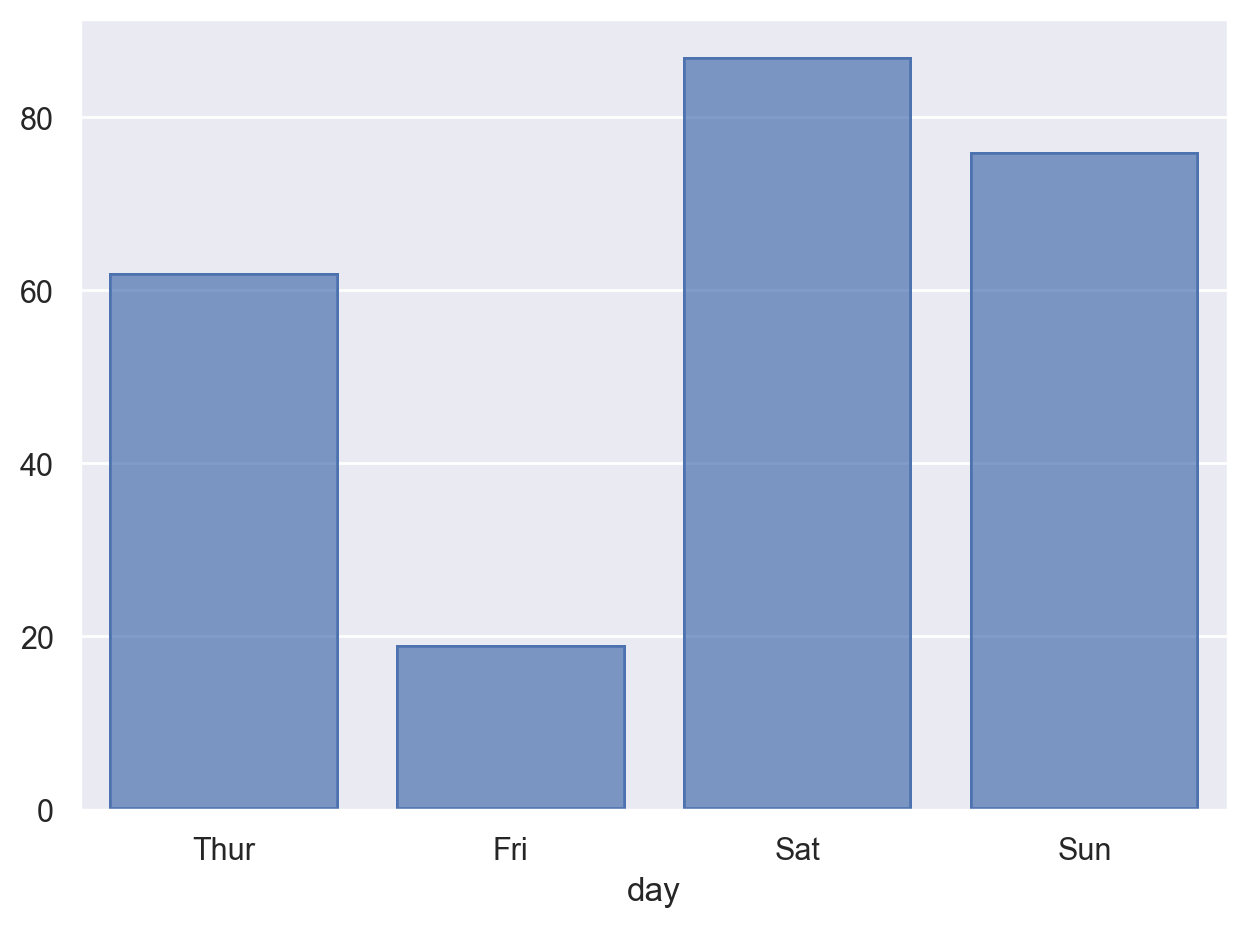

In [56]:
(
    so.Plot(tips, x="day")
    .add(so.Bar(), so.Count())  # category type의 변수는 순서가 존재. 
                                # 그렇지 않은 경우 알바벳 순서로. 
).show()  # .show()는 생략해도 됨

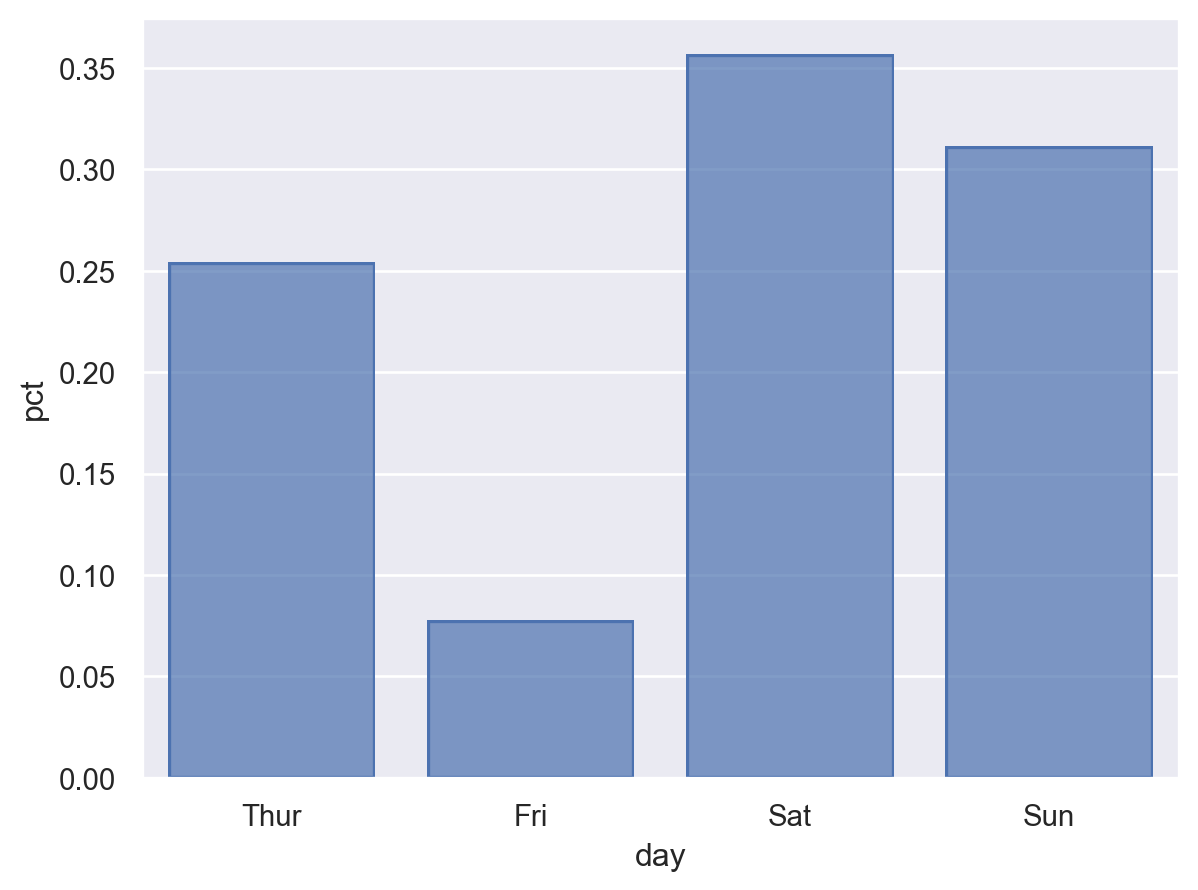

In [57]:
count_day = tips.value_counts("day", normalize=True).reset_index(name="pct")
#     day  pct
# 0   Sat 0.36
# 1   Sun 0.31
# 2  Thur 0.25
# 3   Fri 0.08

(
    so.Plot(count_day, x="day", y="pct")
    .add(so.Bar())
)

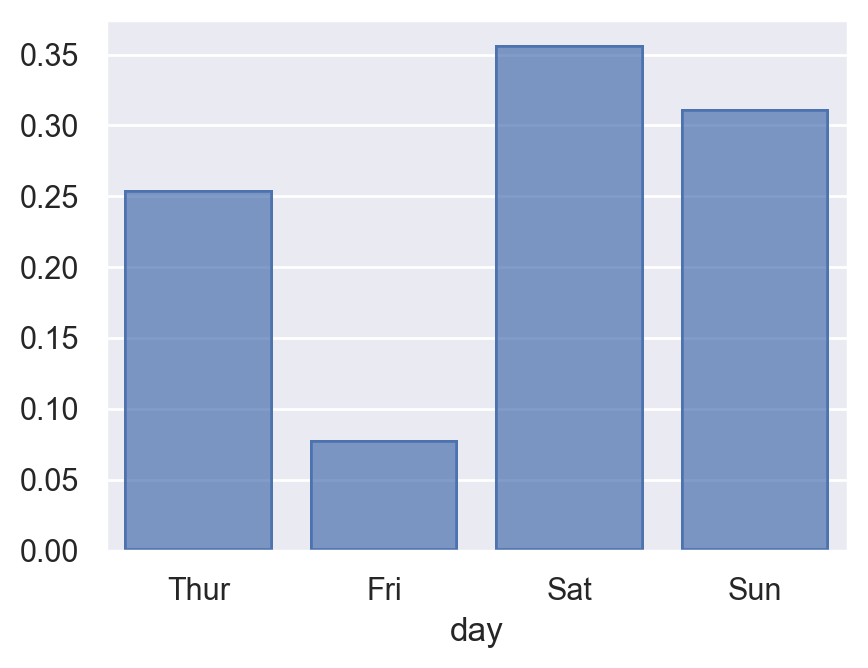

In [58]:
(
    so.Plot(tips, x="day")
    .add(so.Bar(), so.Hist("proportion"))   # Hist()의 default는 stat="count" 
    .layout(size=(4.5, 3.5))
).show()

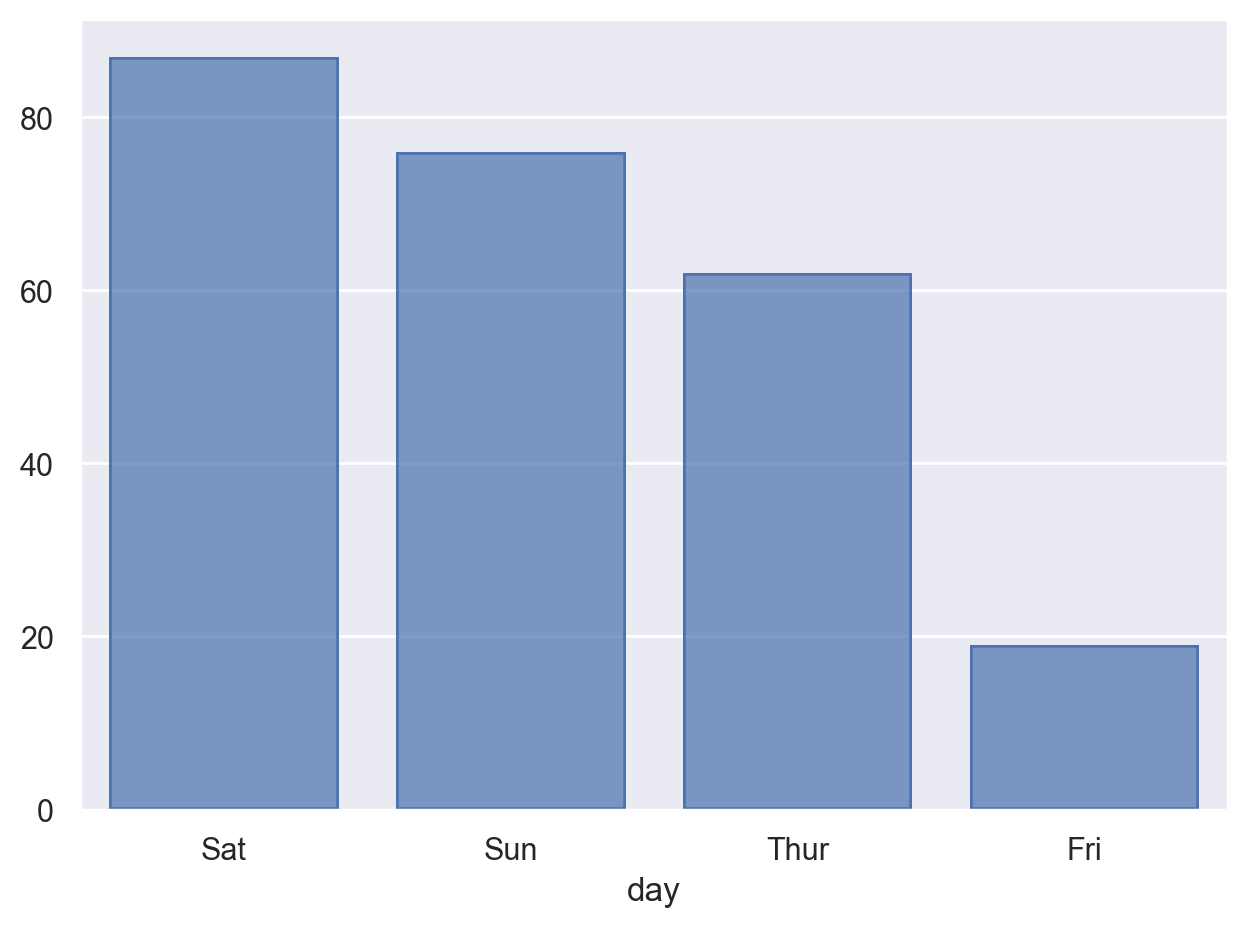

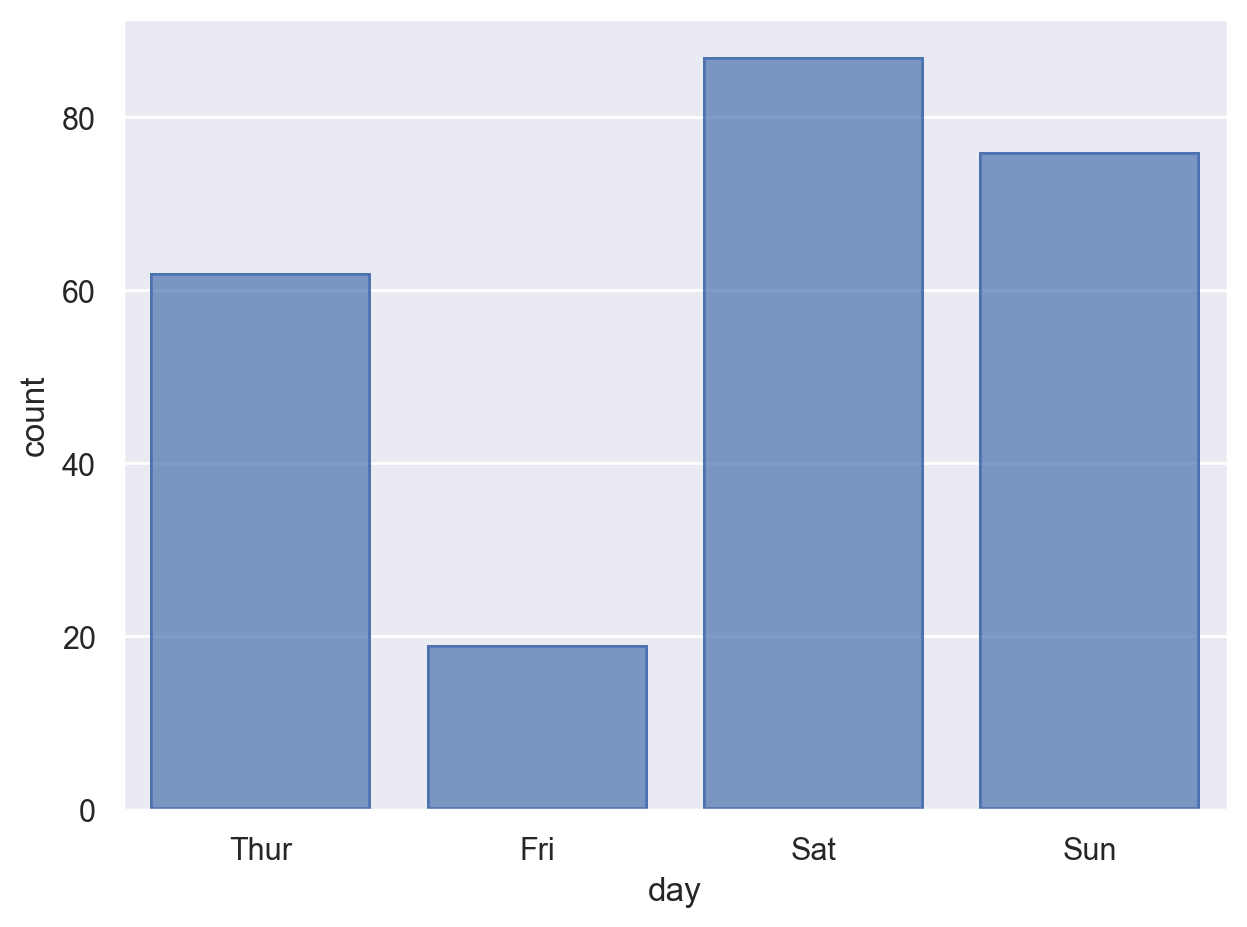

In [60]:
# value_counts()는 크기대로 sorting!
reorder = tips.value_counts("day").index.values

(
    so.Plot(tips, x="day")
    .add(so.Bar(), so.Count())
    .scale(x=so.Nominal(order=reorder))  # x축의 카테고리 순서를 변경
).show()

# 직접 개수를 구해 그리는 경우, 테이블의 순서대로 그려짐
(
    so.Plot(tips.value_counts("day").reset_index(), 
            x="day", y="count")
    .add(so.Bar())
).show()

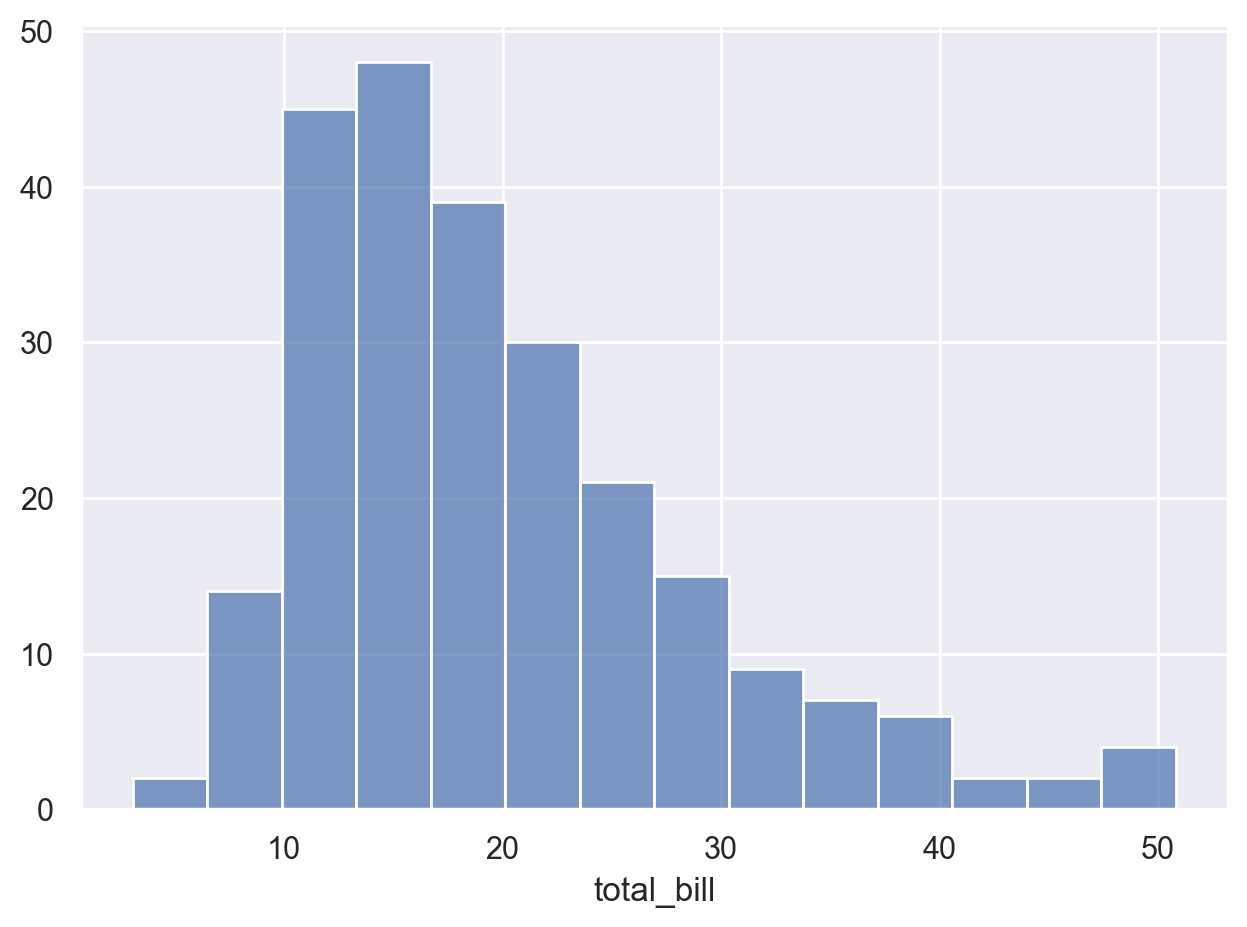

In [61]:
(
    so.Plot(tips, x="total_bill")
    .add(so.Bars(), so.Hist())  # Histogram; x값을 bins으로 나누어 count를 계산!
                                # .Bars()는 .Bar()에 비해 연속변수에 더 적합: 얇은 경계선으로 나란히 붙혀서 그려짐
).show()

In [78]:
left = (
    so.Plot(tips, x="total_bill")
    .add(so.Bars(), so.Hist(binwidth=10))  # binwidth vs. bins
)

right = (
    so.Plot(tips, x="total_bill")
    .add(so.Bars(), so.Hist(bins=100))  # binwidth vs. bins
)

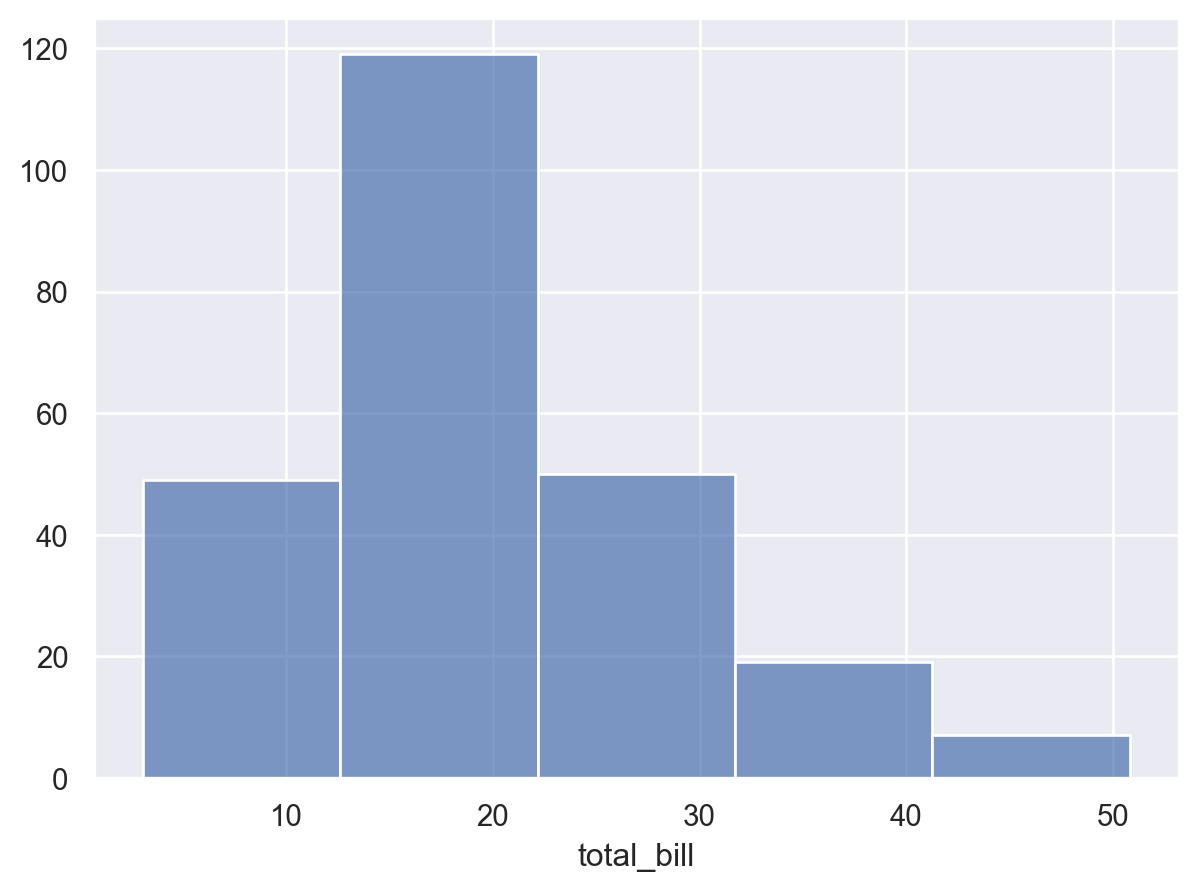

In [79]:
left

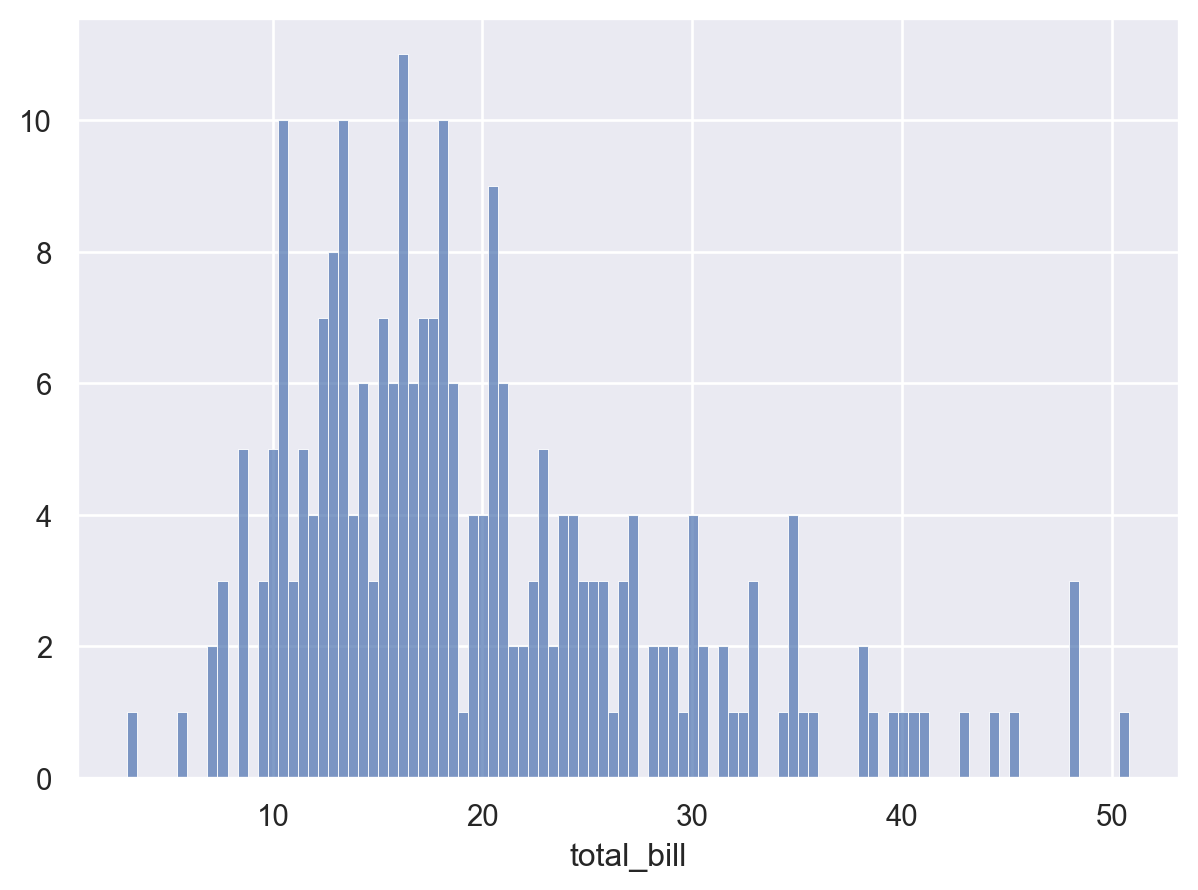

In [80]:
right

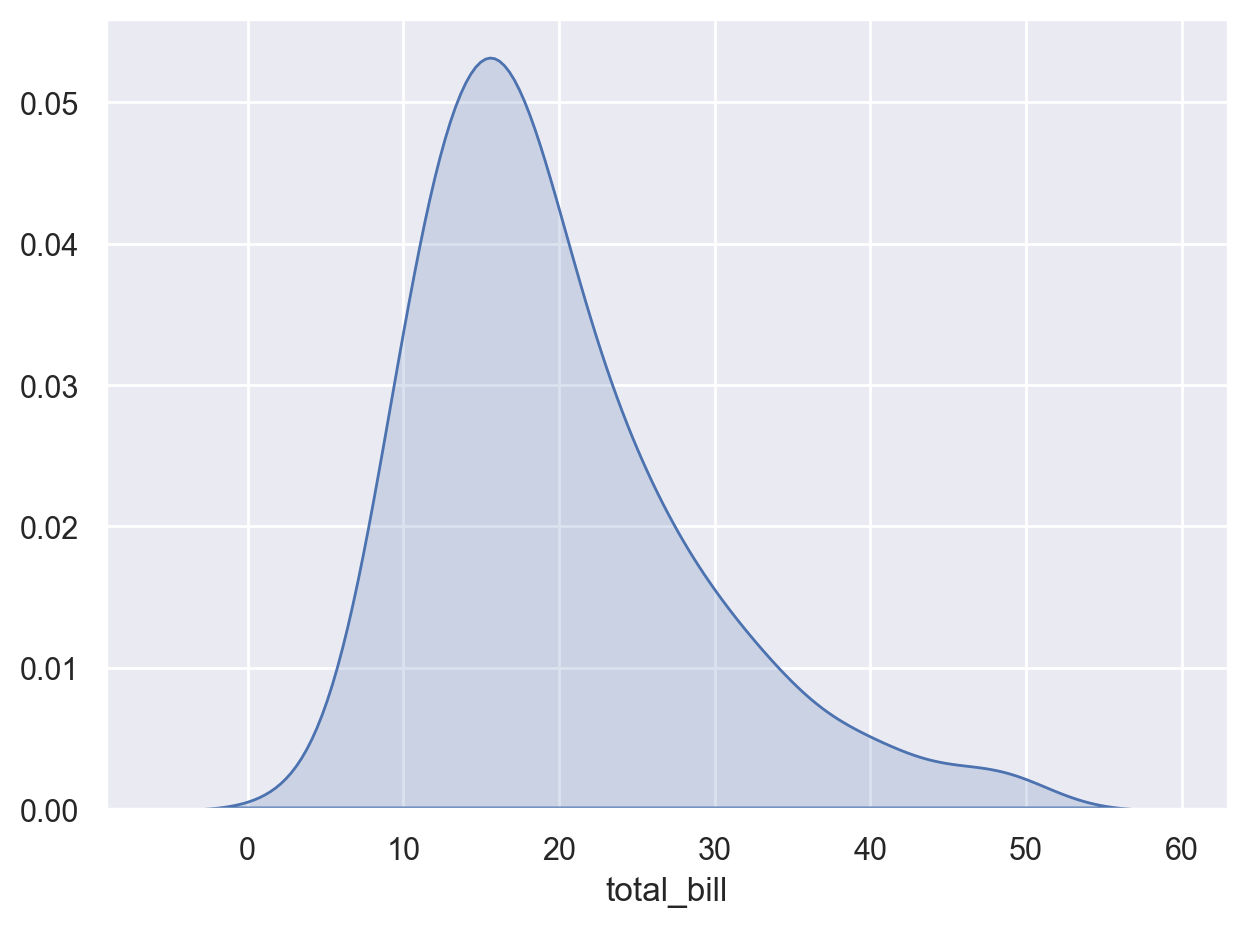

In [81]:
# Density plot: 넓이가 1이 되도록
(
    so.Plot(tips, x="total_bill")
    .add(so.Area(), so.KDE())  # Density plot
).show()

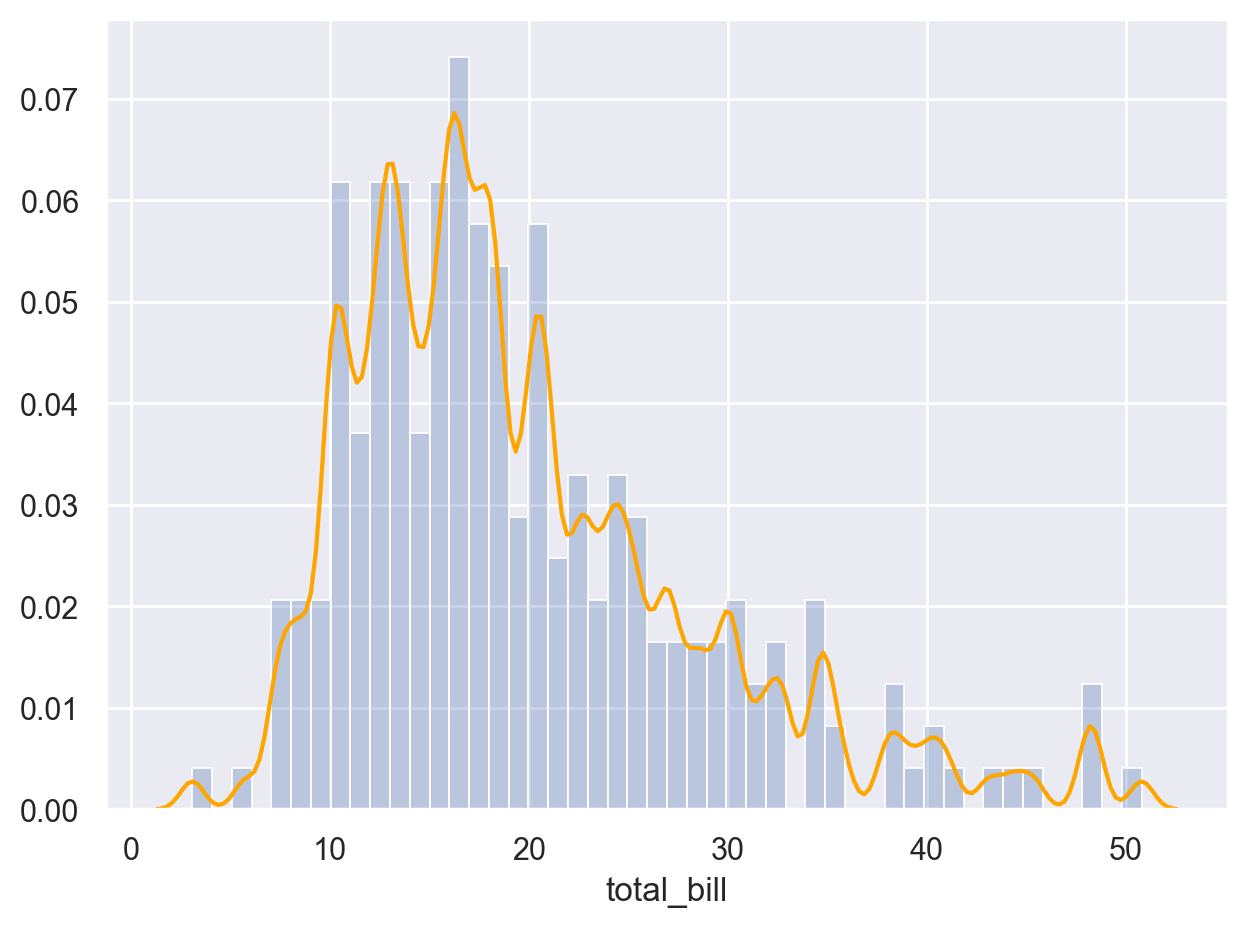

In [87]:
# Density plot: 넓이가 1이 되도록
(
    so.Plot(tips, x="total_bill")
    .add(so.Line(color="orange"), so.KDE(bw_adjust=.2))  # Density bandwidth: binwidth에 대응
    .add(so.Bars(alpha=.3), so.Hist("density", binwidth=1))  # stat="density"
).show()

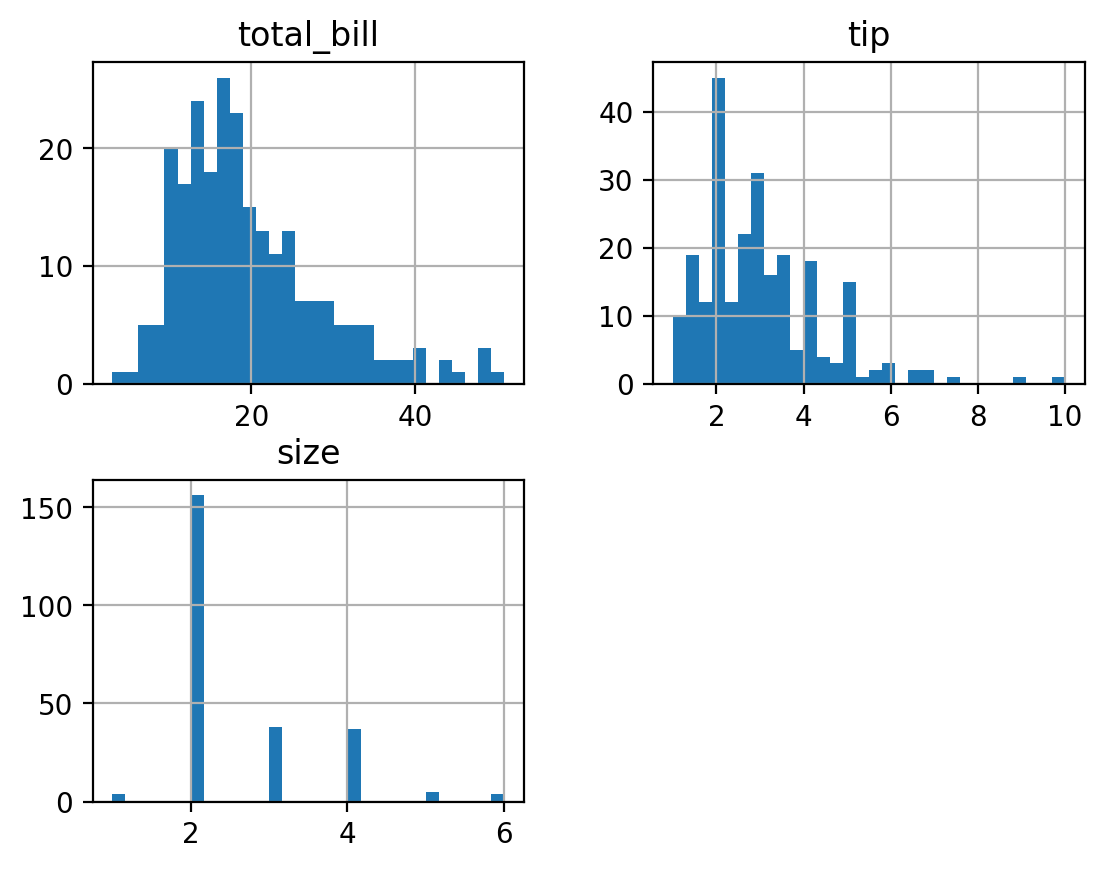

In [88]:
# pandas의 hist() method: 모든 연속 변수에 대해 histogram을 그림
tips.hist(bins=30)
plt.show() # 생략

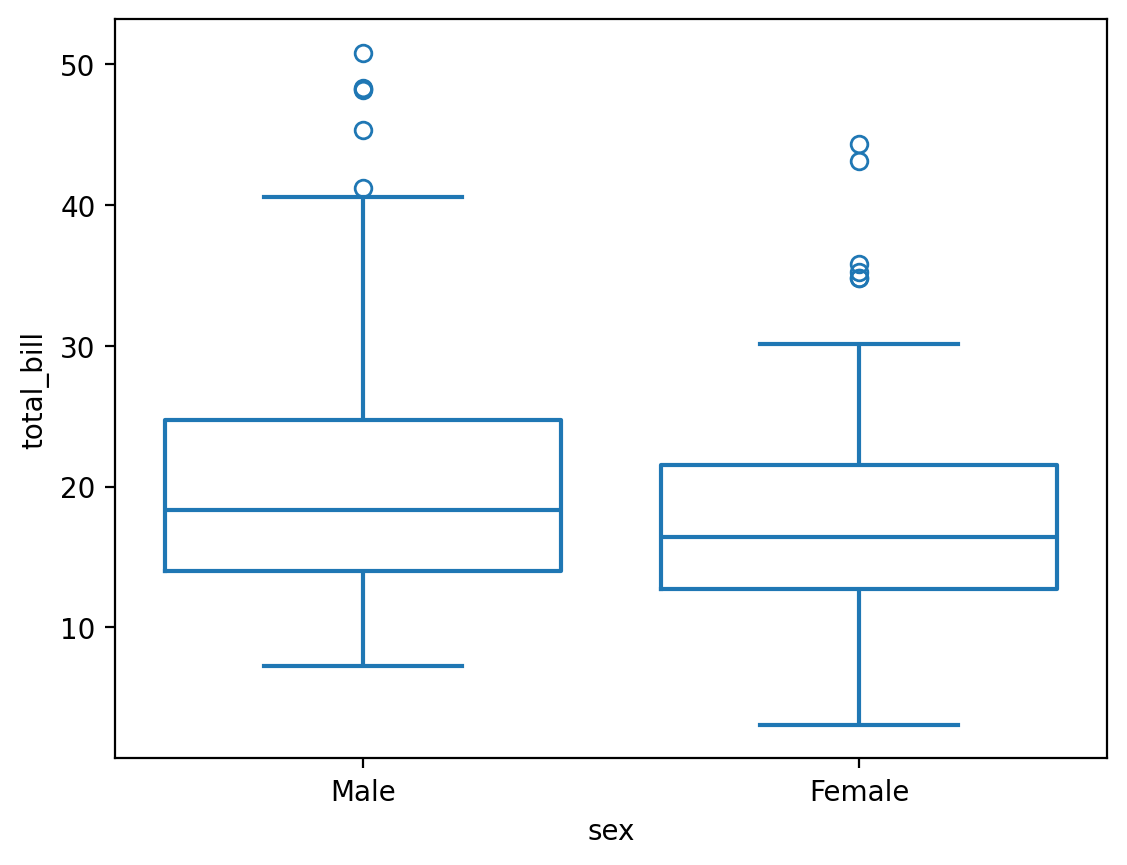

In [89]:
sns.boxplot(tips, x="sex", y="total_bill", fill=False)  # fill: box의 색을 채울지 여부
plt.show()  # 생략해도 무방

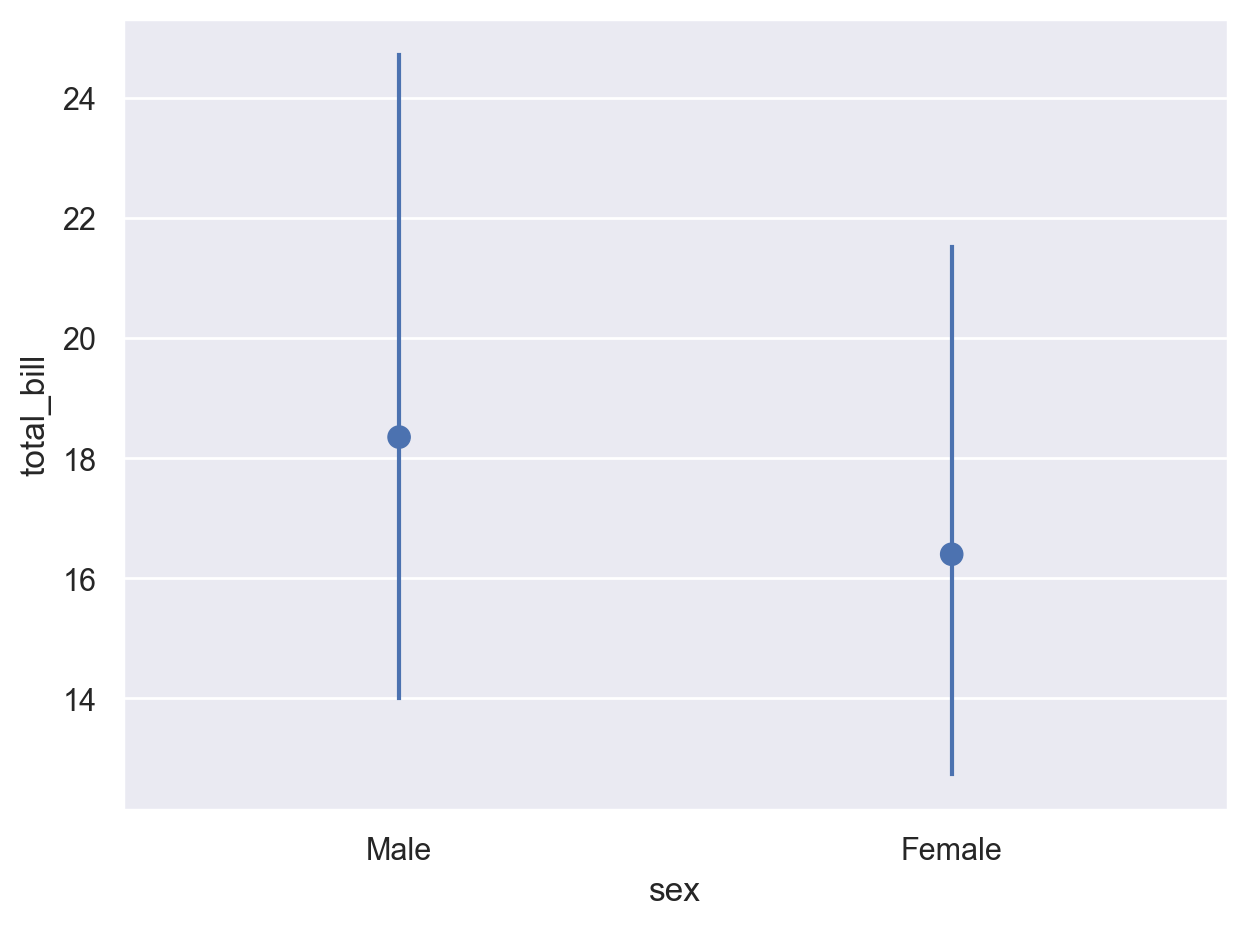

In [90]:
(
    so.Plot(tips, x="sex", y="total_bill")
    .add(so.Dot(pointsize=8), so.Agg("median"))  # .Agg(): aggregation, default는 mean
    .add(so.Range(), so.Est(errorbar=("pi", 50)))   # .Range(): 기본 min/max range, 
                                                    # .Est(): estimator
).show()

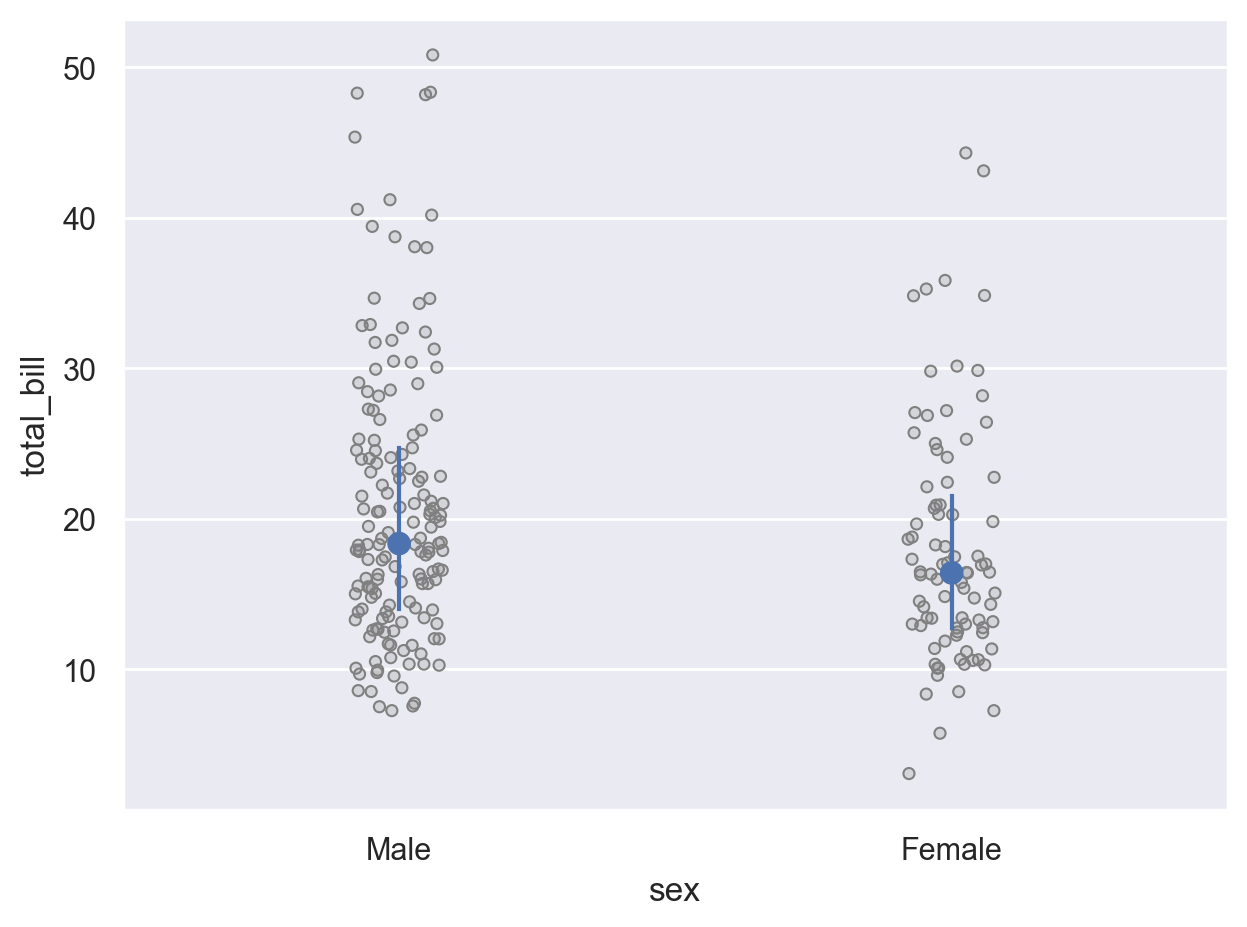

In [91]:
(
    so.Plot(tips, x="sex", y="total_bill")
    .add(so.Dots(color=".5"), so.Jitter()) # so.Jitter(): 흐트려뜨려 그리기
    .add(so.Dot(pointsize=8), so.Agg("median"))  # .Agg(): aggregation, default는 mean
    .add(so.Range(), so.Est(errorbar=("pi", 50)))   # .Range(): 기본 min/max range, 
                                                    # .Est(): estimator
).show()

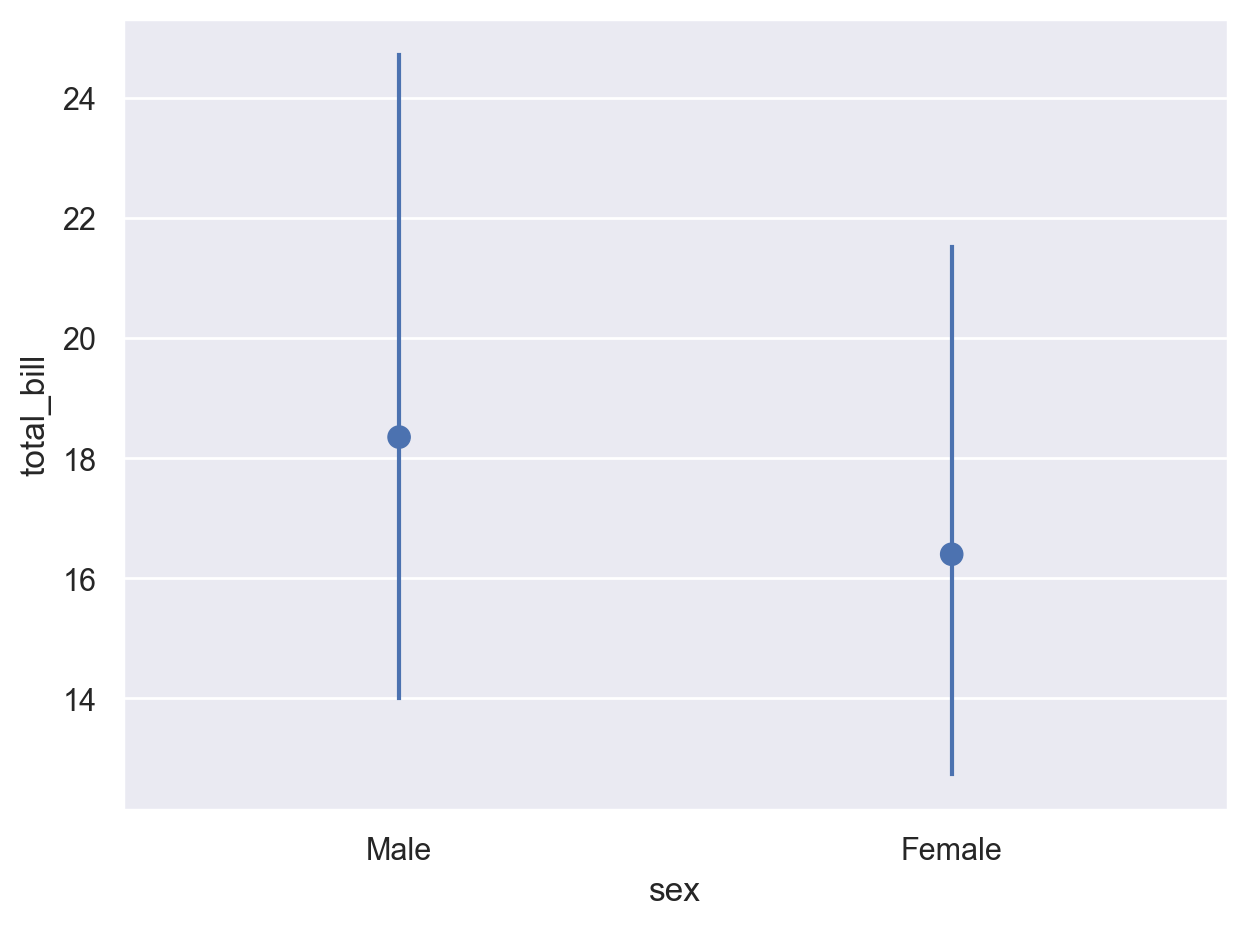

In [92]:
(
    so.Plot(tips, x="sex", y="total_bill")
    .add(so.Dot(pointsize=8), so.Agg("median"))  # .Agg(): aggregation, default는 mean
    .add(so.Range(), so.Est(errorbar=("pi", 50)))   # .Range(): 기본 min/max range, 
                                                    # .Est(): estimator
).show()

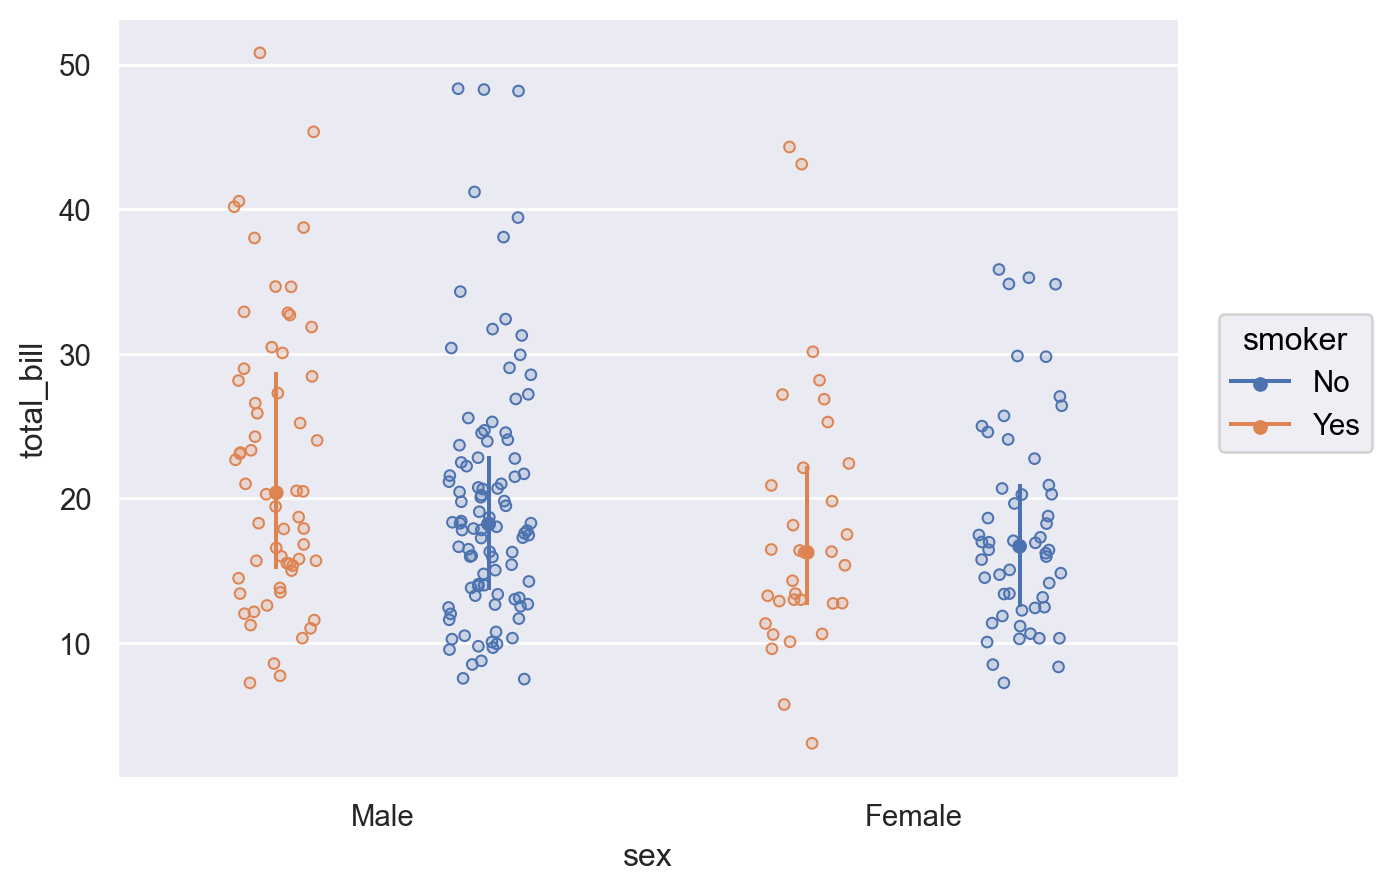

In [93]:
(
    so.Plot(tips, x="sex", y="total_bill", color = "smoker")
    .add(so.Dots(), so.Jitter(), so.Dodge())
    .add(so.Dot(pointsize=5), so.Agg("median"), so.Dodge())
    .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
)

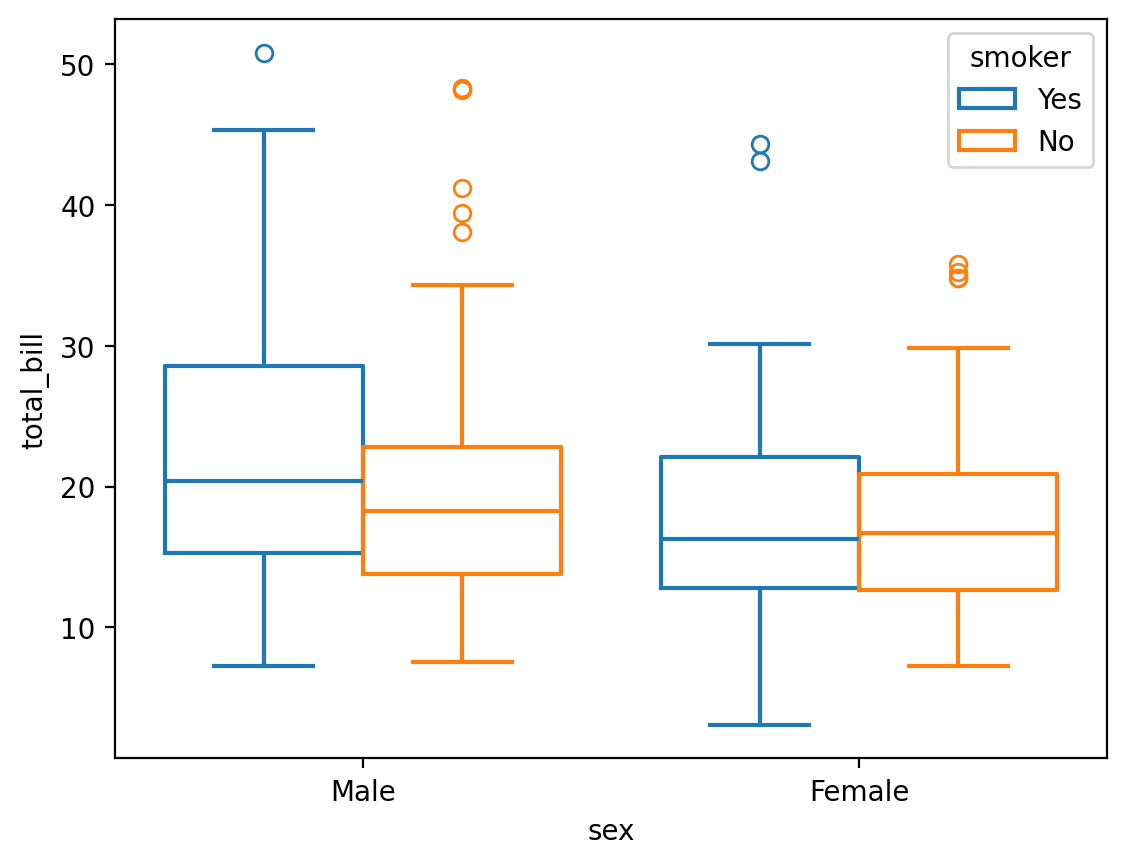

In [94]:
sns.boxplot(tips, x="sex", y="total_bill", hue="smoker", fill=False)
plt.show() # 생략해도 무방

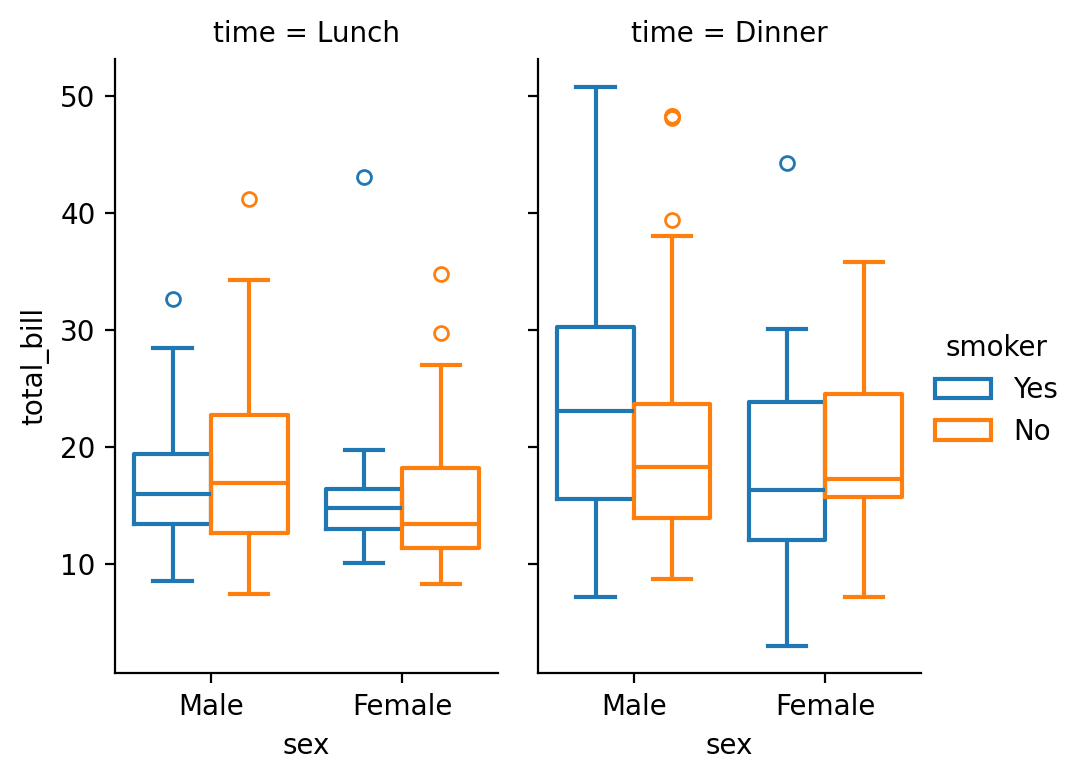

In [95]:
sns.catplot(
    data=tips, x="sex", y="total_bill", hue="smoker", col="time",
    kind="box", fill=False, height=4, aspect=.6,
)
plt.show()

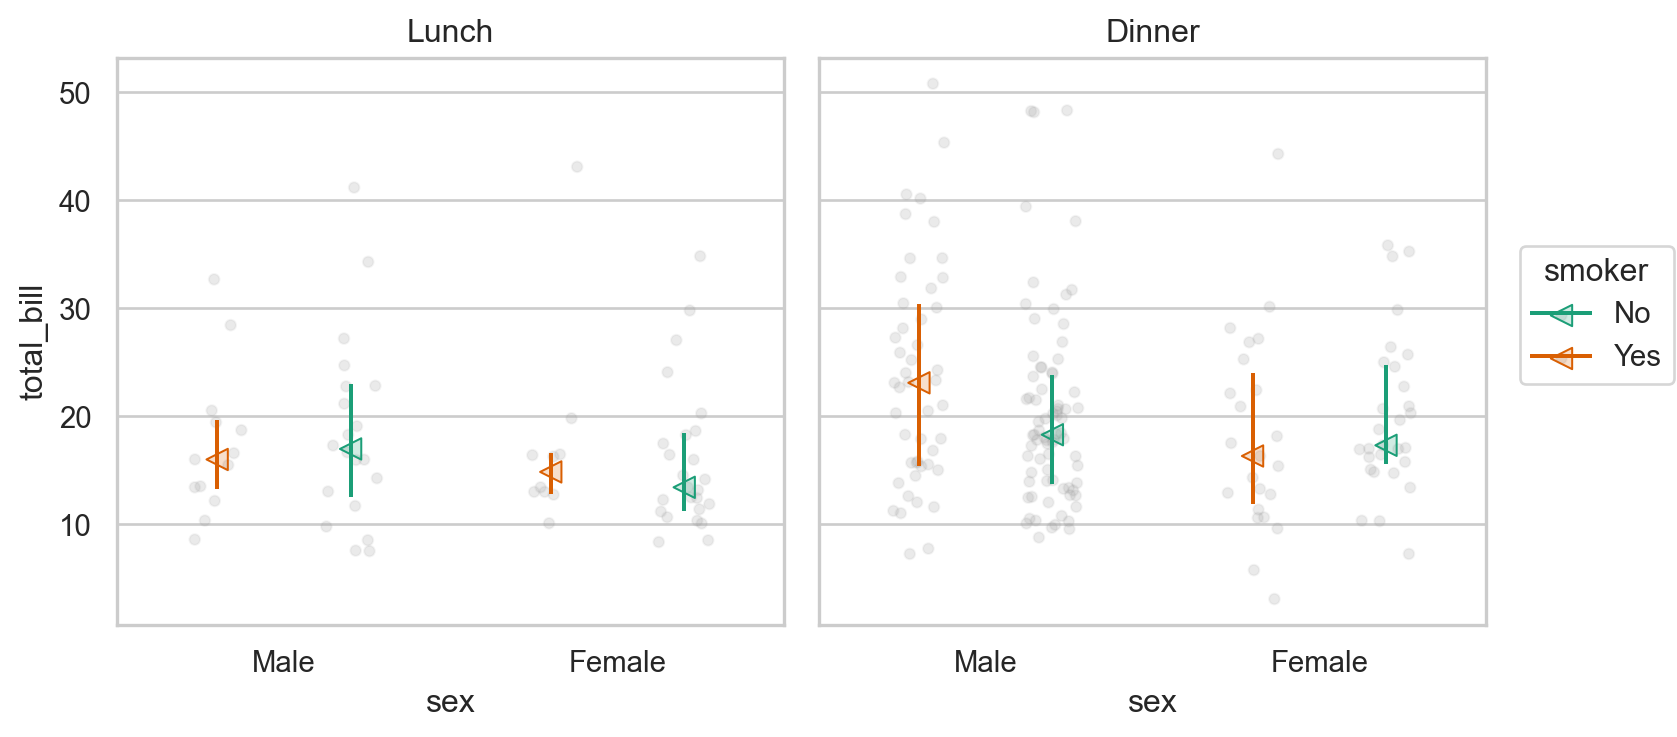

In [96]:
# Build a boxplot!
def boxplot(df, x, y, color=None, alpha=0.1):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".6"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

(
    boxplot(tips, x="sex", y="total_bill", color="smoker")
    .facet("time")
    .layout(size=(8, 4))
)

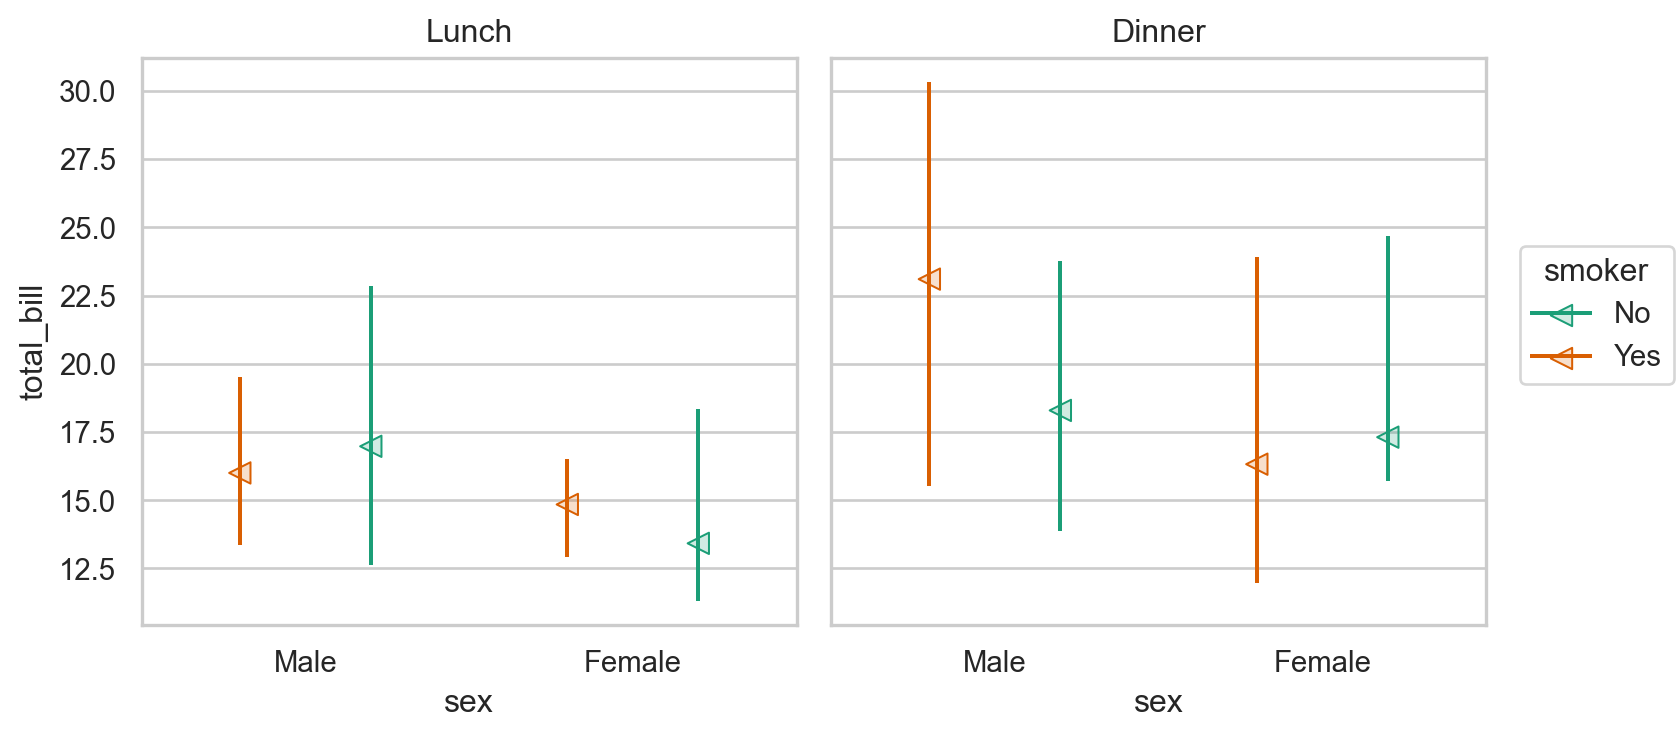

In [97]:
# Build a rangeplot!
def rangeplot(df, x, y, color=None):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

(
    rangeplot(tips, x="sex", y="total_bill", color="smoker")
    .facet("time")
    .layout(size=(8, 4))
)

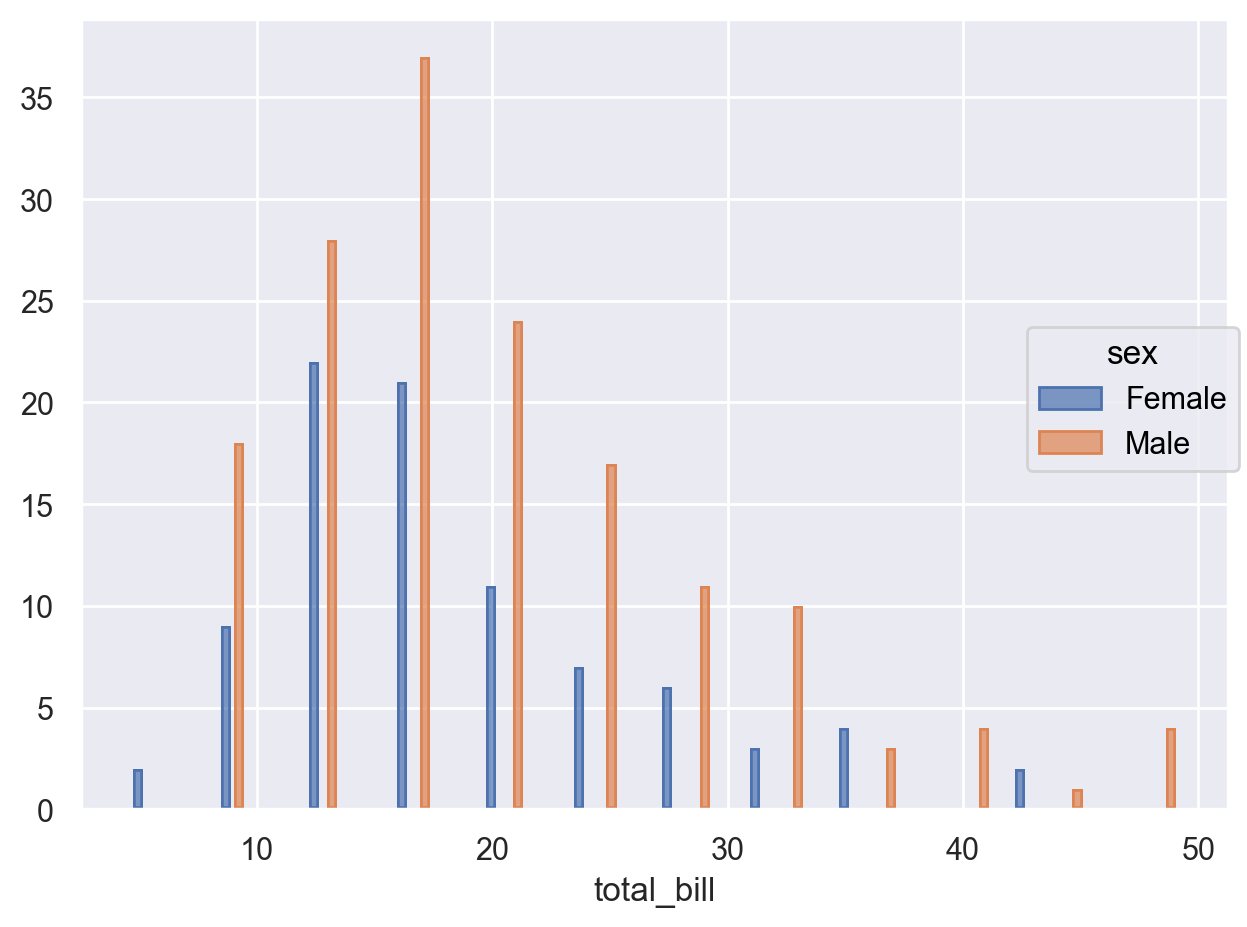

In [98]:
(
    so.Plot(tips, x="total_bill", color="sex")
    .add(so.Bar(), so.Hist(common_bins=False))  # bins을 공유하지 않도록
).show()
# Hist(): 다양한 parameter가 있음...

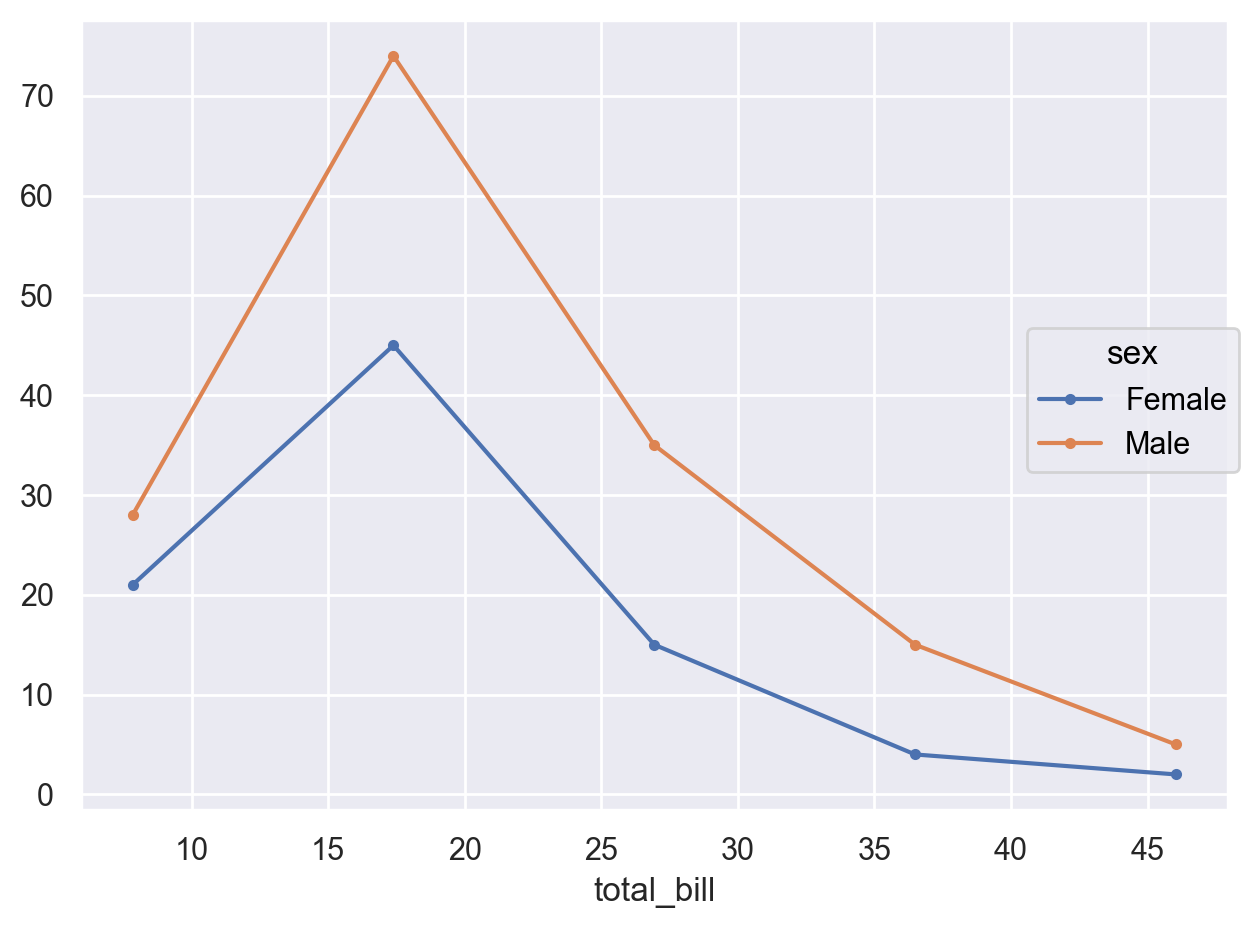

In [100]:
(
    so.Plot(tips, x="total_bill", color="sex")
    .add(so.Line(marker="."), so.Hist(binwidth=10))  # Line에 maker "."을 표시
).show()

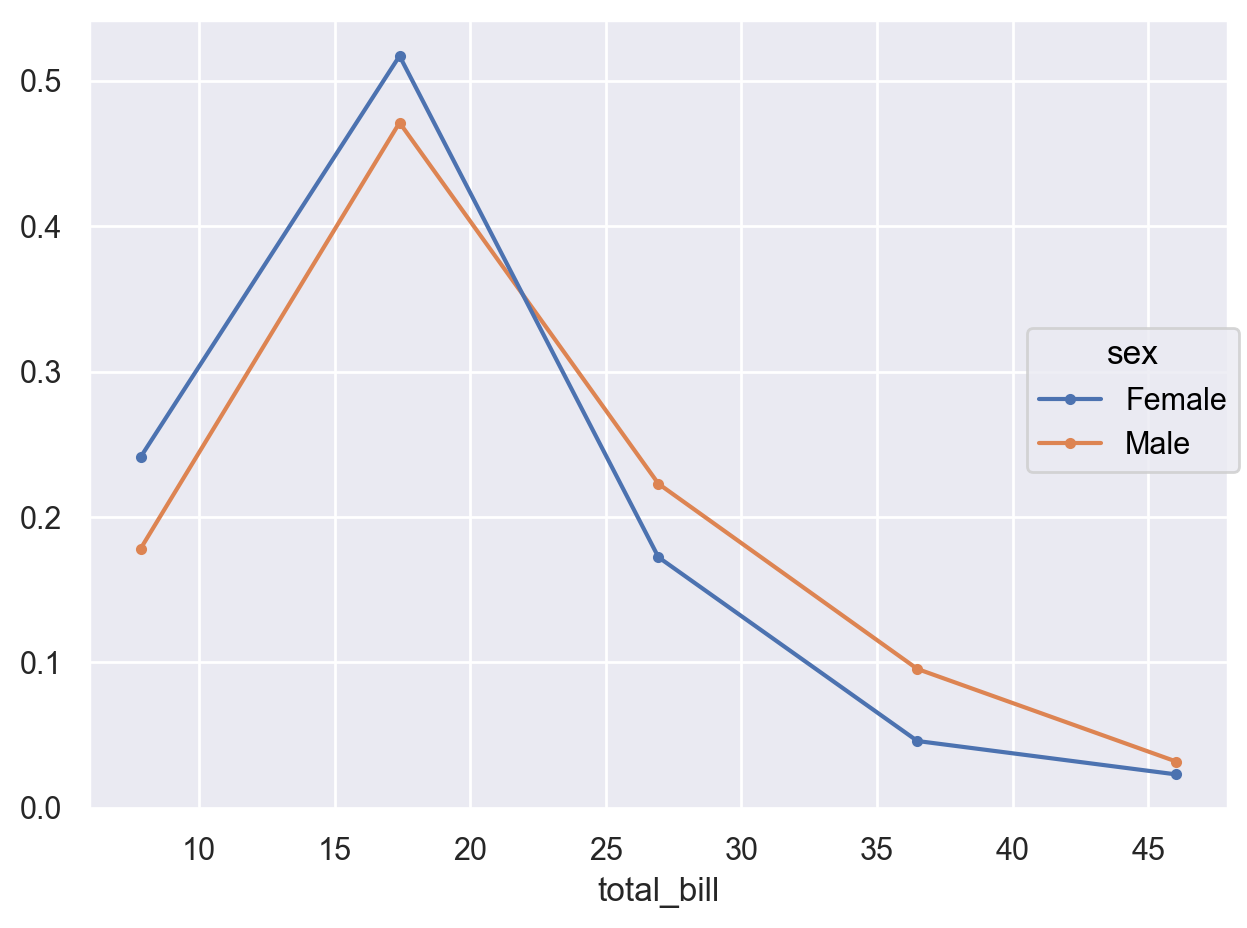

In [101]:
(
   so.Plot(tips, x="total_bill", color="sex")
    .add(so.Line(marker="."), so.Hist(binwidth=10, stat="proportion",  common_norm=False))  # Line에 maker "."을 표시
).show()

c:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\density.py:207: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(norm_vars)["weight"].sum().rename("group_weight"),


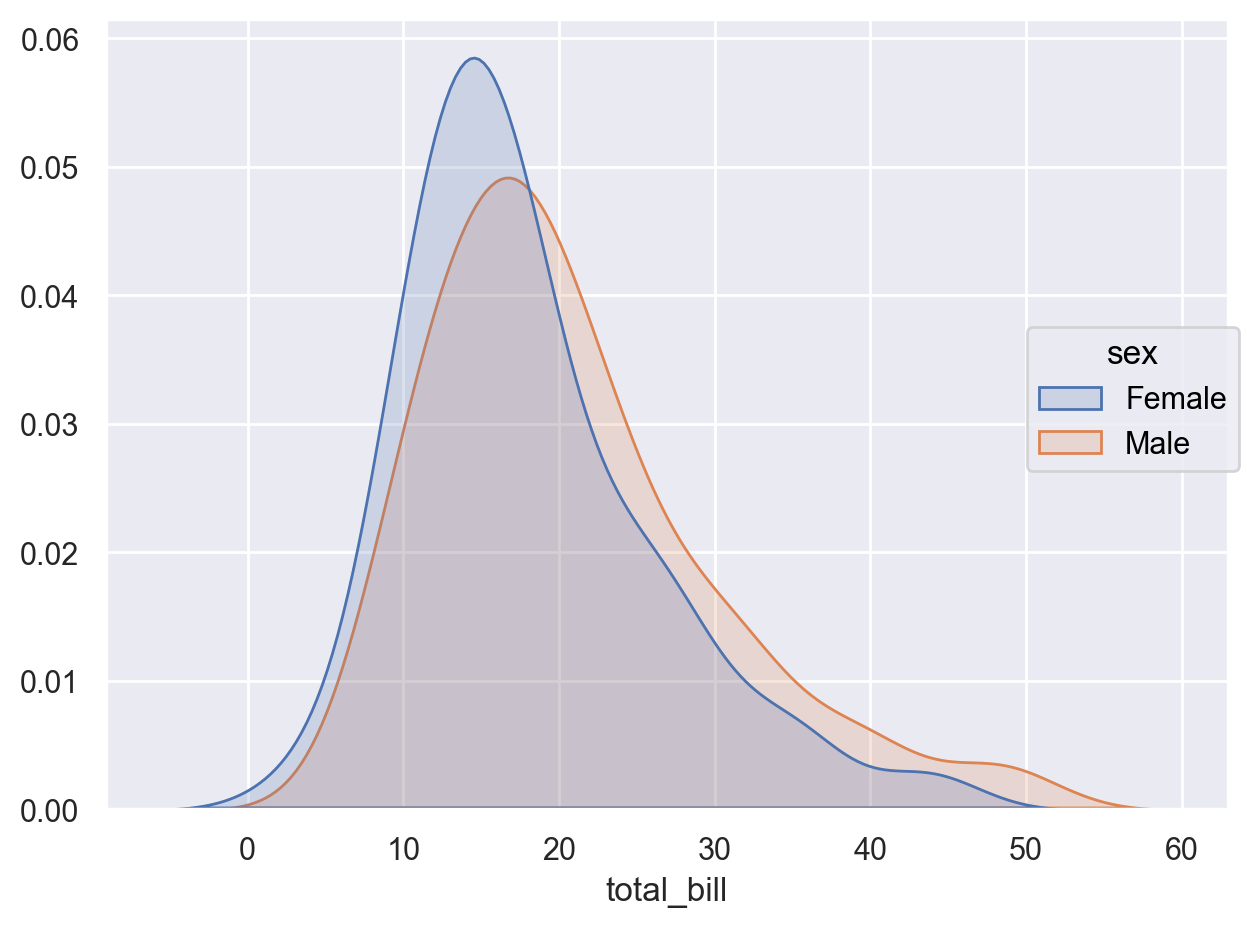

In [102]:
(
    so.Plot(tips, x="total_bill", color="sex")
    .add(so.Area(), so.KDE(common_norm=False))  # Density plot, species별로 넓이가 1이 되도록
).show()

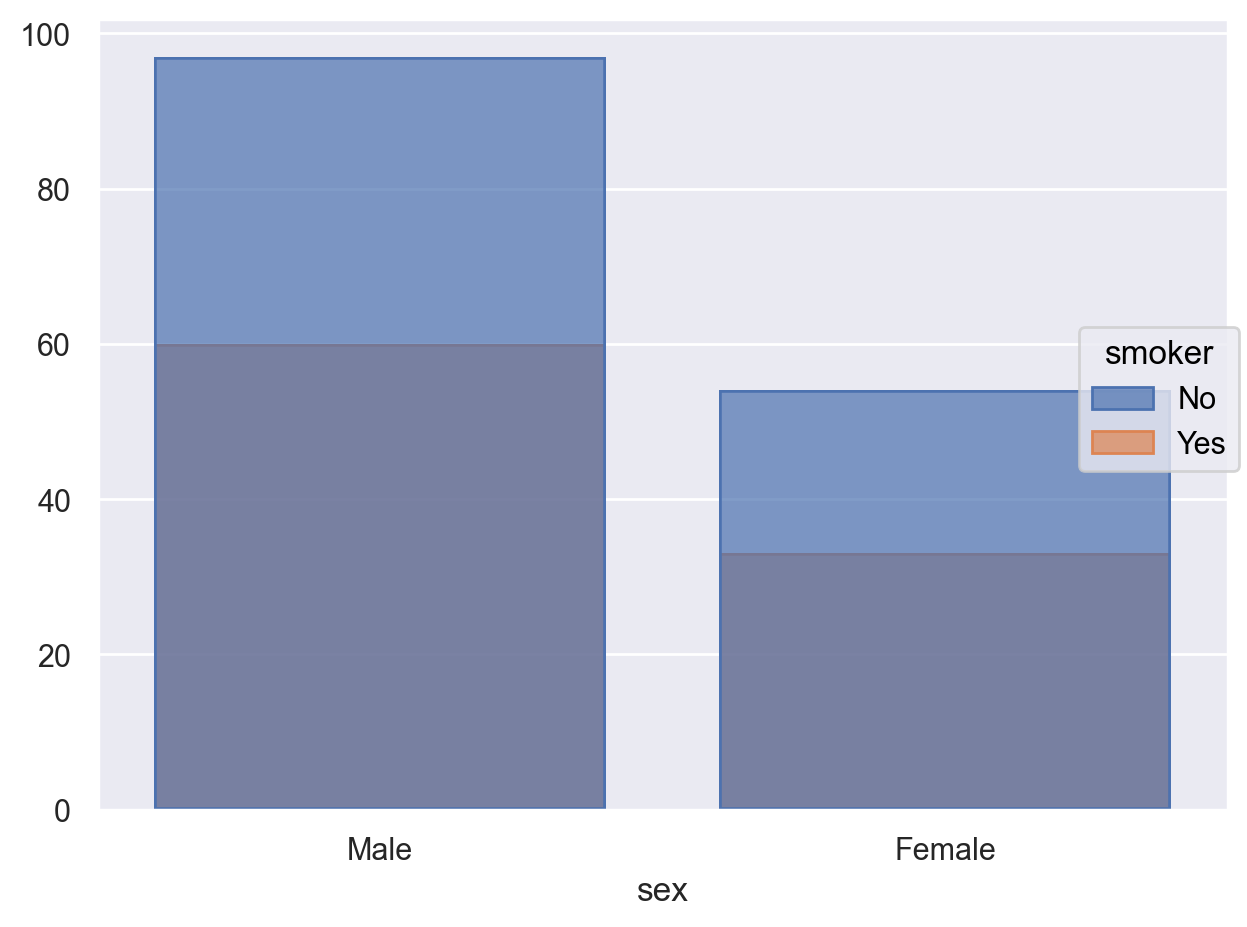

In [110]:
p = so.Plot(tips, x="sex", color="smoker")
p.add(so.Bar(), so.Count()).show()  # Bar() mark + Count() transformation

In [104]:
left = p.add(so.Bar(), so.Count(), so.Dodge())   # 나란히 표시
right = p.add(so.Bar(), so.Count(), so.Stack())  # stacking

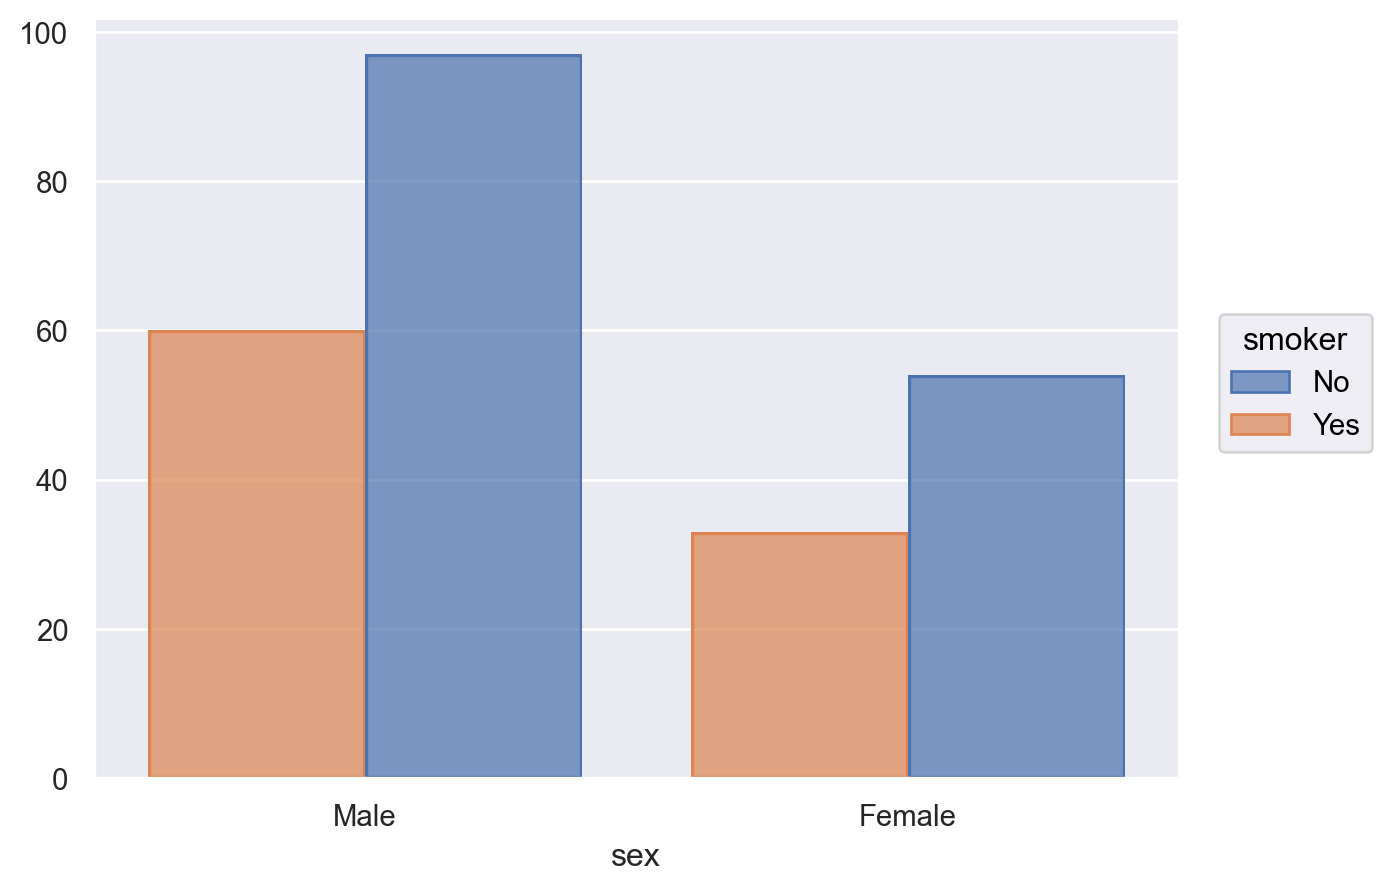

In [105]:
left

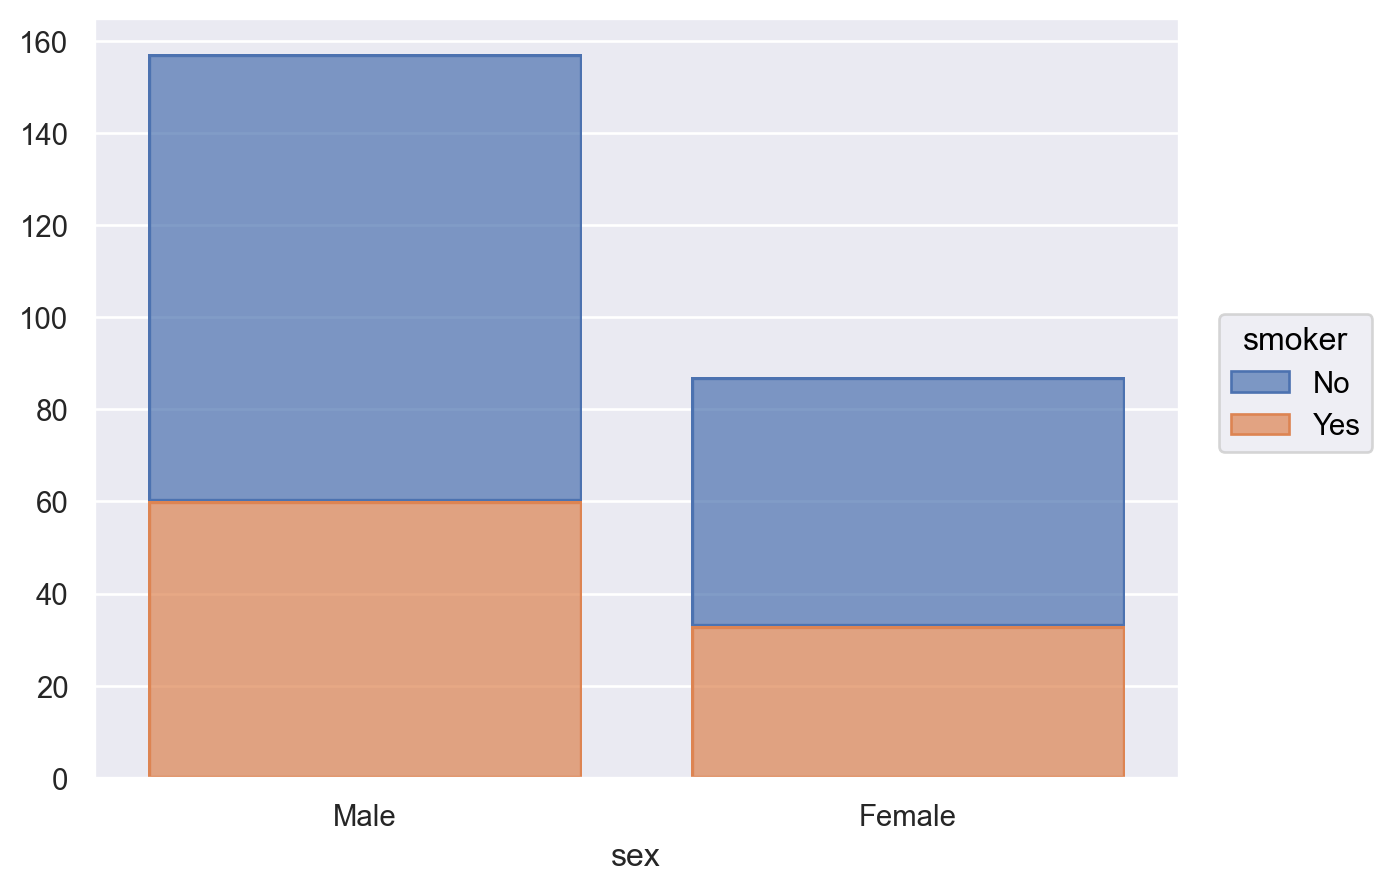

In [106]:
right

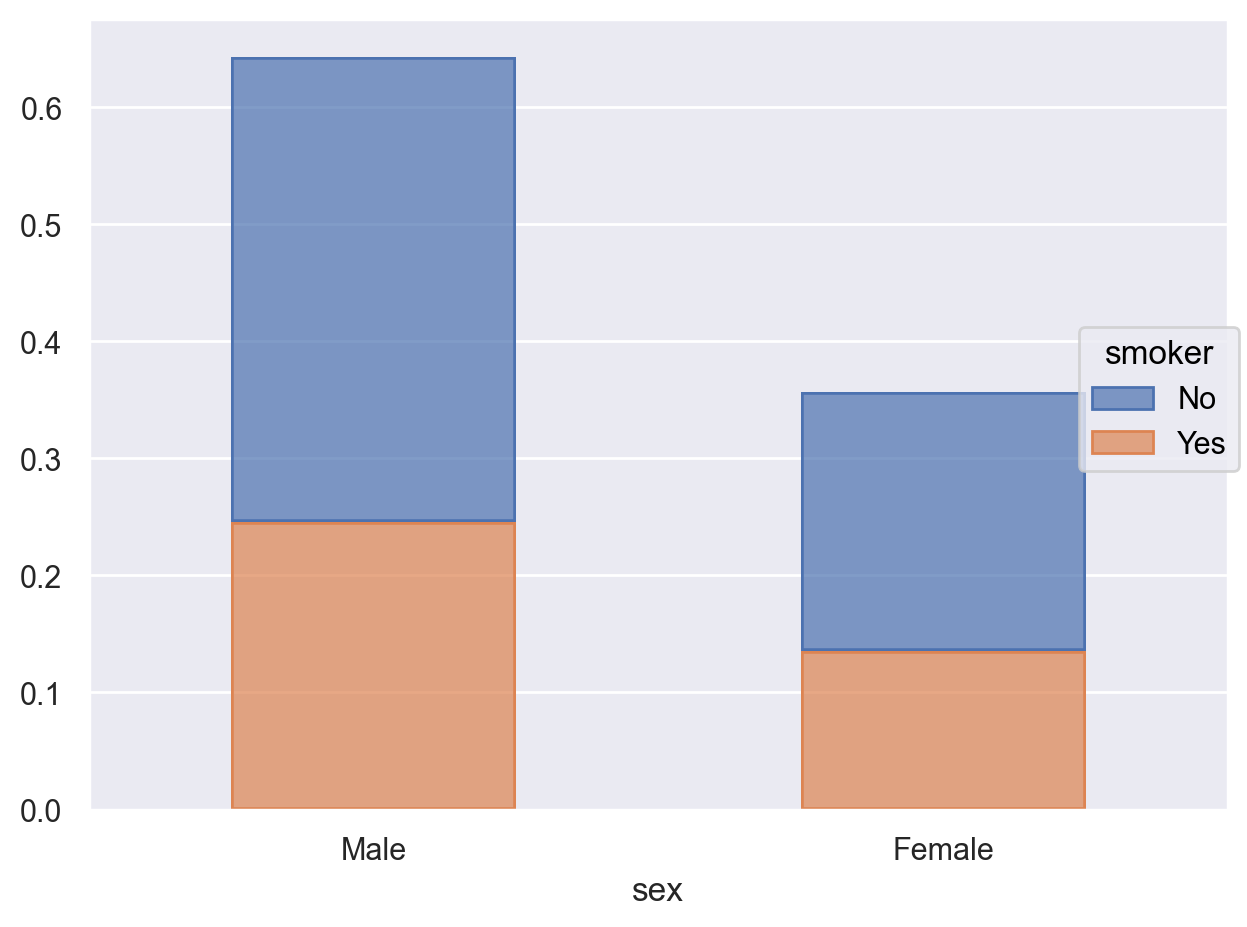

In [107]:
# 각 비율값의 합이 1이 되도록, 즉 모든 카테고리에 걸쳐 normalize
p.add(
    so.Bar(width=.5), so.Hist("proportion"),  # proportion; stat="count"로 하면 앞서 so.Count()와 동일
    so.Stack()  # stacking
).show()

c:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:228: UserWarning: Undefined variable(s) passed for Hist.common_norm: 'x'.
  self._check_grouping_vars("common_norm", grouping_vars)


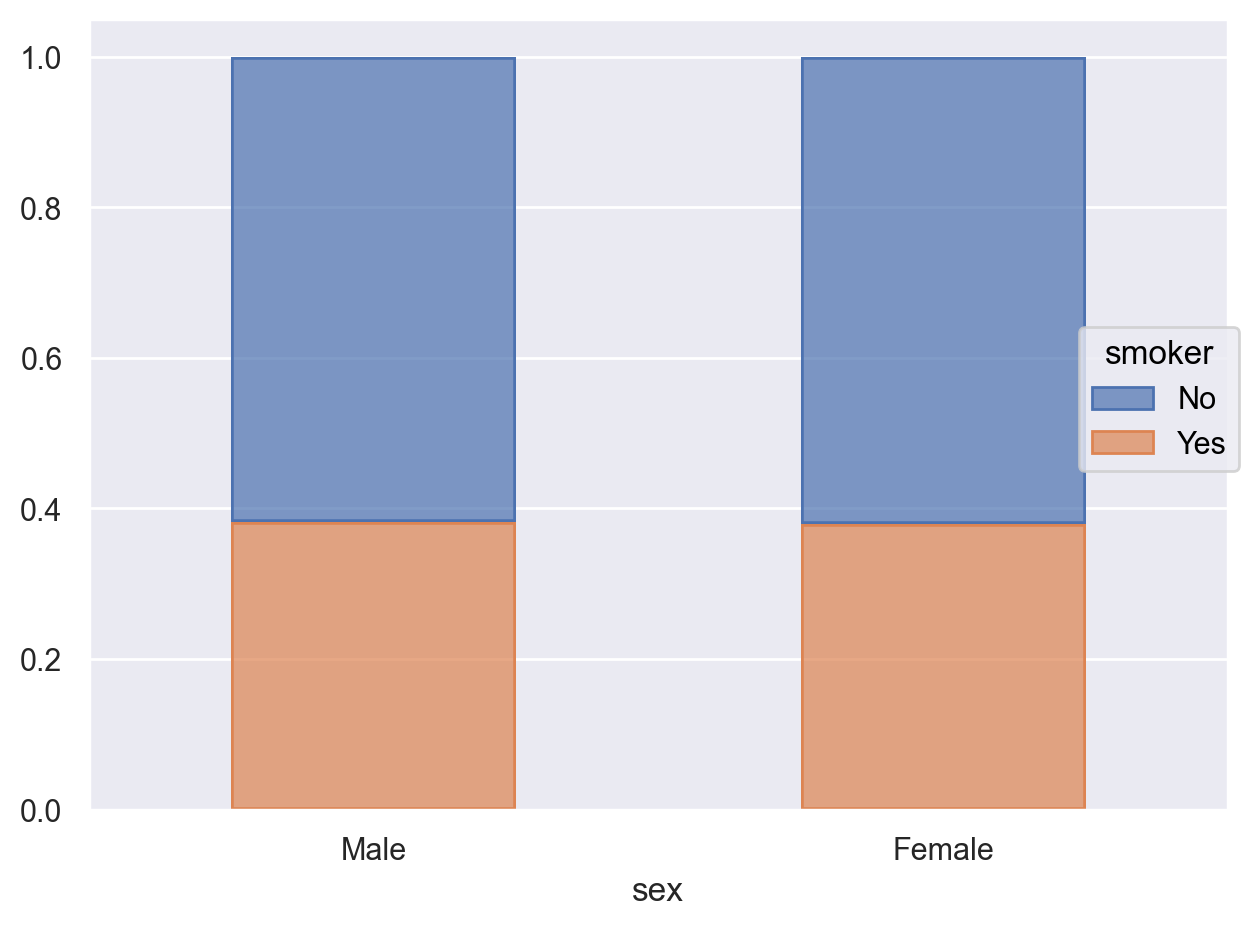

In [108]:
# x축 기준으로 normalize
p.add(
    so.Bar(width=.5), so.Hist("proportion", common_norm=["x"]),  # proportion; 
    so.Stack()  # stacking
).show()
# warning이 뜰 수 있음!

c:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:228: UserWarning: Undefined variable(s) passed for Hist.common_norm: 'x'.
  self._check_grouping_vars("common_norm", grouping_vars)


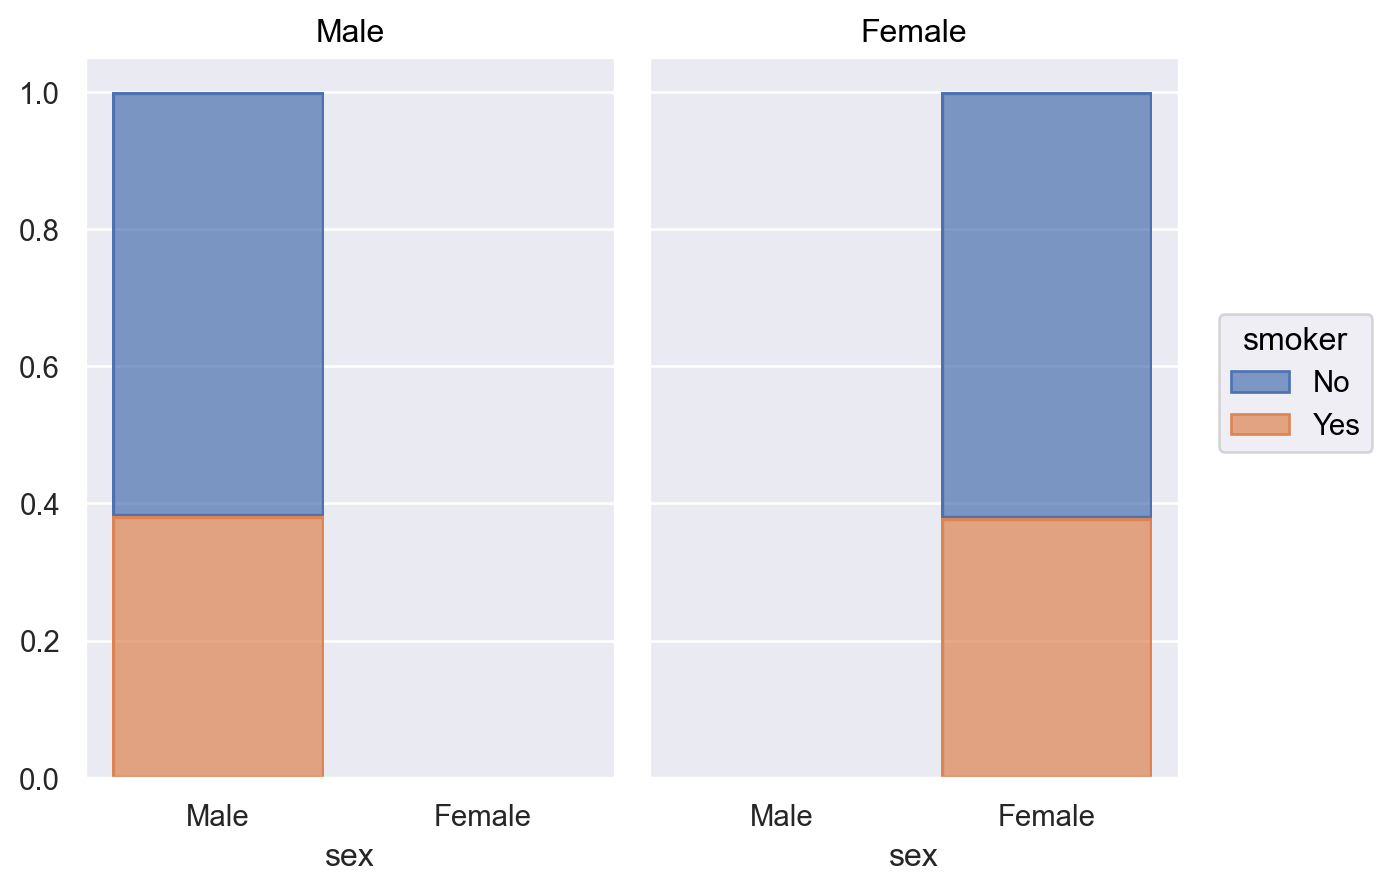

In [111]:
# x축, facet의 column 기준으로 normalize
p.add(
    so.Bar(width=.8), so.Hist("proportion", common_norm=["x", "col"]),  # proportion
    so.Stack(),  # stacking
).facet(col="sex")  # faceting

In [112]:
# 각 비율값의 합이 1이 되도록, 즉 모든 카테고리에 걸쳐 normalize
left = p.add(
    so.Bar(width=.5), so.Hist("proportion", common_norm=True),  # common_norm default: True 
    so.Stack()
)

# 각 species별로 normalize 
right = p.add(
    so.Bar(width=.5), so.Hist("proportion", common_norm=False),
    so.Stack()
)

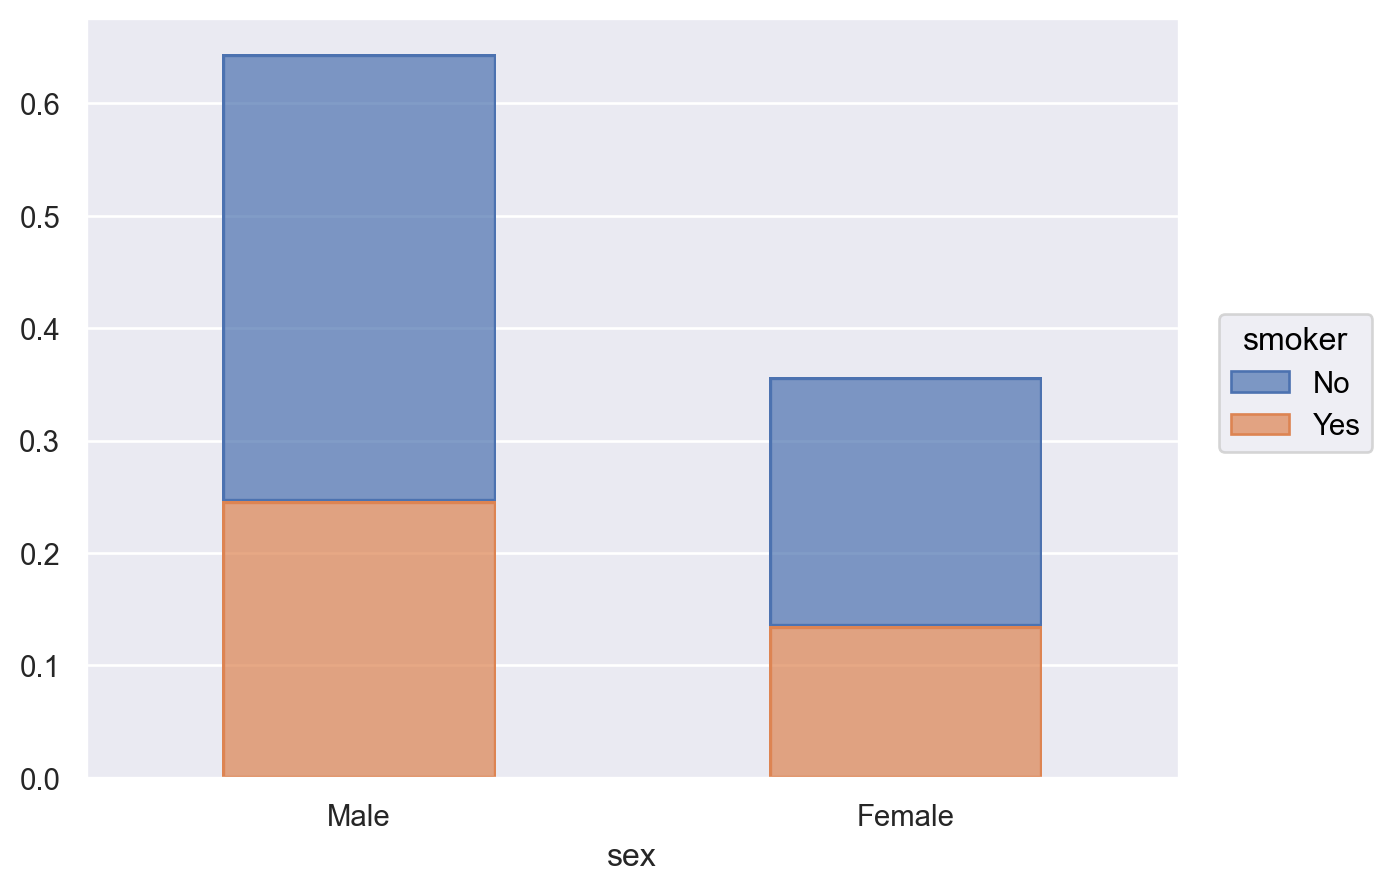

In [113]:
left

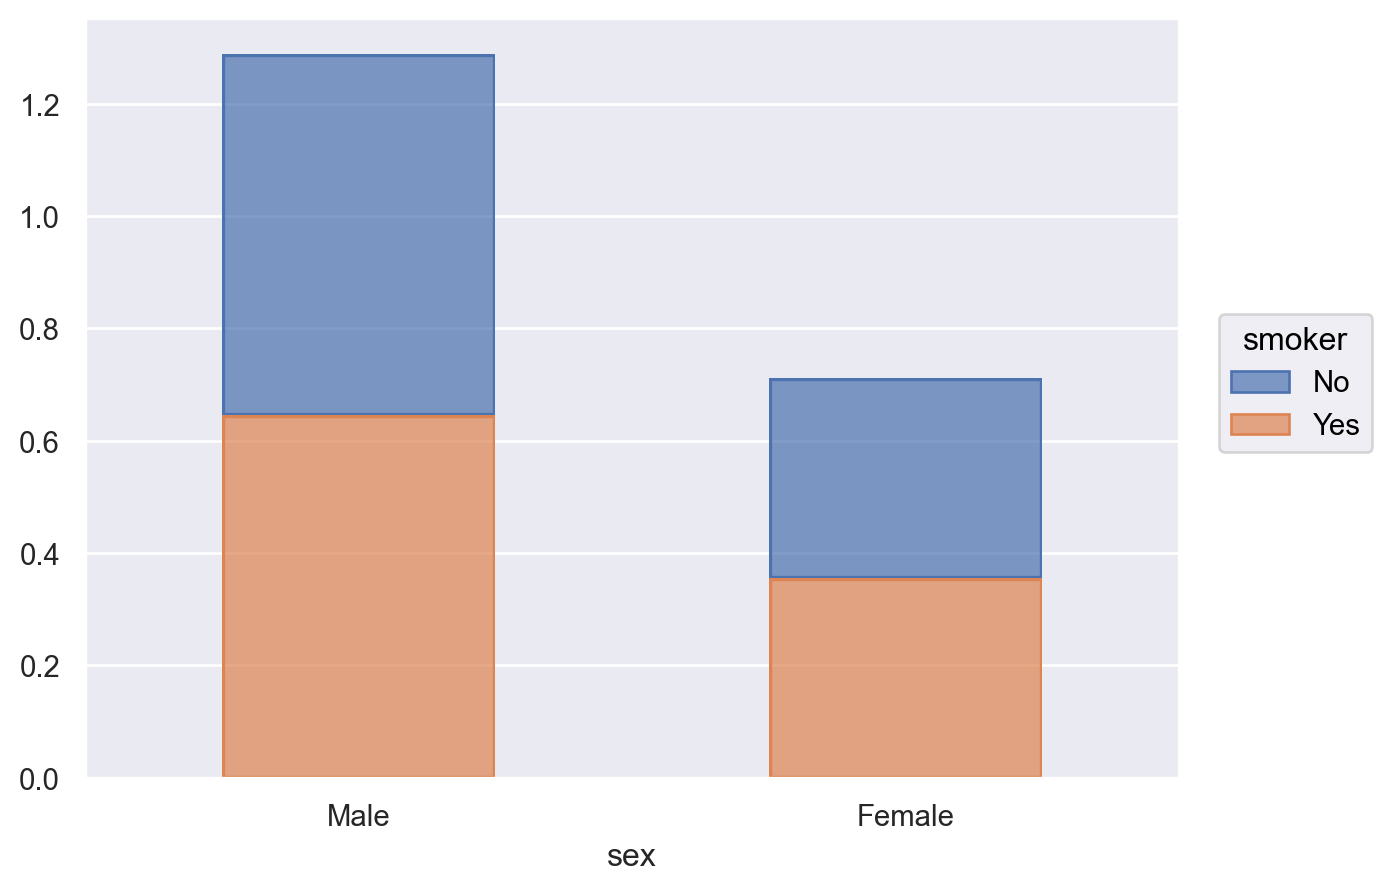

In [114]:
right

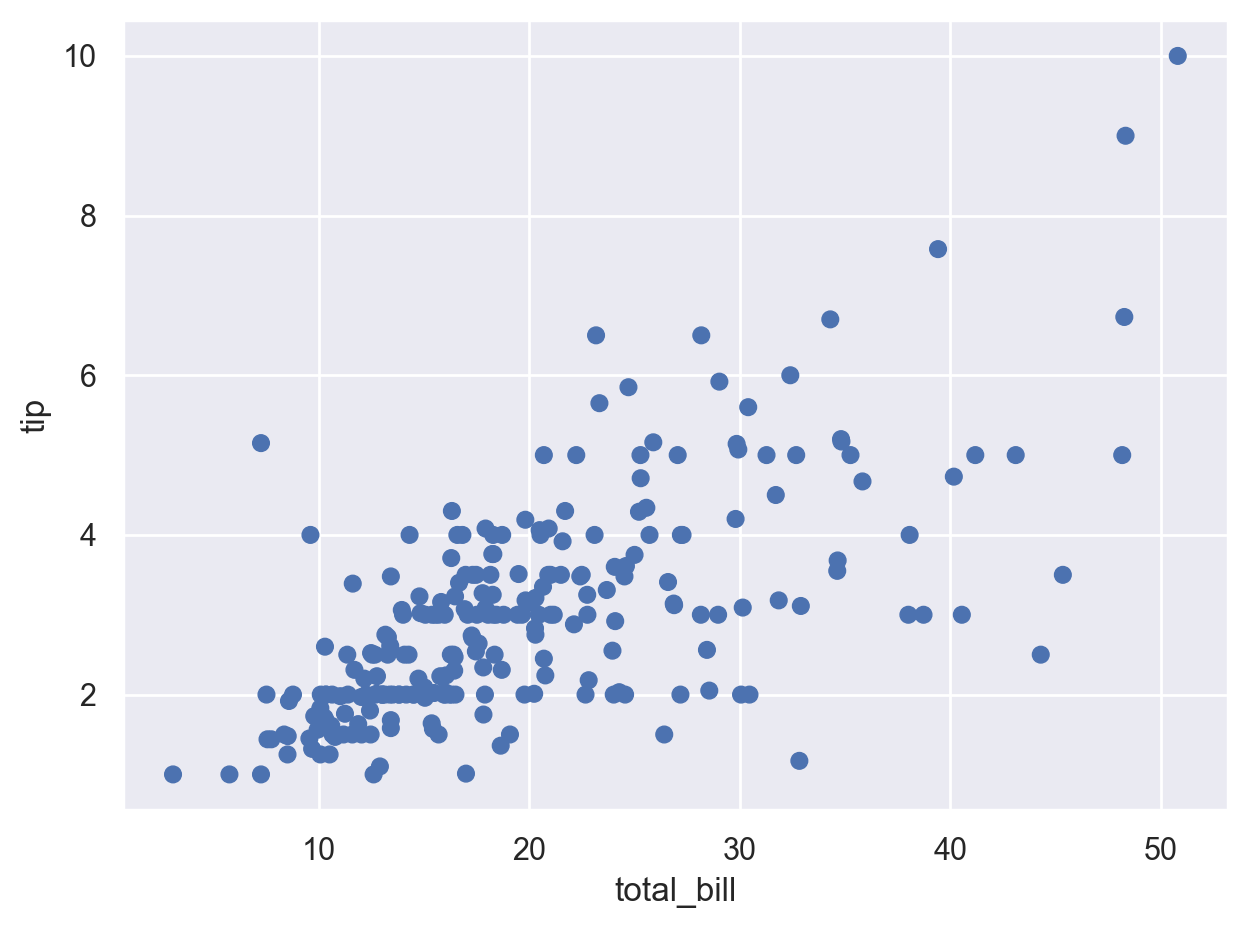

In [115]:
# Two numerical variable
# Scatterplot

(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())  # overplotting에는 so.Dots()가 유리 
).show()

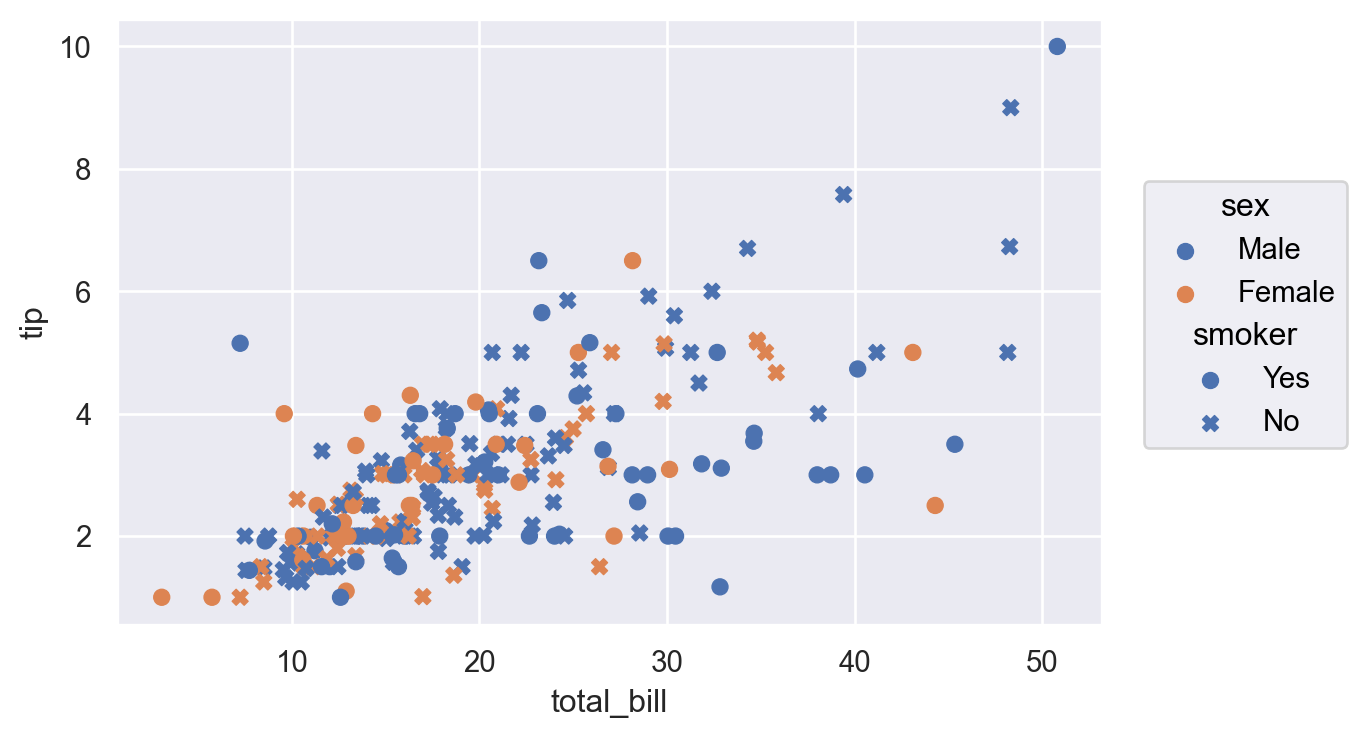

In [116]:
# Tree or more variables
(
    so.Plot(tips, x="total_bill", y="tip",
            color="sex", marker="smoker")
    .add(so.Dot())
    .layout(size=(6, 4))
)

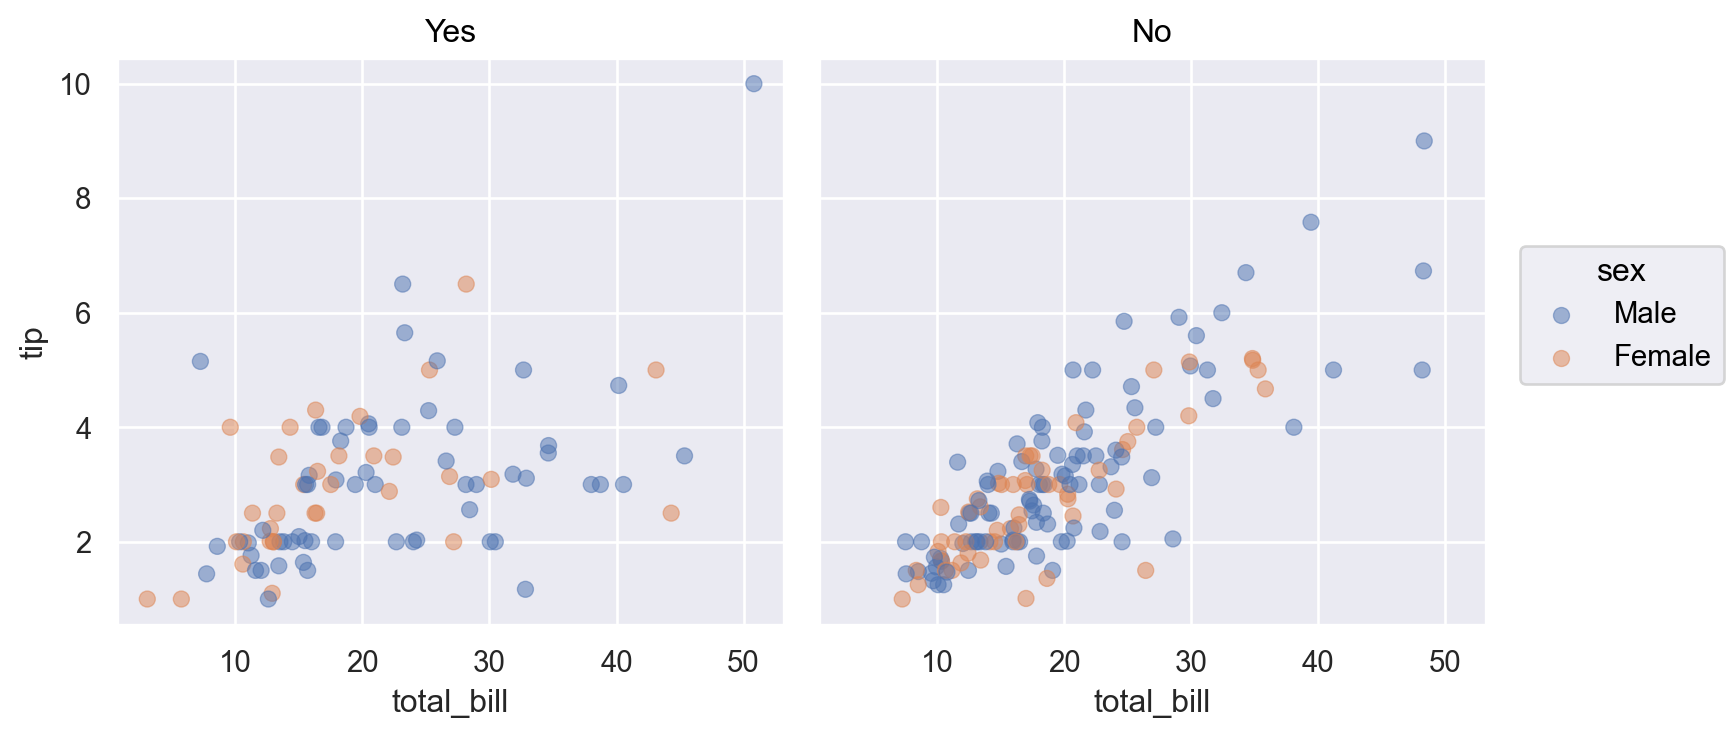

In [118]:
(
    so.Plot(tips, x="total_bill", y="tip",
            color="sex")
    .add(so.Dot(alpha=.5))
    .facet("smoker")
    .layout(size=(8, 4))
)

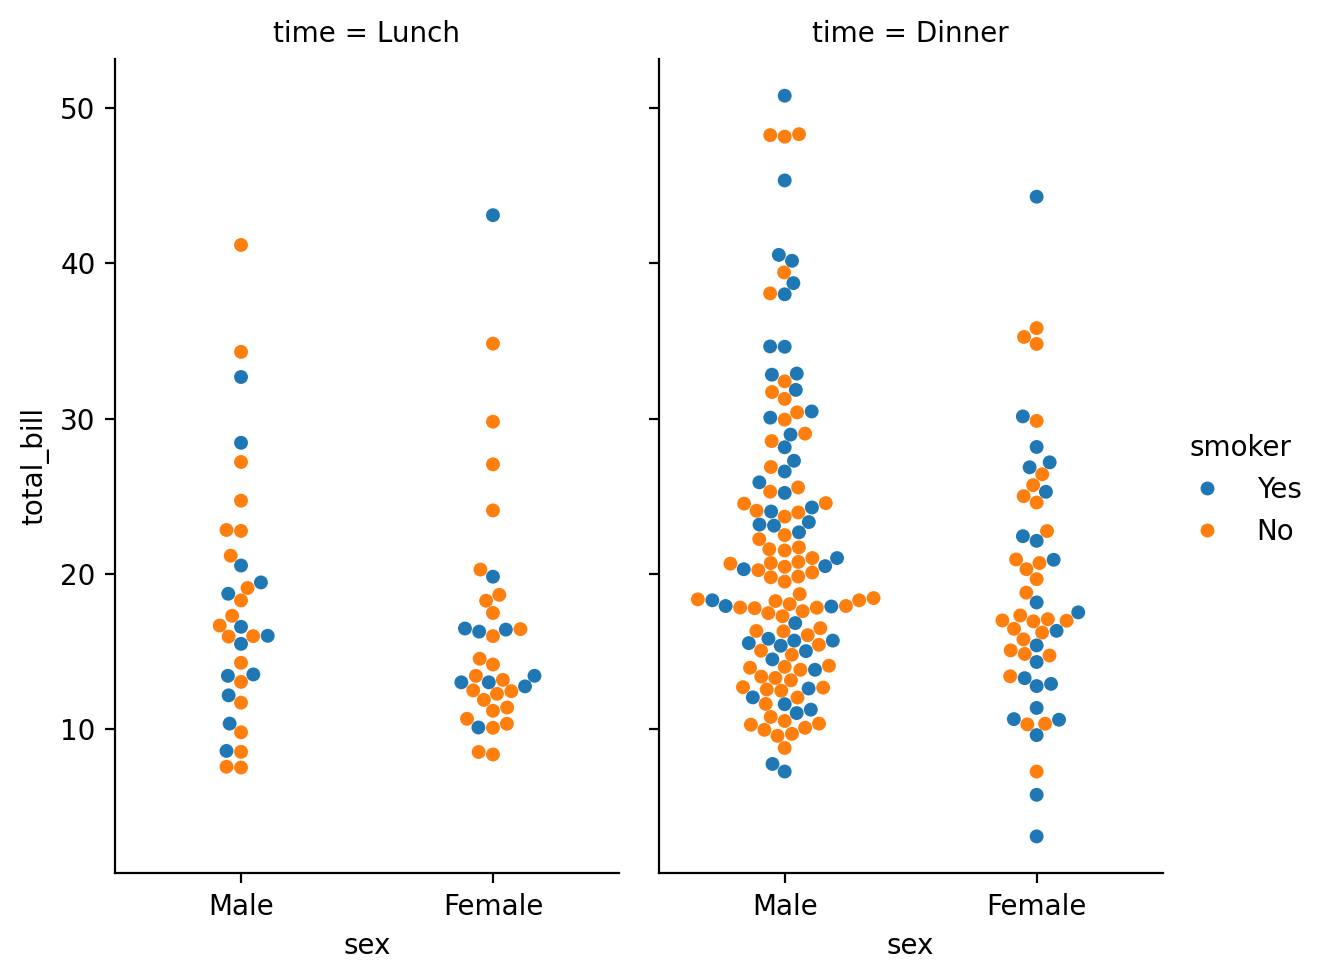

In [119]:
sns.catplot(
    data=tips, kind="swarm",
    x="sex", y="total_bill", hue="smoker", col="time",
    aspect=.6
)
plt.show()

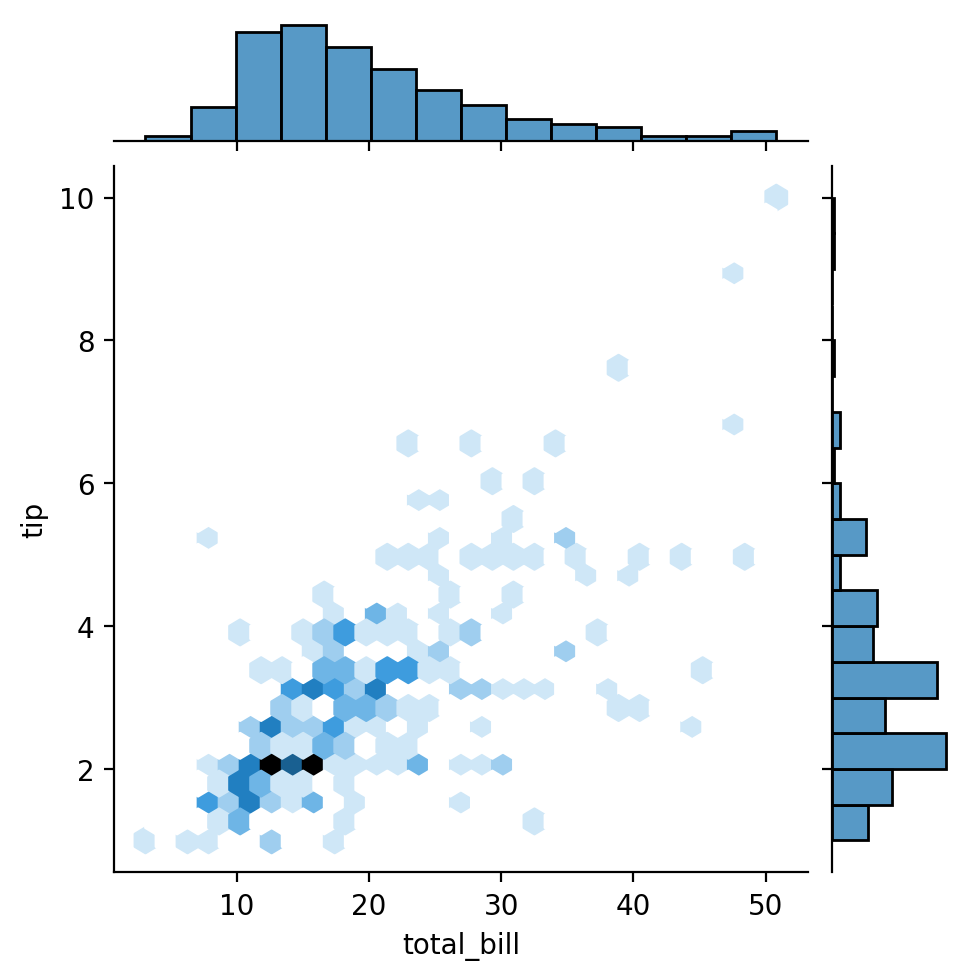

In [120]:
sns.jointplot(tips, x="total_bill", y="tip", kind="hex", gridsize=30, height=5)  # gridsize: bin 개수
plt.show()

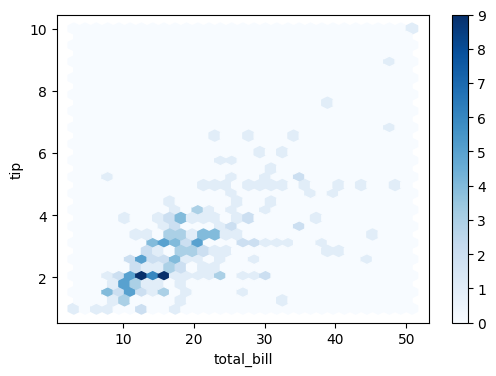

In [121]:
plt.figure(figsize=(6, 4), dpi=50)
plt.hexbin(x=tips["total_bill"], y=tips["tip"], gridsize=30, cmap="Blues")

plt.colorbar()
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()

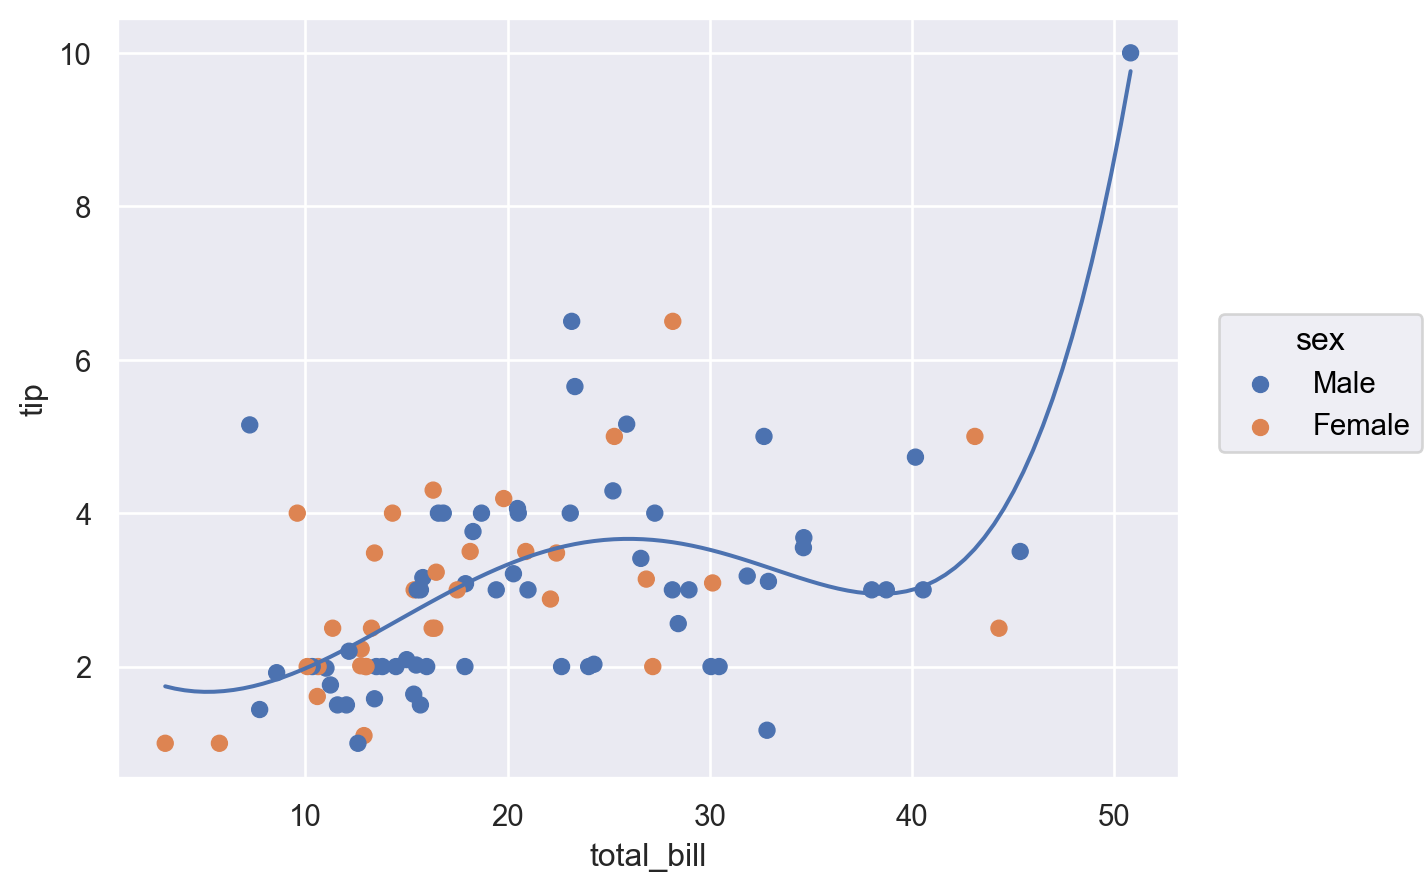

In [122]:
tips_smoker = tips.query('`smoker` == "Yes"')

(
    so.Plot(tips_smoker, x="total_bill", y="tip")
    .add(so.Dot(), color="sex")
    .add(so.Line(), so.PolyFit(5), 
         x=tips_smoker["total_bill"], y=tips_smoker["tip"])
)